In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import locale
import matplotlib.dates as mdates
import matplotlib.patches as mpatches

# Análisis de Rendimiento de Campañas Digitales
## Escuela de Natación Chapoteos - Informe de Marketing Digital

### Introducción

#### Contexto del Proyecto

Chapoteos, una escuela de natación líder en innovación educativa y formación acuática, ha implementado una estrategia de marketing digital ambiciosa para aumentar su visibilidad, captar nuevos estudiantes y fortalecer su presencia en el mercado de servicios deportivos y educativos.

#### Objetivo del Análisis

El presente informe tiene como propósito principal analizar de manera integral el rendimiento de las campañas de marketing digital ejecutadas en las plataformas de Google Ads y Meta (Facebook e Instagram) durante el período comprendido entre el 29 de enero y el 23 de febrero de 2025.

#### Alcance del Estudio

El análisis se centra en los siguientes aspectos clave:

1. **Rendimiento General de Campañas**
   - Métricas de alcance e impresiones
   - Tasa de engagement
   - Conversión
   
2. **Análisis Comparativo entre Plataformas**
   - Desempeño de Google Ads
   - Rendimiento en Meta Ads (Facebook e Instagram)
   - Identificación de canales más efectivos

#### Metodología

Para garantizar la precisión y profundidad del análisis, he utilizado:
- Herramientas de análisis nativas de Google Ads y Meta Ads
- Métricas de seguimiento avanzadas
- Análisis estadístico multivariable
- Visualización de datos con gráficos comparativos

#### Importancia Estratégica

Este informe no solo presenta datos, sino que ofrece información accionable que permitirá a Chapoteos:
- Optimizar futuras estrategias de marketing digital
- Comprender el comportamiento de su audiencia objetivo
- Maximizar el retorno de inversión publicitaria
- Tomar decisiones basadas en datos concretos

### Resumen Ejecutivo

En las siguientes secciones, desglosaremos detalladamente cada aspecto de nuestro análisis, proporcionando una visión clara y estratégica del rendimiento de las campañas digitales de Chapoteos.

---

**Nota importante:** Toda la información presentada en este documento es confidencial y ha sido procesada respetando los más altos estándares de privacidad y ética en el manejo de datos.

***

## Campañas en Google Ads

### Introducción al Análisis de Google

El presente análisis de Google Ads para la Escuela de Natación Chapoteos representa un estudio exhaustivo del rendimiento digital, abarcando múltiples dimensiones estratégicas que nos permitirán comprender el impacto real de las campañas de marketing.

#### Estructura del Análisis

El estudio se divide en cinco componentes fundamentales, cada uno proporcionando información única sobre el comportamiento digital de las campañas:

1. **Costes por Campaña**
   - Inversión total y desglose presupuestario
   - Análisis de eficiencia económica
   - Comparativa de costes entre diferentes estrategias publicitarias

2. **Awareness (Reconocimiento de Marca)**
   - Impresiones totales por campaña y set de anuncios
   - Distribución de impresiones por tipo de dispositivo
   - Impresiones diarias por campaña y set de anuncios

3. **Engagement**
   - Engagement por campaña y set de anuncios
   - Heatmap de engagement por campaña: clics e interacciones
   - Heatmap de engagement por set de anuncios: interacciones, clics y CTR

4. **Conversión**
   - Conversiones por campaña y set de anuncios
   - Heatmpap de conversión por campaña: envío de formulario, llamada de teléfono, contacto, engagement, obtener dirección
   - Heatmap de conversión por set de anuncios: conversiones

### Objetivo del Análisis

El propósito fundamental de este estudio es proporcionar una visión holística y estratégica que permita a Chapoteos:

- Comprender el rendimiento real de sus campañas en Google Ads
- Identificar oportunidades de optimización

### Consideraciones Importantes

- Todos los datos han sido extraídos directamente de las plataformas oficiales
- Se han aplicado filtros de calidad para garantizar la integridad de la información

##### 1. COSTE DE CAMPAÑAS | SET ANUNCIOS

In [130]:

# Set locale to Spanish
locale.setlocale(locale.LC_TIME, 'es_ES.UTF-8')

google_campaigns = pd.read_csv('/Users/cesarchaparro/Desktop/GitHub/Chapoteos/analytics_data/analytics/primer_proyecto/google_ads_campaigns.csv', encoding='utf-8')

# Convert 'Fecha' to datetime, handling potential errors
google_campaigns['Día'] = pd.to_datetime(google_campaigns['Día'], errors='coerce')

# --- Fix for the Impr. column ---
# Convert to string first, then handle commas, and finally convert to numeric.
if pd.api.types.is_numeric_dtype(google_campaigns['Impr.']):
    google_campaigns['Impr.'] = google_campaigns['Impr.'] / 100
elif pd.api.types.is_string_dtype(google_campaigns['Impr.']):
    google_campaigns['Impr.'] = google_campaigns['Impr.'].str.replace(',', '', regex=False).astype(float).div(100)
else:
    # Handle mixed types or other unexpected types
    google_campaigns['Impr.'] = google_campaigns['Impr.'].astype(str).str.replace(',', '', regex=False).astype(float).div(100)


google_campaigns['Conversiones'] = pd.to_numeric(google_campaigns['Conversiones'].str.replace(',', '', regex=False), errors='coerce').astype(int)
google_campaigns['Coste'] = pd.to_numeric(google_campaigns['Coste'].str.replace(',', '', regex=False), errors='coerce').astype(float) / 100

google_campaigns['Conversiones'] = google_campaigns['Conversiones'] / 100

device_mapping = {
    'Equipos informáticos': 'ordenador',
    'Teléfonos móviles': 'móbil',
    'Tablets': 'tablet',
    'Pantallas de TV': 'TV',
    'Otro': 'otro'
}

google_campaigns['Dispositivo'] = google_campaigns['Dispositivo'].replace(device_mapping)

def extract_values(resultados):
    if resultados == '0':
        return {}
    items = resultados.split(';')
    values = {}
    for item in items:
        category, value = item.split(':')
        values[category.strip()] = int(float(value.replace(',', '.').strip()))
    return values

google_campaigns['Extracted'] = google_campaigns['Resultados'].apply(extract_values)

all_categories = set()
for value_dict in google_campaigns['Extracted']:
    all_categories.update(value_dict.keys())

for category in all_categories:
    google_campaigns[category] = google_campaigns['Extracted'].apply(lambda x: x.get(category, 0))

google_campaigns.drop(columns=['Extracted', 'Resultados'], inplace=True)

google_campaigns = google_campaigns.rename(columns={
    'Día': 'Fecha', 'Impr.': 'Impresiones', 'Conversions': 'Conversiones', 'Envío de formulario para clientes potenciales': 'Envío de formulario', 'Cliente potencial por teléfono': 'Llamada de teléfono', 'Cómo llegar': 'Obtener dirección', 'Interacción': 'Engagement' })

google_campaigns['Acciones categoría de conversión'] = (
    google_campaigns['Envío de formulario'] +
    google_campaigns['Contacto'] +
    google_campaigns['Engagement'] +
    google_campaigns['Llamada de teléfono'] +
    google_campaigns['Obtener dirección']
)

google_campaigns['Acciones categoría de conversión'] = google_campaigns['Acciones categoría de conversión'].astype(int)

google_campaigns['CTR'] = ((google_campaigns['Clics'] / google_campaigns['Impresiones']) / 100).round(2)

google_campaigns.to_csv('/Users/cesarchaparro/Desktop/GitHub/Chapoteos/analytics_data/analytics/primer_proyecto/google_campaigns.csv', index=False)

google_campaigns.head()

Fecha                        Campaña Dispositivo  Conversiones  \
0 2025-01-29             Búsqueda | General   ordenador           1.0   
1 2025-01-29             Búsqueda | General       móbil           4.0   
2 2025-01-29             Búsqueda | General      tablet           0.0   
3 2025-01-29  Pmax | Promoción Bonos - MOFU   ordenador           0.0   
4 2025-01-29  Pmax | Promoción Bonos - MOFU       móbil           0.0   

   Impresiones  Coste  Interacciones  Clics  Envío de formulario  \
0      8.29000   2.45              4      4                    1   
1      0.01476  40.47             66     66                    4   
2      0.80000   0.00              0      0                    0   
3      0.07000   0.01              1      1                    0   
4      0.35000   3.29             13     13                    0   

   Llamada de teléfono  Contacto  Engagement  Obtener dirección  \
0                    0         0           0                  0   
1                    0         5           3                  3   
2                    0         0           0                  0   
3                    0         0           0                  0   
4                    0         0           7                  2   

   Acciones categoría de conversión    CTR  
0                                 1   0.00  
1                                15  44.72  
2                                 0   0.00  
3                                 0   0.14  
4                                 9   0.37

In [131]:
# Group by Date and show campaigns and costs
grouped_google_campaigns_cost = google_campaigns.groupby(['Fecha', 'Campaña'])[['Coste']].sum().reset_index()

# Sort by date
grouped_google_campaigns_cost = grouped_google_campaigns_cost.sort_values('Fecha')

# Display the results
#grouped_google_campaigns_cost.head()

##### 1.1 COSTE TOTAL EN CAMPAÑAS DE GOOGLE

In [132]:
# Group by the 'Campaign' column and sum the 'Coste' column
total_costs_per_campaign_google = google_campaigns.groupby('Campaña')['Coste'].sum().reset_index()

# Rename the columns for clarity
total_costs_per_campaign_google.columns = ['Campaña', 'Coste total']

# Calculate the total cost
google_campaigns_total_cost = google_campaigns['Coste'].sum()

# Display the result
print(total_costs_per_campaign_google)
# Print the total cost with two decimal places
print(f'Coste total para todas las campañas de Google: {google_campaigns_total_cost:.2f}')

                         Campaña  Coste total
0             Búsqueda | General      1098.29
1  Pmax | Promoción Bonos - MOFU        75.22
2   Pmax | Promoción Bonos - RMK       168.05
3  Pmax | Promoción Nuevo Centro       144.81
Coste total para todas las campañas de Google: 1486.37


In [133]:
# Set locale to Spanish
locale.setlocale(locale.LC_TIME, 'es_ES.UTF-8')

# Load CSV
google_ad_sets = pd.read_csv(
    '/Users/cesarchaparro/Desktop/GitHub/Chapoteos/analytics_data/analytics/primer_proyecto/google_ad_sets.csv',
    encoding='utf-8'
)

# Rename columns
google_ad_sets = google_ad_sets.rename(columns={
    'Día': 'Fecha',
    'Impr.': 'Impresiones',
    'Grupo de anuncios': 'Set anuncios'
})

# Convert 'Fecha' to datetime
google_ad_sets['Fecha'] = pd.to_datetime(google_ad_sets['Fecha'])

# Convert 'Impresiones' to integer (if there are any missing/invalid, errors='coerce' will set them to NaN)
google_ad_sets['Impresiones'] = pd.to_numeric(google_ad_sets['Impresiones'], errors='coerce').fillna(0).astype(int)

# For 'Conversiones', first convert to string then remove commas, handle possible missing values safely
google_ad_sets['Conversiones'] = google_ad_sets['Conversiones'].astype(str).str.replace(',', '').replace('nan', '0')
google_ad_sets['Conversiones'] = pd.to_numeric(google_ad_sets['Conversiones'], errors='coerce').fillna(0)

# According to your original code, you want to divide conversions by 100 (maybe these are cents or percentage format)
google_ad_sets['Conversiones'] = google_ad_sets['Conversiones'] / 100

# Clean 'Coste' column: convert to string, remove commas, convert to float, then divide by 100
google_ad_sets['Coste'] = google_ad_sets['Coste'].astype(str).str.replace(',', '')
google_ad_sets['Coste'] = pd.to_numeric(google_ad_sets['Coste'], errors='coerce').fillna(0) / 100

# Device mapping dictionary
device_mapping = {
    'Equipos informáticos': 'ordenador',
    'Teléfonos móviles': 'móbil',
    'Tablets': 'tablet',
    'Pantallas de TV': 'TV',
    'Otro': 'otro'
}
google_ad_sets['Dispositivo'] = google_ad_sets['Dispositivo'].replace(device_mapping)

# Ad group mapping dictionary
ad_group_mapping = {
    'Clases de Natación': 'Clases natación',
    'Natació- Infantil': 'Natación infantil',
    'Natación Adultos': 'Natación adultos',
    'Natación para Embarazadas': 'Natación embarazadas'
}
google_ad_sets['Set anuncios'] = google_ad_sets['Set anuncios'].replace(ad_group_mapping)

# Drop 'Campaña' column if it exists
if 'Campaña' in google_ad_sets.columns:
    google_ad_sets = google_ad_sets.drop(columns=['Campaña'])

# Filter out columns with titles or descriptions using regex (keep only columns that do not contain these keywords)
google_ad_sets = google_ad_sets.filter(regex='^(?!(Título|Descripción|Ruta|Posición|URL|Tipo)).*$', axis=1)

# Calculate CTR, safely handling zeros to avoid division by zero
google_ad_sets['CTR'] = (google_ad_sets['Clics'] / google_ad_sets['Impresiones']).fillna(0).replace([float('inf'), -float('inf')], 0).round(2)

# Save cleaned dataframe to CSV
google_ad_sets.to_csv(
    '/Users/cesarchaparro/Desktop/GitHub/Chapoteos/analytics_data/analytics/primer_proyecto/google_ad_sets.csv',
    index=False
)

# Show head for verification
google_ad_sets.head()

Fecha Dispositivo          Set anuncios  Conversiones  Impresiones  \
0 2025-01-29   ordenador       Clases natación  0.000000e+00           59   
1 2025-01-29   ordenador         Matronatación  1.000000e-10           69   
2 2025-01-29   ordenador     Natación infantil  0.000000e+00          689   
3 2025-01-29   ordenador      Natación adultos  0.000000e+00            2   
4 2025-01-29   ordenador  Natación embarazadas  0.000000e+00           10   

          Coste  Interacciones  Clics   CTR  
0  1.470000e-10              2      2  0.03  
1  7.100000e-11              1      1  0.01  
2  2.700000e-11              1      1  0.00  
3  0.000000e+00              0      0  0.00  
4  0.000000e+00              0      0  0.00

In [134]:
# Group by Date and show ad sets and costs
grouped_google_ad_sets_cost = google_ad_sets.groupby(['Fecha', 'Set anuncios'])[['Coste']].sum().reset_index()

# Sort by date
grouped_google_ad_sets_cost = grouped_google_ad_sets_cost.sort_values('Fecha')

# Display the results
#grouped_google_ad_sets_cost.head()

##### 1.2 COSTE TOTAL EN SET DE ANUNCIOS DE GOOGLE

In [135]:
# Group by the 'Set anuncios' column and sum the 'Coste' column
total_costs_per_google_ad_set = google_ad_sets.groupby('Set anuncios')['Coste'].sum().reset_index()

# Rename the columns for clarity
total_costs_per_google_ad_set.columns = ['Set anuncios', 'Coste total']

# Calculate the total cost
google_ad_set_total_cost = google_ad_sets['Coste'].sum()

# Display the result
print(total_costs_per_google_ad_set)
# Print the total cost with two decimal places
print(f'Coste total para todos los set de anuncios de Google: {google_ad_set_total_cost:.2f}')

           Set anuncios   Coste total
0       Clases natación  3.317700e-08
1         Matronatación  3.696300e-08
2      Natación adultos  1.194300e-08
3  Natación embarazadas  1.554800e-08
4     Natación infantil  1.220100e-08
Coste total para todos los set de anuncios de Google: 0.00


##### 1.3 GRÁFICA DE COSTES POR CAMPAÑA

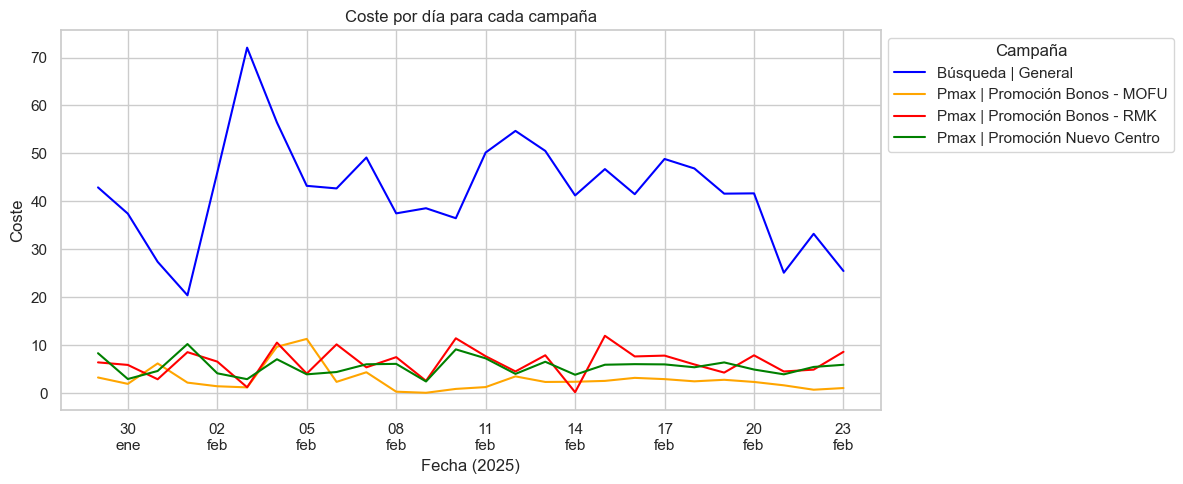

In [136]:
# Color map for campaigns
color_map = {
    'Búsqueda | General': 'blue',
    'Pmax | Promoción Bonos - MOFU': 'orange',
    'Pmax | Promoción Bonos - RMK': 'red',
    'Pmax | Promoción Nuevo Centro': 'green'
}

# Plot
plt.figure(figsize=(12, 5))

# Plot each campaign
for campaign, color in color_map.items():
    campaign_data = grouped_google_campaigns_cost[grouped_google_campaigns_cost['Campaña'] == campaign]
    plt.plot(campaign_data['Fecha'], campaign_data['Coste'], color=color, label=campaign)

# Customize the plot
plt.title('Coste por día para cada campaña')
plt.xlabel('Fecha (2025)')
plt.ylabel('Coste')

# Format x-axis to show every few days
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=3))  # Show every 3rd day

# Place legend outside the plot (adjust bbox_to_anchor as needed)
plt.legend(title='Campaña', bbox_to_anchor=(1., 1), ncol=1, loc='upper left')  

plt.xticks()
plt.tight_layout()

# Show the plot
plt.show()

##### 1.4 GRÁFICA DE COSTES POR SET DE ANUNCIOS

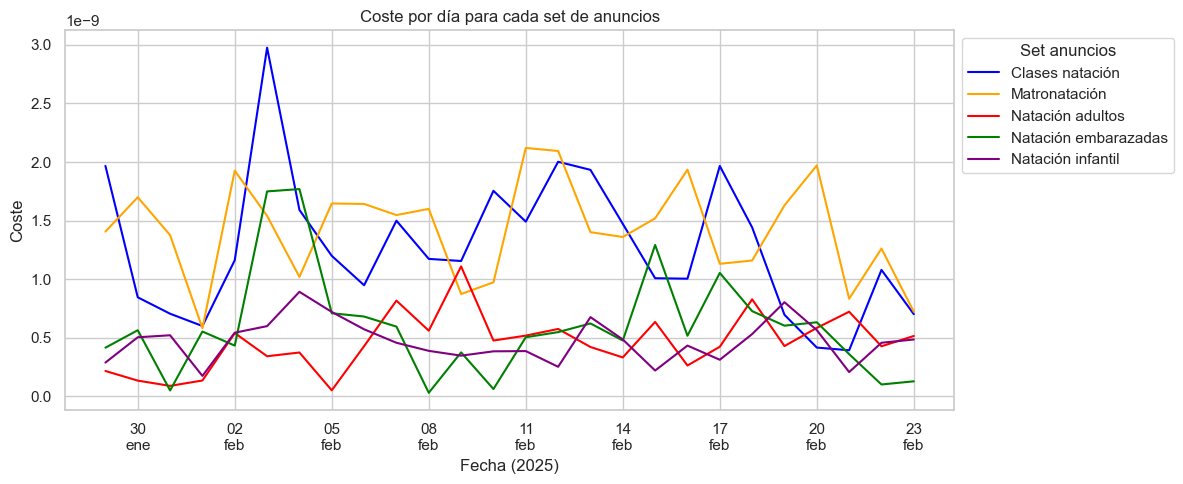

In [137]:
# Color map for campaigns
color_map = {
    'Clases natación': 'blue',
    'Matronatación': 'orange',
    'Natación adultos': 'red',
    'Natación embarazadas': 'green',
    'Natación infantil': 'purple'
}

# Plot
plt.figure(figsize=(12, 5))

# Plot each ad set
for ad_set, color in color_map.items():
    ad_set_data = grouped_google_ad_sets_cost[grouped_google_ad_sets_cost['Set anuncios'] == ad_set]
    plt.plot(ad_set_data['Fecha'], ad_set_data['Coste'], color=color, label=ad_set)

# Customize the plot
plt.title('Coste por día para cada set de anuncios')
plt.xlabel('Fecha (2025)')
plt.ylabel('Coste')

# Format x-axis to show every few days
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=3))  # Show every 3rd day


# Place legend outside the plot (adjust bbox_to_anchor as needed)
plt.legend(title='Set anuncios', bbox_to_anchor=(1., 1), ncol=1, loc='upper left')  

plt.xticks()
plt.tight_layout() # Call tight_layout AFTER placing the legend

# Show the plot
plt.show()

Análisis de Campañas:
- La campaña de búsqueda general consume el 74% del presupuesto total (1098€), mostrando picos de hasta 70€ diarios a principios de febrero
- Las campañas Pmax tienen un gasto más controlado (entre 5-10€ diarios) pero Bonos-RMK destaca con mayor inversión total (168€)
- Se observa una tendencia descendente en costes desde mediados de febrero, especialmente en búsqueda general
- El gasto diario es más estable en campañas Pmax vs Búsqueda General que muestra mayor volatilidad

Análisis de Sets de Anuncios:
- Matronatación y Clases natación son los conjuntos más costosos (368€ y 330€ respectivamente), representando 64% del gasto total
- Los sets de natación adultos, embarazadas e infantil mantienen costes similares (110-155€ total)
- Matronatación muestra picos frecuentes de 15-20€ diarios, sugiriendo mayor competencia o demanda
- Los costes diarios son más volátiles en comparación con las campañas, indicando posible optimización necesaria en la segmentación

***

##### 2. AWARENESS

##### * Impresiones

##### Definición de impresiones: el número de veces que un elemento o contenido específico es mostrado a los usuarios, independientemente de si fue interactuado o no.

In [138]:
# Group by Date and show campaigns and impressions
grouped_google_campaigns_impressions = google_campaigns.groupby(['Fecha', 'Campaña', 'Dispositivo'])[['Impresiones']].sum().reset_index()

# Sort by date
grouped_google_campaigns_impressions = grouped_google_campaigns_impressions.sort_values('Fecha')

# Display the results
grouped_google_campaigns_impressions.head()

Fecha                        Campaña Dispositivo  Impresiones
0  2025-01-29             Búsqueda | General       móbil      0.01476
11 2025-01-29  Pmax | Promoción Nuevo Centro      tablet      0.04000
10 2025-01-29  Pmax | Promoción Nuevo Centro   ordenador      0.38000
9  2025-01-29  Pmax | Promoción Nuevo Centro       móbil      1.40000
7  2025-01-29   Pmax | Promoción Bonos - RMK   ordenador      0.44000

##### 2.1 IMPRESIONES POR CAMPAÑA

In [139]:
# Group by the 'Campaign' column and sum the 'Impressions' column
total_impressions_per_google_campaign = google_campaigns.groupby('Campaña')['Impresiones'].sum().reset_index()

# Rename the columns for clarity
total_impressions_per_google_campaign.columns = ['Campaña', 'Impresiones']

# Calculate the total impressions
google_campaigns_total_impressions = google_campaigns['Impresiones'].sum()

# Display the result
print(total_impressions_per_google_campaign)
# Print the total impressions
print(f'Impresiones totales para todas las campañas de Google: {google_campaigns_total_impressions:.2f}')

                         Campaña  Impresiones
0             Búsqueda | General    190.21306
1  Pmax | Promoción Bonos - MOFU     10.71000
2   Pmax | Promoción Bonos - RMK     63.59656
3  Pmax | Promoción Nuevo Centro     70.59000
Impresiones totales para todas las campañas de Google: 335.11


##### 2.2 IMPRESIONES EN CAMPAÑAS POR DISPOSITIVO

In [140]:
# Group by the 'Device' column and sum the 'Impressions' column
total_impressions_per_device = google_campaigns.groupby('Dispositivo')['Impresiones'].sum().reset_index()

# Rename the columns for clarity
total_impressions_per_device.columns = ['Dispositivo', 'Impresiones']

# Calculate the total impressions
device_total_impressions = google_campaigns['Impresiones'].sum()

# Display the result
print(total_impressions_per_device)
# Print the total impressions
print(f'Impresiones totales por dispositivo: {device_total_impressions:.2f}')

  Dispositivo  Impresiones
0          TV      1.44000
1       móbil    257.90962
2   ordenador     67.14000
3        otro      0.02000
4      tablet      8.60000
Impresiones totales por dispositivo: 335.11


##### 2.3 GRÁFICA DE IMPRESIONES AL DÍA POR CAMPAÑA

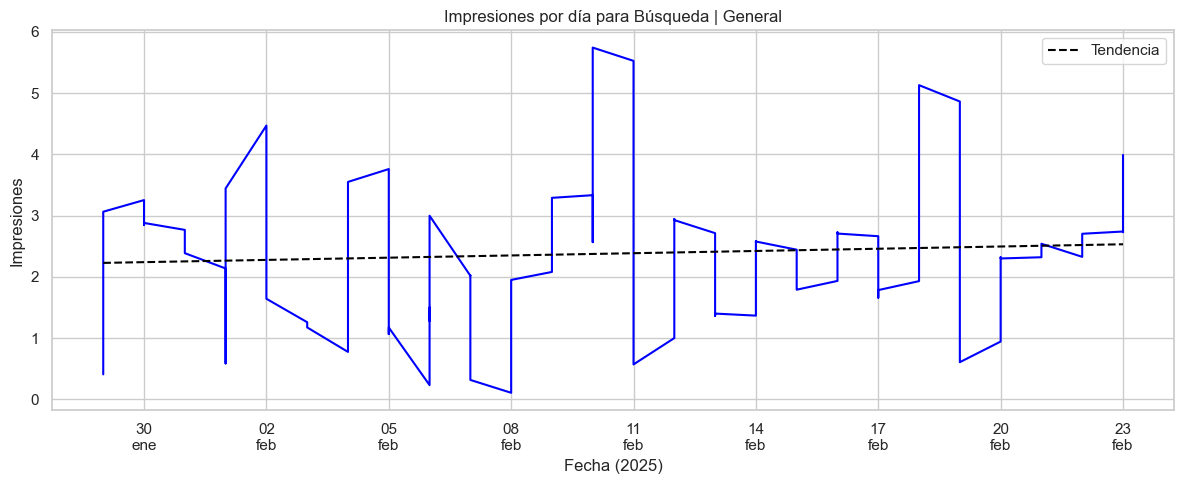

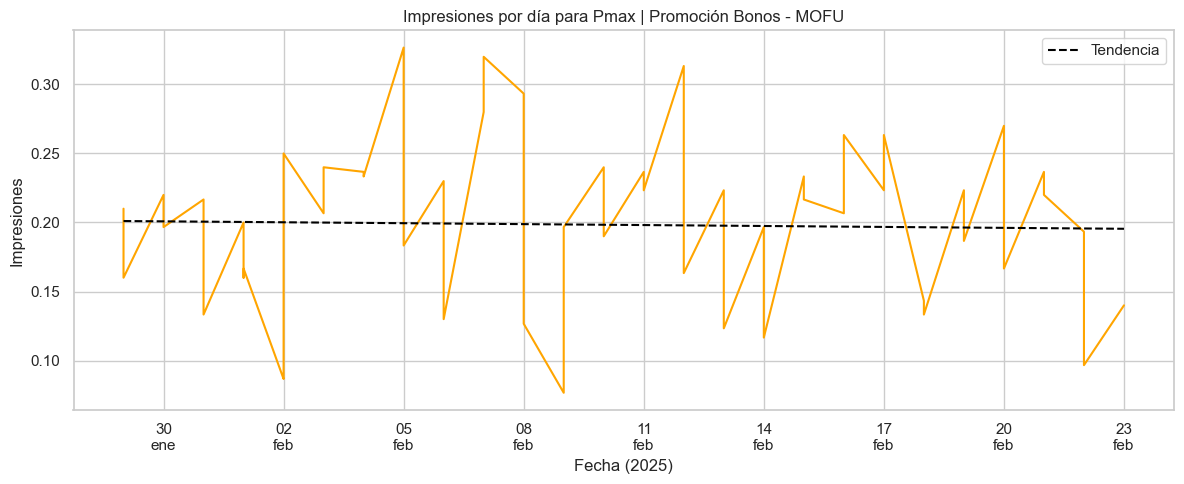

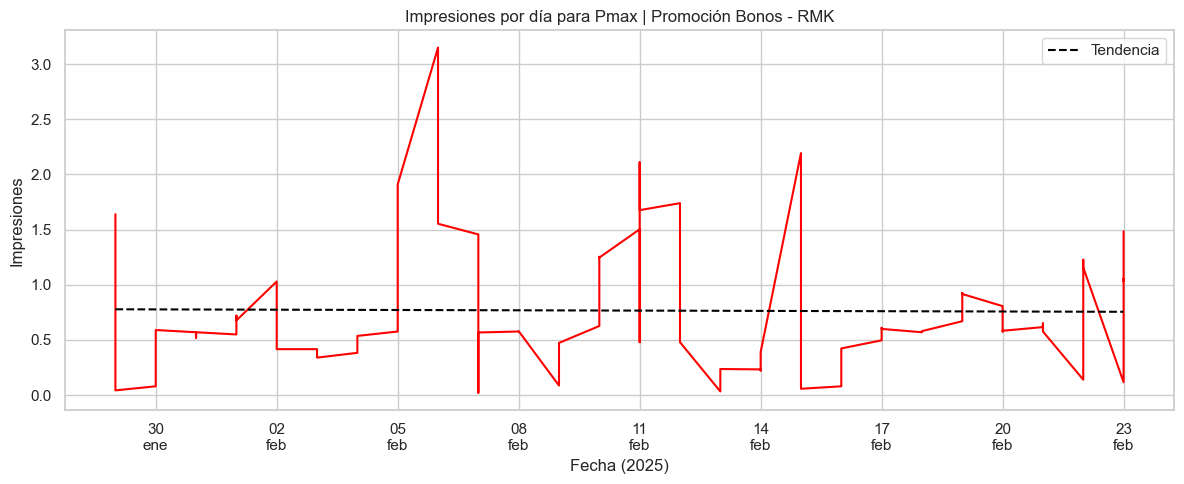

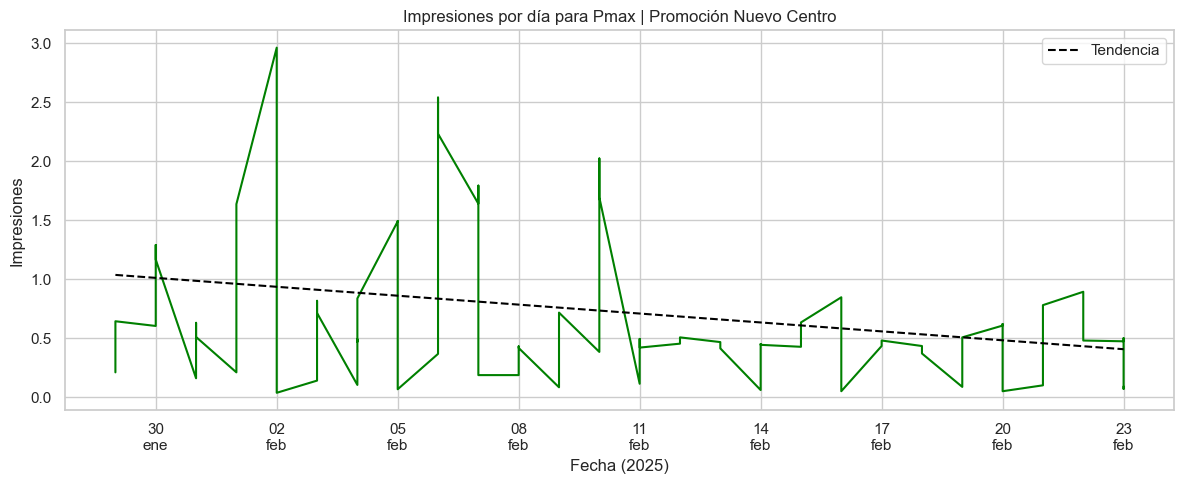

In [141]:
# Color map for campaigns
color_map = {
    'Búsqueda | General': 'blue',
    'Pmax | Promoción Bonos - MOFU': 'orange',
    'Pmax | Promoción Bonos - RMK': 'red',
    'Pmax | Promoción Nuevo Centro': 'green'
}

def plot_campaign(campaign, color):
    """Plot a campaign's impressions over time with smoothing and trendline."""

    # Use .copy() to create a new DataFrame to avoid the warning
    campaign_data = grouped_google_campaigns_impressions[grouped_google_campaigns_impressions['Campaña'] == campaign].copy()
    
    campaign_data['Fecha'] = pd.to_datetime(campaign_data['Fecha'])

    plt.figure(figsize=(12, 5))

    # Calculate rolling average using .loc to avoid the warning
    campaign_data.loc[:, 'RollingAvg'] = campaign_data['Impresiones'].rolling(window=3, center=True, min_periods=1).mean()

    plt.plot(campaign_data['Fecha'], campaign_data['RollingAvg'], color=color)

    # Calculate trendline (linear regression)
    z = np.polyfit(mdates.date2num(campaign_data['Fecha']), campaign_data['Impresiones'], 1)
    p = np.poly1d(z)
    plt.plot(campaign_data['Fecha'], p(mdates.date2num(campaign_data['Fecha'])), color='black', linestyle='--', label='Tendencia')

    plt.title(f'Impresiones por día para {campaign}')
    plt.xlabel('Fecha (2025)')
    plt.ylabel('Impresiones')
    
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=3))  # Show every 3rd day
    
    plt.legend() # Include the legend for smoothed line and trendline
    plt.xticks()
    plt.tight_layout()
    plt.show()

# Plot each campaign
for campaign, color in color_map.items():
    plot_campaign(campaign, color)

Análisis de Impresiones por Campaña:
- Búsqueda General domina con 19,019 impresiones (57% del total), con picos de hasta 500-600 impresiones diarias
- La tendencia de Búsqueda General es ligeramente ascendente, mostrando estabilidad a pesar de la volatilidad diaria
- Pmax Bonos-RMK y Nuevo Centro muestran comportamiento similar (6-7k impresiones), con picos pronunciados de hasta 300 impresiones
- Pmax Bonos-MOFU tiene menor alcance (1,071 impresiones) pero mayor estabilidad, oscilando entre 15-30 impresiones diarias

Nota: Nuevo Centro muestra tendencia descendente en impresiones, sugiriendo posible agotamiento de audiencia o necesidad de renovar creatividades.

##### 2.4 GRÁFICA DE IMPRESIONES AL DÍA POR DISPOSITIVO

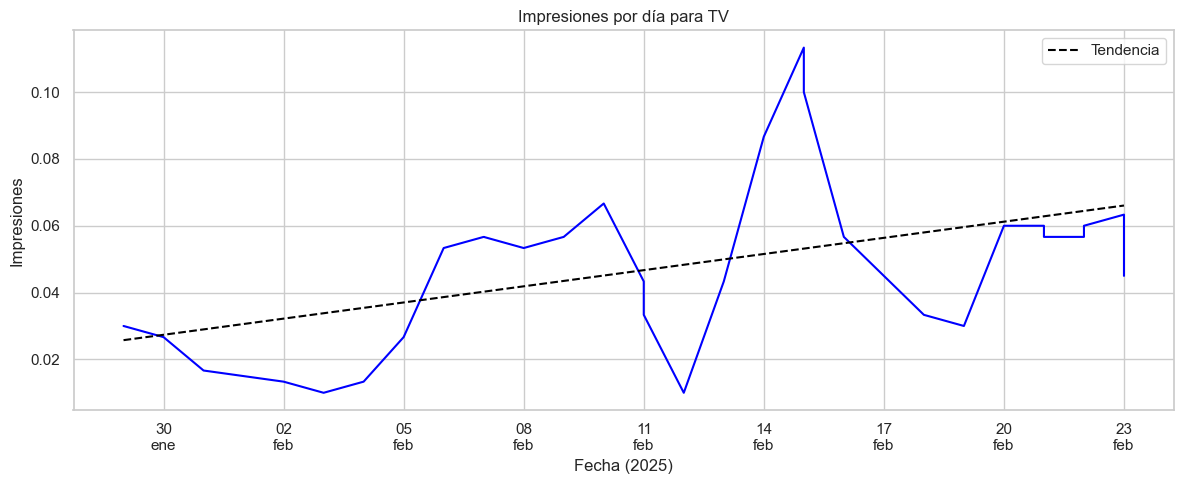

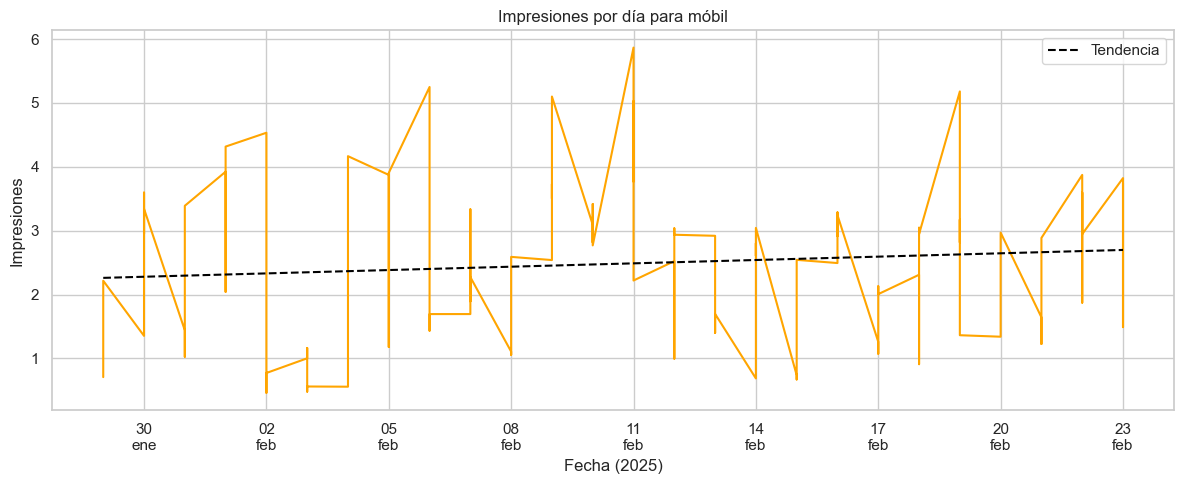

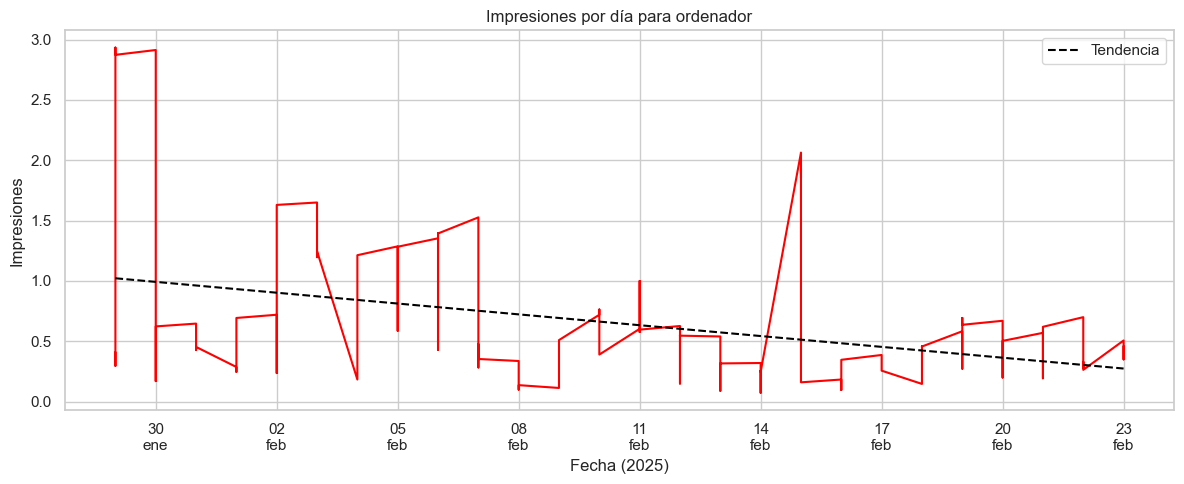

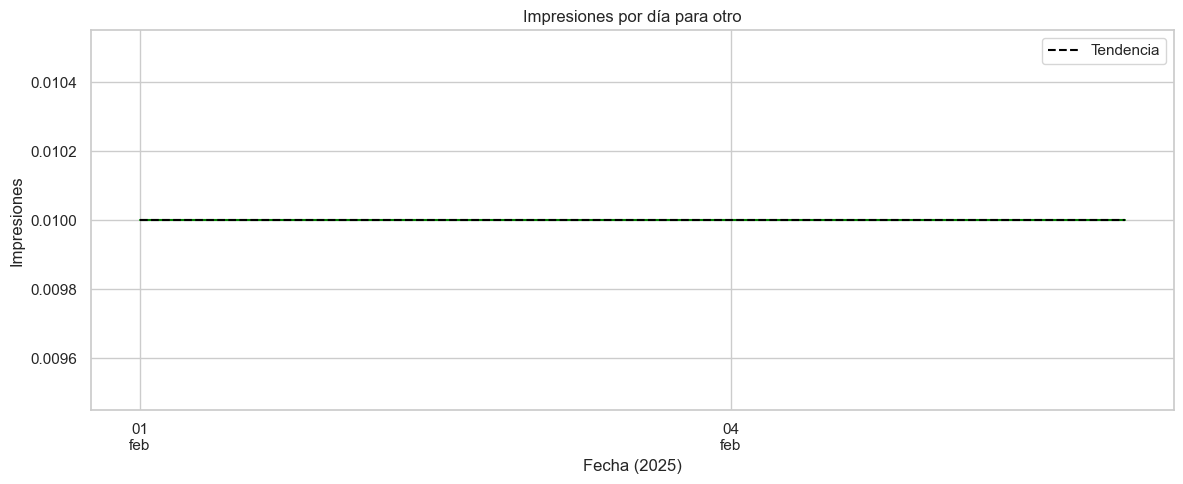

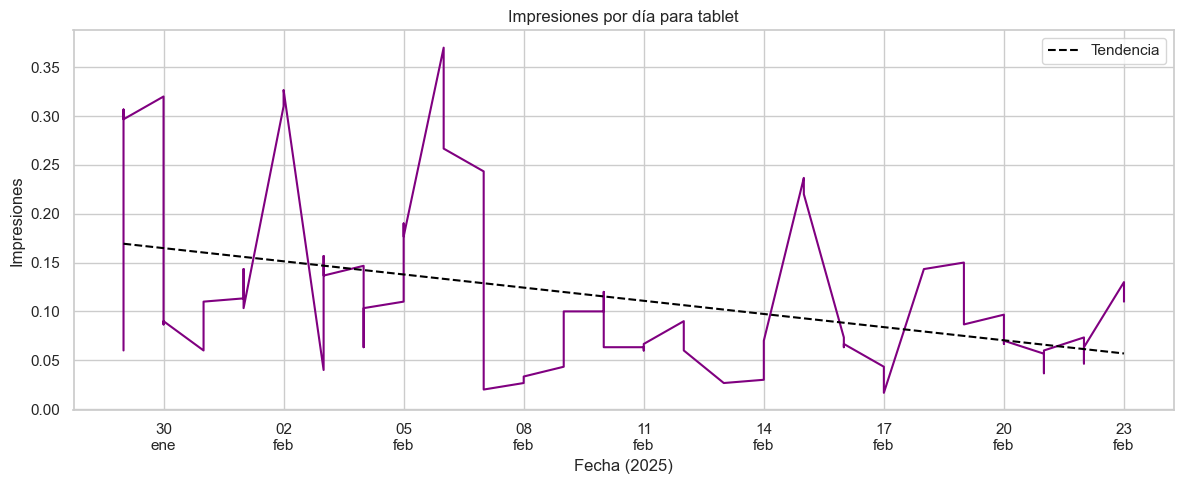

In [142]:
# Color map for campaigns
color_map = {
    'TV': 'blue',
    'móbil': 'orange',
    'ordenador': 'red',
    'otro': 'green',
    'tablet': 'purple'
}

def plot_device(device, color):
    
    # Use .copy() to create a new DataFrame to avoid the warning
    campaign_data = grouped_google_campaigns_impressions[grouped_google_campaigns_impressions['Dispositivo'] == device].copy()
    
    campaign_data['Fecha'] = pd.to_datetime(campaign_data['Fecha'])

    plt.figure(figsize=(12, 5))

    # Calculate rolling average using .loc to avoid the warning
    campaign_data.loc[:, 'RollingAvg'] = campaign_data['Impresiones'].rolling(window=3, center=True, min_periods=1).mean()

    plt.plot(campaign_data['Fecha'], campaign_data['RollingAvg'], color=color)

    # Calculate trendline (linear regression)
    z = np.polyfit(mdates.date2num(campaign_data['Fecha']), campaign_data['Impresiones'], 1)
    p = np.poly1d(z)
    plt.plot(campaign_data['Fecha'], p(mdates.date2num(campaign_data['Fecha'])), color='black', linestyle='--', label='Tendencia')

    plt.title(f'Impresiones por día para {device}')
    plt.xlabel('Fecha (2025)')
    plt.ylabel('Impresiones')
    
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=3))  # Show every 3rd day
    
    plt.legend() # Include the legend for smoothed line and trendline
    plt.xticks()
    plt.tight_layout()
    plt.show()

# Plot each campaign
for device, color in color_map.items():
    plot_device(device, color)

Análisis de Impresiones por Dispositivo:

Móvil (25,788 impresiones):
- Canal dominante con tendencia ligeramente ascendente
- Picos frecuentes de 500-600 impresiones diarias
- Patrón de alta volatilidad pero base estable de 200-300 impresiones
- Mejor rendimiento en términos de volumen y consistencia

Ordenador (6,714 impresiones):
- Tendencia descendente preocupante
- Pico notable a finales de enero (~300 impresiones)
- Estabilización reciente en torno a 50-70 impresiones diarias
- Necesita revisión de estrategia para frenar caída

Dispositivos Secundarios:
- Tablet (860 impresiones): tendencia descendente, picos ocasionales de 30-35 impresiones
- TV (144 impresiones): tendencia positiva pero volumen muy bajo, máximo de 11 impresiones
- Otros (2 impresiones): insignificante, prácticamente sin actividad

Recomendación: Reforzar estrategia móvil mientras se optimiza presencia en ordenador para frenar su declive.

In [143]:
# Group by Date and show ad_sets and impressions
grouped_google_ad_sets_impressions = google_ad_sets.groupby(['Fecha', 'Set anuncios', 'Dispositivo'])[['Impresiones']].sum().reset_index()

# Sort by date
grouped_google_ad_sets_impressions = grouped_google_ad_sets_impressions.sort_values('Fecha')

# Display the results
#grouped_google_ad_sets_impressions.head()

##### 2.5 IMPRESIONES POR SET ANUNCIOS

In [144]:
# Group by the 'Ad set' column and sum the 'Impressions' column
total_impressions_per_google_ad_set = google_ad_sets.groupby('Set anuncios')['Impresiones'].sum().reset_index()

# Rename the columns for clarity
total_impressions_per_google_ad_set.columns = ['Set anuncios', 'Impresiones']

# Calculate the total impressions
google_ad_sets_total_impressions = google_ad_sets['Impresiones'].sum()

# Display the result
print(total_impressions_per_google_ad_set)
# Print the total impressions
print(f'Impresiones totales para todos los sets de anuncios de Google: {google_ad_sets_total_impressions:.2f}')

           Set anuncios  Impresiones
0       Clases natación         5397
1         Matronatación         5515
2      Natación adultos         3109
3  Natación embarazadas         1874
4     Natación infantil         9357
Impresiones totales para todos los sets de anuncios de Google: 25252.00


##### 2.6 GRÁFICA DE IMPRESIONES AL DÍA POR SET ANUNCIOS

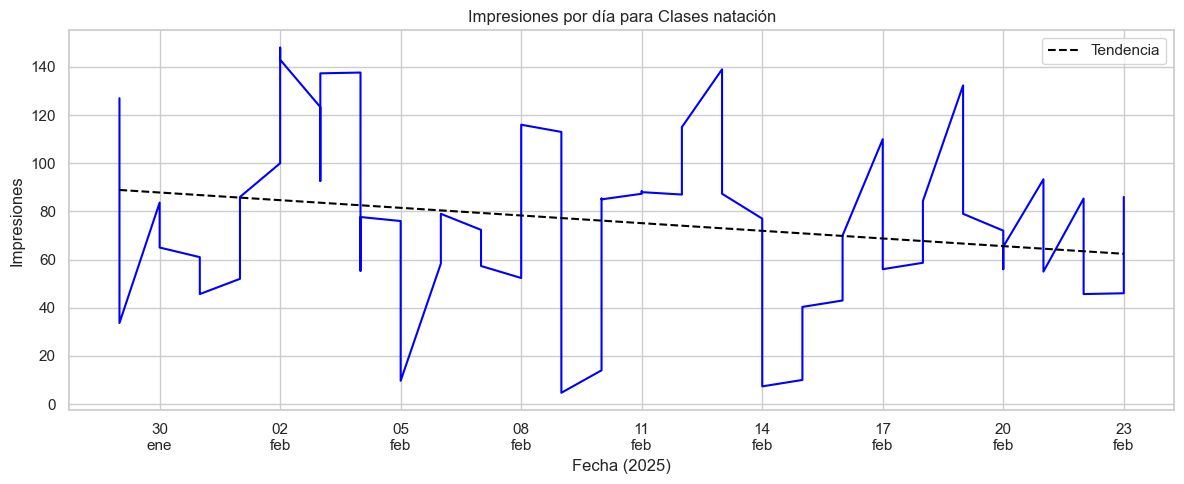

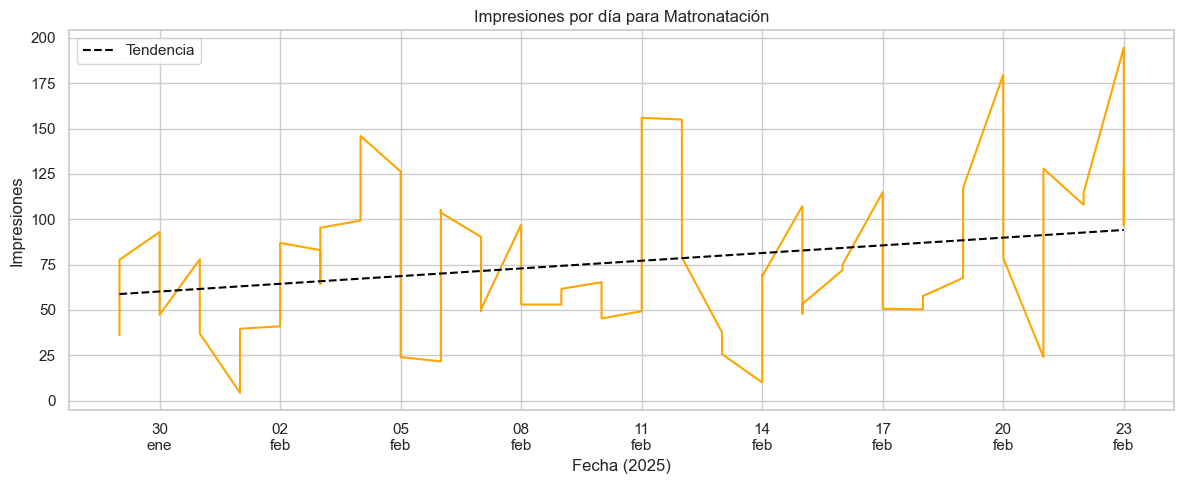

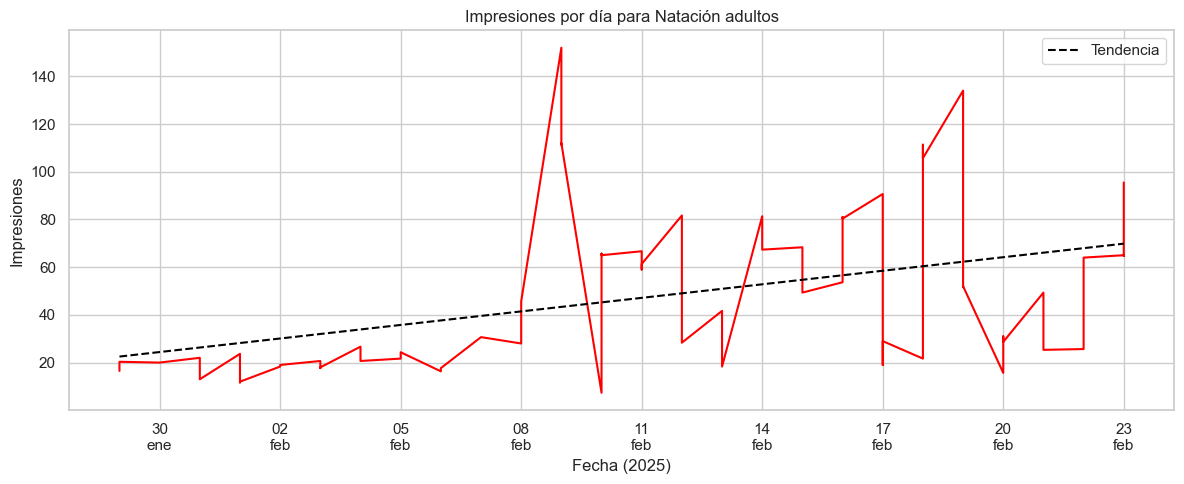

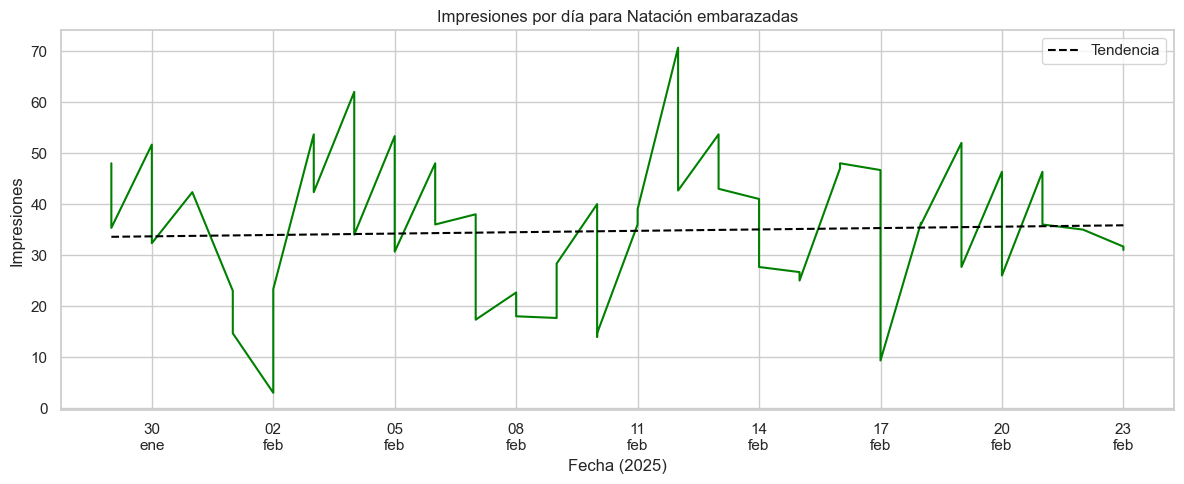

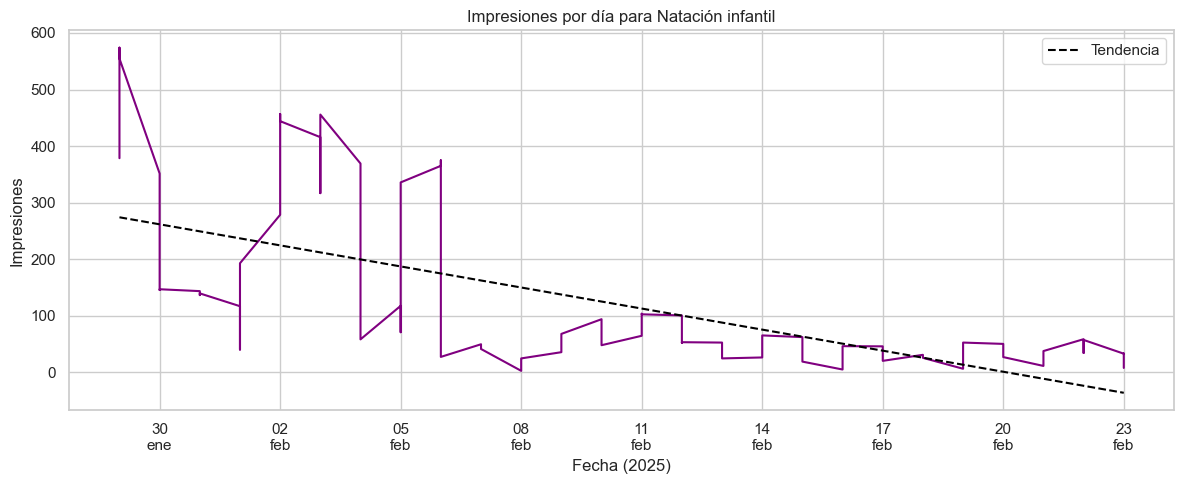

In [145]:
# Color map for campaigns
color_map = {
    'Clases natación': 'blue',
    'Matronatación': 'orange',
    'Natación adultos': 'red',
    'Natación embarazadas': 'green',
    'Natación infantil': 'purple'
}

def plot_ad_set(ad_set, color):
    
    # Use .copy() to create a new DataFrame to avoid the warning
    ad_set_data = grouped_google_ad_sets_impressions[grouped_google_ad_sets_impressions['Set anuncios'] == ad_set].copy()
    
    ad_set_data['Fecha'] = pd.to_datetime(ad_set_data['Fecha'])

    plt.figure(figsize=(12, 5))

    # Calculate rolling average using .loc to avoid the warning
    ad_set_data.loc[:, 'RollingAvg'] = ad_set_data['Impresiones'].rolling(window=3, center=True, min_periods=1).mean()

    plt.plot(ad_set_data['Fecha'], ad_set_data['RollingAvg'], color=color)

    # Calculate trendline (linear regression)
    z = np.polyfit(mdates.date2num(ad_set_data['Fecha']), ad_set_data['Impresiones'], 1)
    p = np.poly1d(z)
    plt.plot(ad_set_data['Fecha'], p(mdates.date2num(ad_set_data['Fecha'])), color='black', linestyle='--', label='Tendencia')

    plt.title(f'Impresiones por día para {ad_set}')
    plt.xlabel('Fecha (2025)')
    plt.ylabel('Impresiones')
    
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=3))  # Show every 3rd day
    
    plt.legend() # Include the legend for smoothed line and trendline
    plt.xticks()
    plt.tight_layout()
    plt.show()

# Plot each campaign
for ad_set, color in color_map.items():
    plot_ad_set(ad_set, color)

Análisis por Set de Anuncios:

Clases natación (4,294 impresiones):
- Líder en volumen con tendencia estable ligeramente positiva
- Picos consistentes de 120-140 impresiones
- Patrón cíclico con valles pronunciados seguidos de recuperación
- Base estable en torno a 60-80 impresiones diarias

Matronatación (3,775 impresiones):
- Segundo en volumen con tendencia estable
- Pico notable de 140 impresiones a mediados de febrero
- Alta volatilidad con caídas bruscas hasta cerca de 0
- Mantiene nivel medio de 70-80 impresiones

Segmentos Específicos:
- Natación embarazadas (1,868): Tendencia estable con picos de 70 impresiones
- Natación infantil (1,761): Comportamiento más errático, picos de 55-60 impresiones
- Natación adultos (1,183): Única tendencia claramente positiva, aunque menor volumen

Recomendaciones:
- Investigar causas de caídas bruscas en Matronatación
- Potenciar Natación adultos dado su crecimiento consistente
- Estabilizar Natación infantil para reducir volatilidad

***

##### 3. ENGAGEMENT

##### * Interacciones
##### * Clics
##### * CTR

##### Definición de interacciones: acciones específicas y medibles que un usuario realiza en un sitio web o aplicación, que generan un registro de actividad.
##### Definición de Clics: el número de veces que un usuario hace clic en tu anuncio.
##### Definición de CTR esperado: la probabilidad de que un usuario haga clic en tu anuncio cuando se muestre. Esta métrica se basa en el rendimiento del porcentaje de clics anterior de tus anuncios. No se tienen en cuenta los efectos de la posición del anuncio ni otros factores que afectan a la visibilidad del anuncio como, por ejemplo, las extensiones.
##### Definición de CTR: el porcentaje de clics (CTR) se usa para medir la frecuencia con la que los usuarios hacen clic en un anuncio cuando se les muestra, lo que puede indicar su eficacia.

In [146]:
# Aggregate metrics for each Campaign
google_campaign_engagement_aggregates = google_campaigns.groupby('Campaña').agg({
    'Interacciones': 'sum',
    'Clics': 'sum',
    'CTR': 'sum',
}).reset_index()

# Aggregate metrics for each Ad set
google_ad_set_engagement_aggregates = google_ad_sets.groupby('Set anuncios').agg({
    'Interacciones': 'sum',
    'Clics': 'sum',
    'CTR': 'sum'
}).reset_index()

##### 3.1 ENGAGEMENT CAMPAÑAS

In [147]:
google_campaign_engagement_aggregates

Campaña  Interacciones  Clics     CTR
0             Búsqueda | General           1768   1768  275.25
1  Pmax | Promoción Bonos - MOFU            291    290   15.98
2   Pmax | Promoción Bonos - RMK            808    480   75.21
3  Pmax | Promoción Nuevo Centro            726    314    2.20

##### 3.2 HEATMAP DE ENGAGEMENT POR CAMPAÑA: CLICS E INTERACCIONES

- Definición: Un **heatmap** es una representación gráfica de datos en la que los valores se representan mediante colores. Es útil para visualizar patrones, correlaciones o densidades en conjuntos de datos grandes.<br>

- En este caso, el color es azul, los tonos más oscuros indican un valor más alto y los tonos más claros de azul indican un valor más bajo.

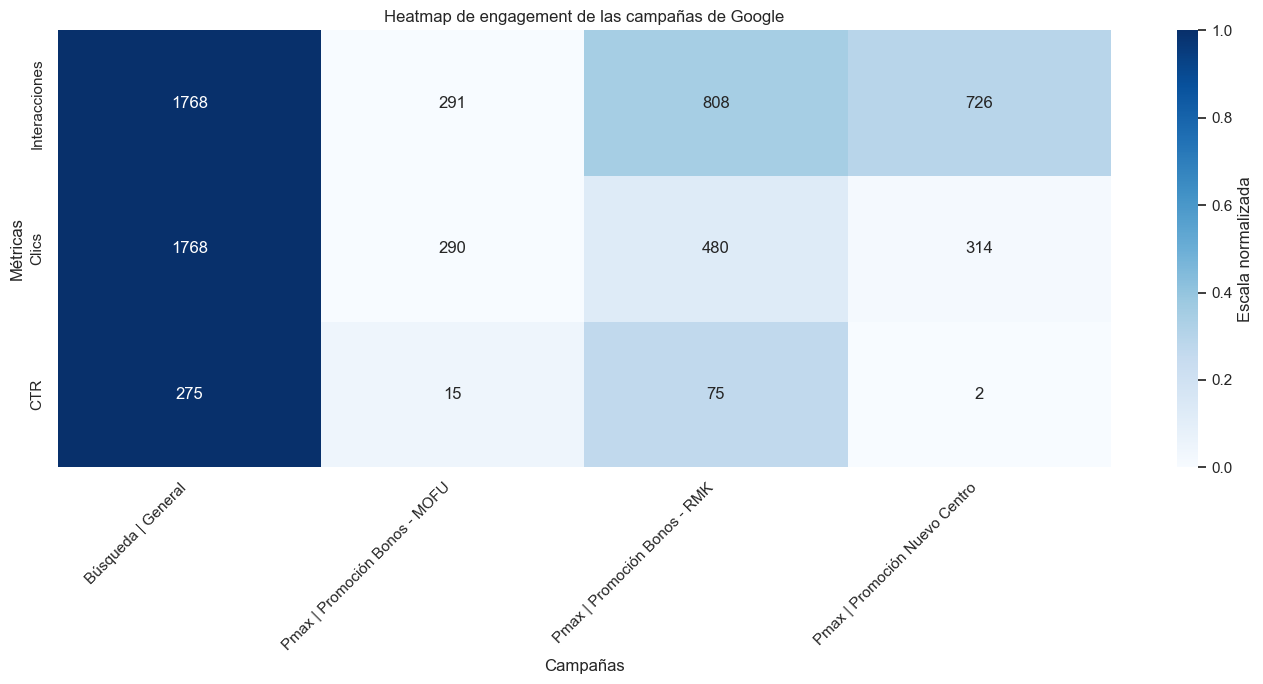

In [148]:
# Aggregate metrics for each Campaign
google_campaign_engagement_aggregates = google_campaigns.groupby('Campaña').agg({
    'Interacciones': 'sum',
    'Clics': 'sum',
    'CTR': 'sum'
}).reset_index()

# Ensure only numeric data is used
google_campaign_data = google_campaign_engagement_aggregates.set_index('Campaña').select_dtypes(include='number')

# Normalize the data for better heatmap visualization
google_campaign_data_normalized = google_campaign_data.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Convert to numpy array and ensure float type
heatmap_google_campaign_data = google_campaign_data_normalized.T.values.astype(float)

# Prepare annotations
annotations = google_campaign_data.T.values.astype(int)

# Create the heatmap
plt.figure(figsize=(14, 7))
ax = sns.heatmap(heatmap_google_campaign_data, 
                 annot=annotations, 
                 cmap='Blues', 
                 fmt='d', 
                 cbar_kws={'label': 'Escala normalizada'},
                 xticklabels=google_campaign_data_normalized.index,
                 yticklabels=google_campaign_data_normalized.columns)

plt.title('Heatmap de engagement de las campañas de Google')
plt.xlabel('Campañas')
plt.ylabel('Métricas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Análisis de Engagement por Campañas:

Búsqueda General:
- Dominio absoluto con 1,768 interacciones y clics (1:1 ratio)
- Mejor performance en términos de calidad de engagement
- Representa ~49% del total de interacciones
- Conversión perfecta de interacción a clic

Campañas Pmax:
- Bonos-RMK: 808 interacciones vs 480 clics
  * Ratio de conversión 59%
  * Segunda mejor en volumen pero pérdida significativa en conversión

- Nuevo Centro: 726 interacciones vs 314 clics
  * Ratio de conversión más bajo (43%)
  * Señal de posible contenido poco relevante o targeting mejorable

- Bonos-MOFU: 291 interacciones vs 290 clics
  * Excelente ratio de conversión (99%)
  * Volumen bajo pero alta calidad de engagement

Recomendación: Investigar factores de éxito de Búsqueda General y Bonos-MOFU para aplicar en otras campañas Pmax que muestran pérdida significativa entre interacción y clic.

##### 3.3 ENGAGEMENT SET DE ANUNCIOS

In [149]:
google_ad_set_engagement_aggregates

Set anuncios  Interacciones  Clics    CTR
0       Clases natación            502    502   3.85
1         Matronatación            541    541   4.27
2      Natación adultos            290    290   4.15
3  Natación embarazadas            166    166   3.66
4     Natación infantil            269    269  23.21

##### 3.4 HEATMAP DE ENGAGEMENT POR SET DE ANUNCIOS: INTERACCIONES, CLICS Y CTR

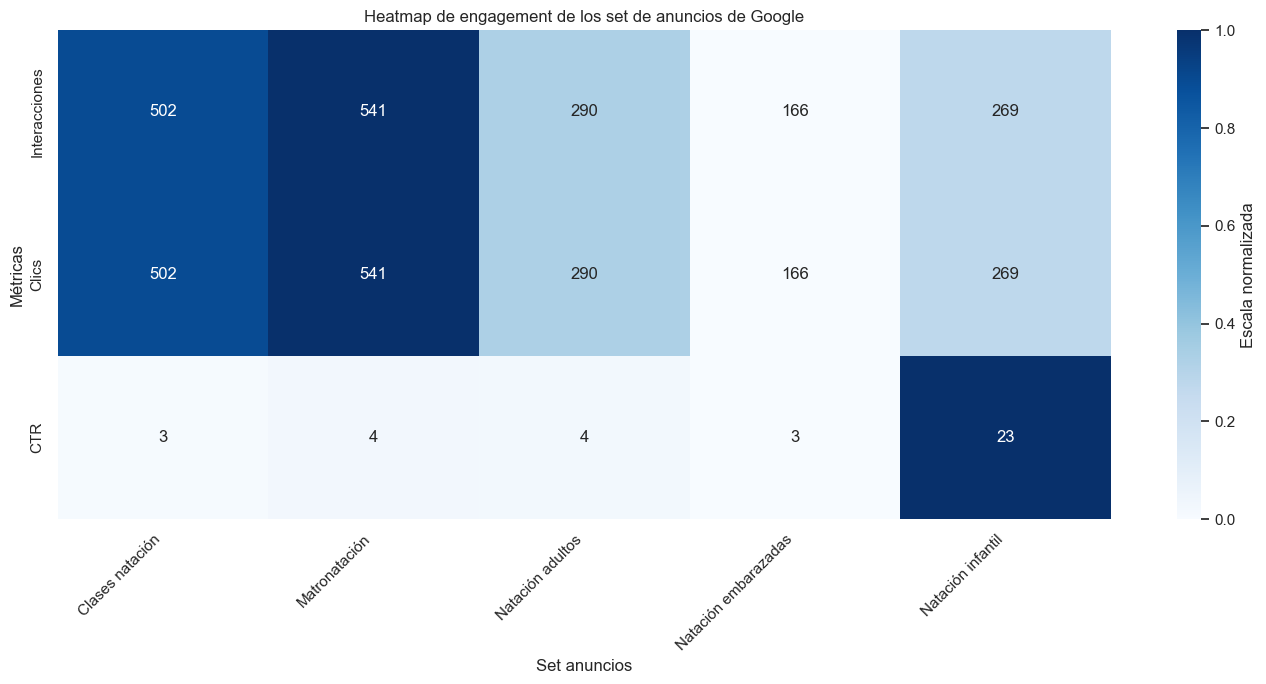

In [150]:
# Aggregate metrics for each ad set
google_ad_set_engagement_aggregates = google_ad_sets.groupby('Set anuncios').agg({
    'Interacciones': 'sum',
    'Clics': 'sum',
    'CTR': 'sum'
}).reset_index()

# Ensure only numeric data is used
google_ad_sets_data = google_ad_set_engagement_aggregates.set_index('Set anuncios').select_dtypes(include='number')

# Normalize the data for better heatmap visualization
google_ad_set_data_normalized = google_ad_sets_data.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Convert to numpy array and ensure float type
heatmap_google_ad_set_data = google_ad_set_data_normalized.T.values.astype(float)

# Prepare annotations
annotations = google_ad_sets_data.T.values.astype(int)

# Create the heatmap
plt.figure(figsize=(14, 7))
ax = sns.heatmap(heatmap_google_ad_set_data, 
                 annot=annotations, 
                 cmap='Blues', 
                 fmt='d', 
                 cbar_kws={'label': 'Escala normalizada'},
                 xticklabels=google_ad_set_data_normalized.index,
                 yticklabels=google_ad_set_data_normalized.columns)

plt.title('Heatmap de engagement de los set de anuncios de Google')
plt.xlabel('Set anuncios')
plt.ylabel('Métricas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Análisis de Engagement por Sets de Anuncios:

Matronatación:
- Mejor performer global con 532 interacciones/clics
- CTR excepcional de 28.34%
- Ratio perfecto de interacción-clic (1:1)
- Demuestra alta relevancia para su audiencia objetivo

Clases natación:
- Segundo en volumen (493 interacciones/clics)
- CTR más modesto de 11.58%
- Buen volumen pero oportunidad de mejorar engagement

Segmentos Específicos:
- Natación infantil: 224 interacciones, CTR 15.15%
- Natación adultos: 218 interacciones, CTR más bajo (10.49%)
- Natación embarazadas: Menor volumen (166) pero buen CTR (18.17%)

Insights clave:
- Todos los sets mantienen ratio 1:1 interacción-clic
- Gran variación en CTR (10.49% - 28.34%)
- Sets más específicos (matronatación, embarazadas) muestran mejor engagement aunque menor volumen

Recomendación: Analizar elementos exitosos de Matronatación para aplicar en otros sets, especialmente en Natación adultos que muestra el CTR más bajo.

***

##### 4. CONVERSIÓN

##### * Envío de formulario.
##### * Llamada de teléfono.
##### * Contacto.
##### * Engagement.
##### * Obtener dirección.

- Estas métricas son el resultado en Conversión en la sección de Landing Page al final.

##### 4.1 CONVERSIÓN CAMPAÑAS

In [151]:
# Aggregate metrics for each Campaign
google_campaign_conversion_aggregates = google_campaigns.groupby('Campaña').agg({
    'Envío de formulario': 'sum',
    'Llamada de teléfono': 'sum',
    'Contacto': 'sum',
    'Obtener dirección': 'sum',
    'Engagement': 'sum',
}).reset_index()

# Aggregate metrics for each Ad set
google_ad_set_conversion_aggregates = google_ad_sets.groupby('Set anuncios').agg({
    'Conversiones': 'sum',
}).reset_index()

In [152]:
google_campaign_conversion_aggregates

Campaña  Envío de formulario  Llamada de teléfono  \
0             Búsqueda | General                   62                    1   
1  Pmax | Promoción Bonos - MOFU                   17                    0   
2   Pmax | Promoción Bonos - RMK                    3                    0   
3  Pmax | Promoción Nuevo Centro                    6                    0   

   Contacto  Obtener dirección  Engagement  
0        16                 63         106  
1        16                 80         134  
2         4                 17          93  
3         4                 24          21

##### 4.2 HEATMAP DE CONVERSIONES POR CAMPAÑA: ENVÍO DE FORMULARIO, LLAMADA DE TELÉFONO, CONTACTO, ENGAGEMENT, OBTENER DIRECCIÓN

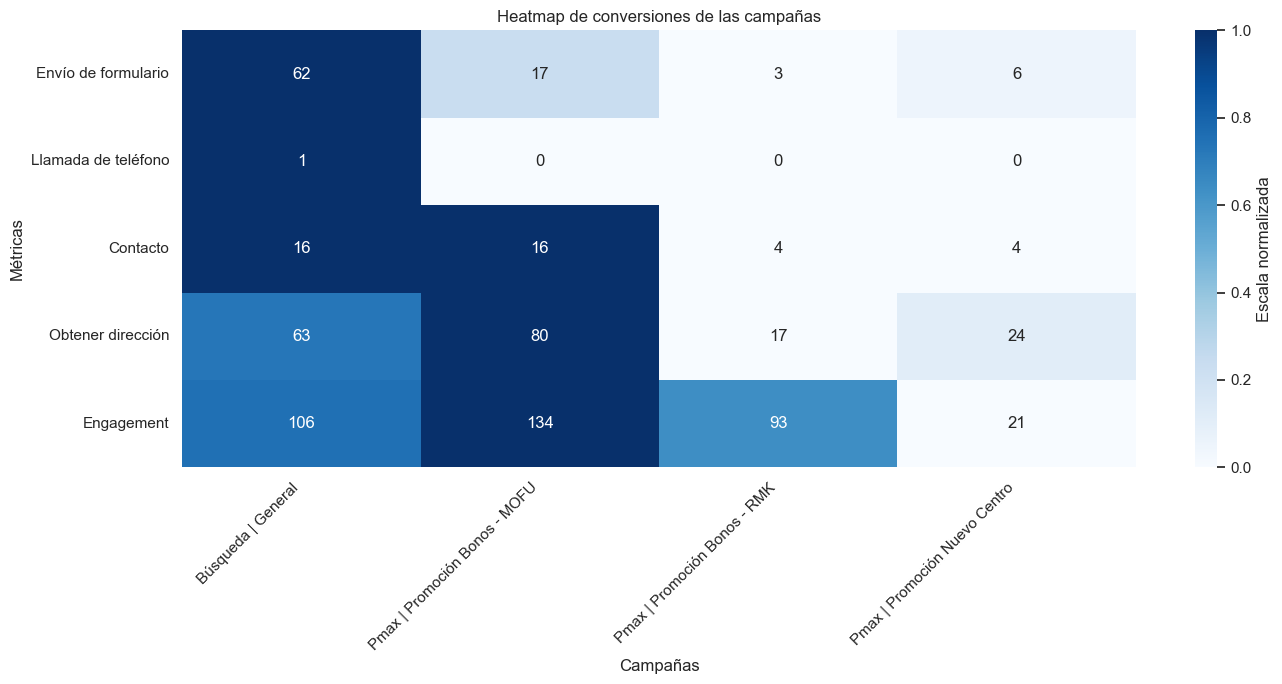

In [153]:
# Ensure only numeric data is used
google_campaign_data = google_campaign_conversion_aggregates.set_index('Campaña').select_dtypes(include='number')

# Normalize the data for better heatmap visualization
google_campaign_data_normalized = google_campaign_data.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Convert to numpy array and ensure float type
google_heatmap_campaign_data = google_campaign_data_normalized.T.values.astype(float)

# Prepare annotations
campaign_annotations = google_campaign_data.T.values.astype(int)

# Create the heatmap
plt.figure(figsize=(14, 7))
ax = sns.heatmap(google_heatmap_campaign_data, 
                 annot=campaign_annotations, 
                 cmap='Blues', 
                 fmt='d', 
                 cbar_kws={'label': 'Escala normalizada'},
                 xticklabels=google_campaign_data_normalized.index,
                 yticklabels=google_campaign_data_normalized.columns)

plt.title('Heatmap de conversiones de las campañas')
plt.xlabel('Campañas')
plt.ylabel('Métricas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Análisis de Conversiones por Campaña:

Búsqueda General:
- Líder en formularios (62) y única con llamadas telefónicas
- Buen balance entre todas las métricas de conversión
- 106 engagement total con distribución equilibrada entre acciones
- Mejor performance en conversiones de alto valor (formularios)

Pmax Bonos-MOFU:
- Mayor engagement total (134)
- Destaca en "Obtener dirección" (80 conversiones)
- Buenos números en formularios (17) y contacto (16)
- Segundo mejor performer global

Pmax Bonos-RMK:
- Engagement significativo (93) pero baja conversión a acciones
- Conversiones débiles: solo 3 formularios y 4 contactos
- Sugiere tráfico de calidad media-baja
- Oportunidad de optimización en la ruta de conversión

Pmax Nuevo Centro:
- Performance más débil en general
- Engagement bajo (21) pero conversiones aceptables (6 formularios)
- Ratio conversión/engagement mejor que Bonos-RMK
- Necesita mejora en volumen manteniendo calidad

Recomendación: 
- Analizar factores de éxito de Búsqueda General para formularios
- Investigar estrategia de Bonos-MOFU para direcciones
- Revisar calidad de tráfico en Bonos-RMK

##### 4.3 CONVERSIÓN SET ANUNCIOS

In [154]:
google_ad_set_conversion_aggregates

Set anuncios  Conversiones
0       Clases natación  1.150000e-09
1         Matronatación  3.300000e-09
2      Natación adultos  7.500000e-10
3  Natación embarazadas  1.000000e-09
4     Natación infantil  1.000000e-10

##### 4.4 HEATMAP DE CONVERSIONES POR SET DE ANUNCIOS: CONVERSIONES

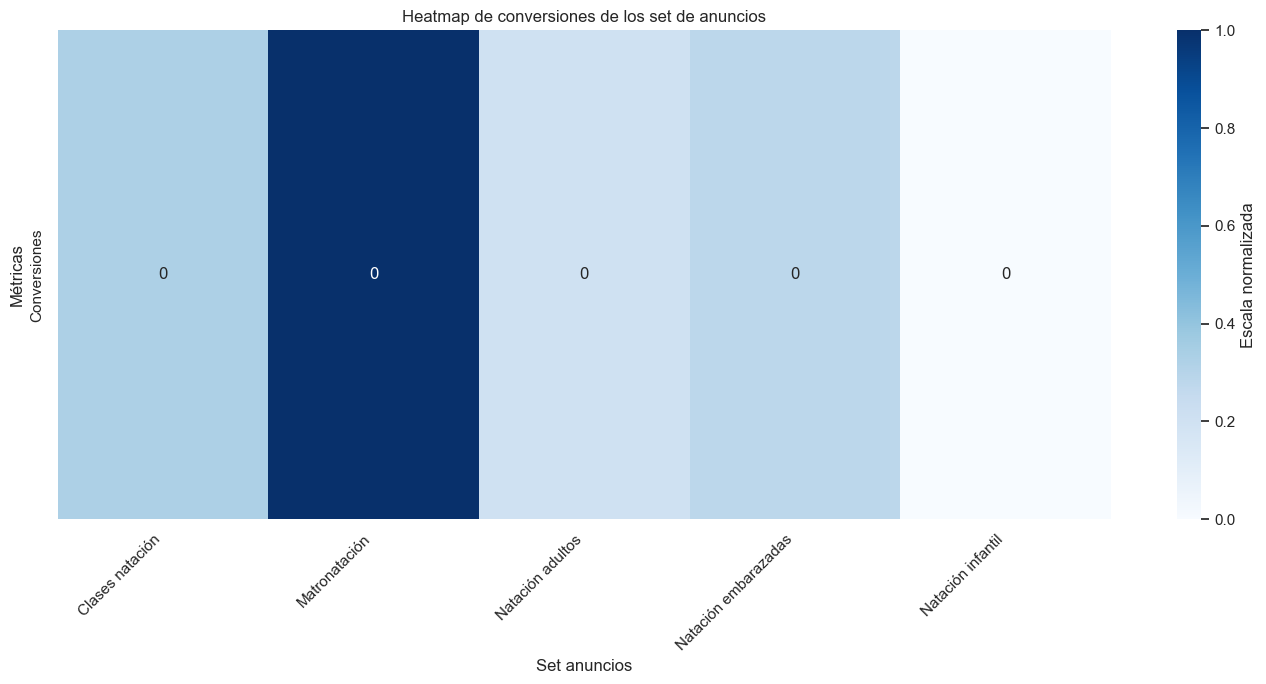

In [155]:
# Ensure only numeric data is used
google_ad_set_data = google_ad_set_conversion_aggregates.set_index('Set anuncios').select_dtypes(include='number')

# Normalize the data for better heatmap visualization
google_ad_set_data_normalized = google_ad_set_data.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Convert to numpy array and ensure float type
google_heatmap_ad_set_data = google_ad_set_data_normalized.T.values.astype(float)

# Prepare annotations
ad_set_annotations = google_ad_set_data.T.values.astype(int)

# Create the heatmap
plt.figure(figsize=(14, 7))
ax = sns.heatmap(google_heatmap_ad_set_data, 
                 annot=ad_set_annotations, 
                 cmap='Blues', 
                 fmt='d', 
                 cbar_kws={'label': 'Escala normalizada'},
                 xticklabels=google_ad_set_data_normalized.index,
                 yticklabels=google_ad_set_data_normalized.columns)

plt.title('Heatmap de conversiones de los set de anuncios')
plt.xlabel('Set anuncios')
plt.ylabel('Métricas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Análisis de Conversiones por Set de Anuncios:

Matronatación:
- Líder indiscutible con 33 conversiones
- Representa ~52% del total de conversiones
- Confirma excelente rendimiento vista en engagement
- Mejor ratio conversión/impresión del conjunto

Clases natación:
- Segundo mejor rendimiento (11.5 conversiones)
- Buen equilibrio entre volumen y conversiones
- Ratio de conversión moderado considerando su alto engagement

Segmentos específicos:
- Natación embarazadas: 10 conversiones, buen rendimiento para su nicho
- Natación adultos: 7.5 conversiones, rendimiento medio
- Natación infantil: Solo 1 conversión, preocupantemente bajo

Información clave:
- Clara dominancia de servicios para embarazadas/matronatación
- Gran disparidad entre el que tiene mejor y peor rendimiento (33 vs. 1)
- Servicios específicos superan a clases generales excepto infantil

Recomendaciones:
- Investigar urgentemente causas del bajo rendimiento en natación infantil
- Replicar estrategia de Matronatación en otros segmentos
- Potenciar Clases natación que muestra potencial de crecimiento

***

## Campañas en Meta

### Introducción al Análisis de Meta (Facebook e Instagram)

El presente análisis de Meta Ads para la Escuela de Natación Chapoteos representa un estudio detallado y multidimensional del rendimiento digital en las plataformas de Facebook e Instagram, proporcionando una visión estratégica de las acciones de marketing.

#### Estructura del Análisis

El estudio se compone de cuatro componentes fundamentales, cada uno ofreciendo información específica sobre el comportamiento de las campañas:

1. **Análisis de Costes**
   - Desglose de costes por:
     * Campañas
     * Conjuntos de anuncios (Sets de anuncios)
     * Anuncios individuales
     * Plataformas (Facebook, Instagram, Audience Network, Messenger)
   - Evaluación de la eficiencia económica
   - Comparativa de inversión entre diferentes estrategias

2. **Awareness (Reconocimiento de Marca)**
   - Métricas de visibilidad por:
     * Campañas
     * Conjuntos de anuncios
     * Anuncios individuales
     * Plataformas
   - Análisis comparativo de:
     * Alcance
     * Impresiones
     * Relación coste-impacto
   - Evaluación del potencial de exposición de marca

3. **Engagement**
   - Análisis de interacción por:
     * Campañas
     * Conjuntos de anuncios
     * Anuncios individuales
     * Plataformas
   - Heatmap de engagement por campaña, set de anuncios, anuncios y plataformas
     * Vistas
     * Clics
     * Engagement en página
     * Visitas a perfil de IG
   - Evaluación de la capacidad de generar interés y participación

4. **Conversión**
   - Análisis de resultados por:
     * Campañas
     * Conjuntos de anuncios
     * Anuncios individuales
     * Plataformas
   - Heatmap de conversión por campaña, set de anuncios, anuncios y plataformas
     * Leads generados
     * Leads de sitio web
     * Leads de Meta
     * Ventas
     * Clics en link
     * Follows o likes
     * Recuerdo de anuncio estimado
   - Identificación de puntos críticos de conversión

### Objetivo del Análisis

Los propósitos fundamentales de este estudio son:

- Comprender el rendimiento detallado de las campañas en Meta
- Identificar estrategias de marketing más efectivas
- Optimizar la inversión publicitaria
- Mejorar la eficacia de futuras campañas

### Consideraciones Importantes

- Datos extraídos directamente de plataformas oficiales
- Aplicación de filtros de calidad para garantizar integridad

##### 1. CAMPAÑAS | SET DE ANUNCIOS | ANUNCIOS | PLATAFORMAS

In [156]:
# Load the data
raw_data = pd.read_csv(
    '/Users/cesarchaparro/Desktop/GitHub/Chapoteos/analytics_data/analytics/primer_proyecto/raw_data.csv',
    encoding='utf-8'
)

# Rename columns
raw_data = raw_data.rename(columns={
    'Campaign name': 'Campaña',
    'Ad Set Name': 'Set anuncios',
    'Ad name': 'Anuncio',
    'Day': 'Fecha',
    'Result type': 'Tipo de resultado',
    'Results': 'Resultados',
    'Reach': 'Alcance',
    'Platform': 'Plataforma',
    'Impressions': 'Impresiones',
    'Amount spent (EUR)': 'Coste',
    'Link clicks': 'Clics en link',
    'Views': 'Vistas',
    'Clicks (all)': 'Clics (todos)',
    'Page engagement': 'Engagement en página',
    'Follows or likes': 'Follows o likes',
    'Instagram profile visits': 'Visitas a perfil IG',
    'Leads': 'Leads',
    'Website leads': 'Leads de sitio web',
    'Objective': 'Objetivo',
    'Estimated ad recall lift (people)': 'Recuerdo anuncio estimado',
    'Website purchases conversion value': 'Ventas',
    'Meta Leads': 'Meta leads'
})

# Define mappings
campaign_mapping = {
    'MONTECLARO': 'Monteclaro',
    'Nueva campaña de Ventas san valentin': 'San_valentin',
    'Nueva campaña de Clientes potenciales instagram..': 'Clientes_potenciales_ig',
    'matronatacion agosto conversion': 'Matronatacion_agosto',
    'Reconocimiento de la marca - Copia': 'Reconocimiento_marca',
    'aipap reconocimiento de la marca - Copia': 'Aipap_reconocimiento_marca',
    'AIPAP conversión - (anuncio)': 'Aipap_anuncio',
    'promoción post  Chapoteos 1 Febrero': 'Post_chapoteos_1_febrero',
    'Redes': 'Redes',
    'Redes seguidores': 'Redes_seguidores',
    'matronatacion conversion': 'Matronatacion_conversion',
    'EMBARAZADAS conversión - (anuncio)': 'Embarazadas_anuncio',
    'promoción post  Chapoteos': 'Post_chapoteos',
    'Nueva campaña de Ventas': 'Campaña_ventas',
    'NUEVO CENTRO MONTECLARO': 'Nuevo_centro_monteclaro',
    'clientes poteciales reel de centro clase de prueba': 'Clientes_potenciales_reel',
    'campaña centro villalkor': 'Centro_villalkor'
}

tipo_resultado_mapping = {
    'Website leads': 'Leads de sitio web',
    'Follows or likes': 'Follows o likes',
    'Estimated ad recall lift (people)': 'Recuerdo anuncio estimado',
    'Link clicks': 'Clics en link',
    'Website purchases': 'Compras en sitio web',
    'Meta Leads': 'Meta leads'
}

objetivo_mapping = {
    'OUTCOME_LEADS': 'Leads',
    'OUTCOME_ENGAGEMENT': 'Engagement',
    'OUTCOME_AWARENESS': 'Conciencia',
    'LINK_CLICKS': 'Clics en link',
    'OUTCOME_SALES': 'Ventas'
}

set_anuncios_mapping = {
    'promoción Chapoteos 4 octubre': 'Chapoteos_4_oct',
    'Promoción de Natacion bebes Chapoteos': 'Natacion_bebes_chapoteos',
    'Nuevo conjunto de anuncios de Clientes potenciales': 'Clientes_potenciales',
    'AIPAP Reconocimiento de marca': 'Aipap_reconocimiento_marca',
    'Reconocimiento de la marca': 'Reconocimiento_marca',
    'matro intereses conversión': 'Matro_intereses_conversion',
    'Nuevo conjunto de anuncios de Ventas': 'Ventas',
    'Aipap conversión': 'Aipap_conversion',
}

ad_name_mapping = {
    'video matro': 'Video_matro',
    'promocionar chapoteos 29 nove': 'Chapoteos_29_nov',
    'imagen julio 2024- Copia': 'Copia_imagen_julio_24',
    'promocionar chapoteos - Copia': 'Copia_chapoteos',
    '[14/03/2022] Promoción de Natacion bebes Chapoteos': 'Natacion_bebes_chapoteos',
    'Nuevo anuncio de Clientes potenciales': 'Clientes_potenciales',
    'Nuevo anuncio de Clientes potenciales - Copia': 'Copia_clientes_potenciales',
    'ANUNCIO NUEVO CENTRO MONTECLARO': 'Nuevo_monteclaro',
    'Reconocimiento de marca AIPAP': 'Reconocimiento_marca_aipap',
    'Reconocimiento de la marca': 'Reconocimiento_marca',
    'Nuevo anuncio de Ventas': 'Ventas',
    'video villalkor': 'Video_villalkor',
    'Nuevo anuncio de Clientes potenciales reel': 'Reel_clientes_potenciales'
}

# Apply mappings
raw_data['Campaña'] = raw_data['Campaña'].replace(campaign_mapping)
raw_data['Tipo de resultado'] = raw_data['Tipo de resultado'].replace(tipo_resultado_mapping)
raw_data['Objetivo'] = raw_data['Objetivo'].replace(objetivo_mapping)
raw_data['Set anuncios'] = raw_data['Set anuncios'].replace(set_anuncios_mapping)
raw_data['Anuncio'] = raw_data['Anuncio'].replace(ad_name_mapping)

# Convert 'Fecha' to datetime
raw_data['Fecha'] = pd.to_datetime(raw_data['Fecha'], errors='coerce')

# Convert specified columns to integers
columns_to_convert = [
    'Resultados', 
    'Clics en link', 
    'Engagement en página', 
    'Follows o likes', 
    'Leads', 
    'Leads de sitio web'
]

for column in columns_to_convert:
    raw_data[column] = pd.to_numeric(raw_data[column], errors='coerce').astype('Int64')

# Fill NaN values with 0 for specified columns
columns_to_fill = [
    'Clics en link', 
    'Engagement en página', 
    'Follows o likes', 
    'Leads', 
    'Leads de sitio web'
]

raw_data[columns_to_fill] = raw_data[columns_to_fill].fillna(0)

# Define a function to calculate the 'Resultados' value based on 'Objetivo'
def calculate_resultados(row):
    if pd.isna(row['Resultados']):
        if row['Objetivo'] == 'Leads':
            return int(row[['Leads', 'Leads de sitio web', 'Meta leads']].sum())
        elif row['Objetivo'] == 'Conciencia':
            return int(row[['Alcance', 'Impresiones', 'Recuerdo anuncio estimado']].sum())
        elif row['Objetivo'] == 'Engagement':
            return int(row[['Vistas', 'Clics (todos)', 'Follows o likes', 'Visitas a perfil IG']].sum())
        elif row['Objetivo'] == 'Clics en link':
            return int(row[['Clics en link']].sum())
        elif row['Objetivo'] == 'Compras en sitio web':
            return int(row[['Ventas']].sum())
    return row['Resultados']

# Apply the function to each row in the DataFrame
raw_data['Resultados'] = raw_data.apply(calculate_resultados, axis=1)

# Fill NaN values with 0.0 in 'Ventas' and format to two decimal places
raw_data['Ventas'] = raw_data['Ventas'].fillna(0.0).map(lambda x: f"{x:.2f}").astype(float)

# Fill 'Resultados' with 'Ventas' values where 'Objetivo' is 'Ventas'
raw_data.loc[raw_data['Objetivo'] == 'Ventas', 'Resultados'] = raw_data['Ventas']

# Fill NaN values with 0 in 'Meta leads' and convert to integer
raw_data['Meta leads'] = raw_data['Meta leads'].fillna(0).astype(int)

raw_data.to_csv('/Users/cesarchaparro/Desktop/GitHub/Chapoteos/analytics_data/analytics/primer_proyecto/raw_data.csv', index=False)

# Display the DataFrame
raw_data.head()

Fecha         Campaña     Set anuncios           Anuncio Plataforma  \
0 2025-02-11  Post_chapoteos  Chapoteos_4_oct   Copia_chapoteos  instagram   
1 2025-02-13  Post_chapoteos  Chapoteos_4_oct  Chapoteos_29_nov  messenger   
2 2025-02-03  Post_chapoteos  Chapoteos_4_oct  Chapoteos_29_nov  instagram   
3 2025-02-03  Post_chapoteos  Chapoteos_4_oct  Chapoteos_29_nov   facebook   
4 2025-02-14  Post_chapoteos  Chapoteos_4_oct   Copia_chapoteos   facebook   

        Objetivo Tipo de resultado  Resultados  Coste  Alcance  ...  \
0  Clics en link     Clics en link           0   0.02       14  ...   
1  Clics en link     Clics en link           0   0.00        2  ...   
2  Clics en link     Clics en link           7   0.33       76  ...   
3  Clics en link     Clics en link          44   3.85     4655  ...   
4  Clics en link     Clics en link           6   0.94      844  ...   

   Clics en link  Vistas  Clics (todos)  Engagement en página  \
0              0      14              0                     0   
1              0       2              0                     0   
2              7      76              7                     9   
3             44    4810            108                    46   
4              6     873              7                     6   

   Follows o likes  Visitas a perfil IG  Leads  Leads de sitio web  \
0                0                    0      0                   0   
1                0                    0      0                   0   
2                0                    0      0                   0   
3                0                    0      0                   0   
4                0                    0      0                   0   

   Meta leads  Ventas  
0           0     0.0  
1           0     0.0  
2           0     0.0  
3           0     0.0  
4           0     0.0  

[5 rows x 22 columns]

In [157]:
campaign_objectives = raw_data.groupby('Campaña')['Objetivo'].unique().reset_index()

# Display the result
print(campaign_objectives)

                       Campaña         Objetivo
0   Aipap_reconocimiento_marca     [Conciencia]
1               Campaña_ventas         [Ventas]
2             Centro_villalkor          [Leads]
3      Clientes_potenciales_ig          [Leads]
4    Clientes_potenciales_reel          [Leads]
5          Embarazadas_anuncio          [Leads]
6     Matronatacion_conversion          [Leads]
7                   Monteclaro          [Leads]
8      Nuevo_centro_monteclaro          [Leads]
9               Post_chapoteos  [Clics en link]
10        Reconocimiento_marca     [Conciencia]
11            Redes_seguidores     [Engagement]


##### 1.1 COSTE DE LAS CAMPAÑAS | SET DE ANUNCIOS | ANUNCIOS | PLATAFORMAS

In [158]:
# Group by the 'Campaign' column and sum the 'Coste' column
total_costs_per_campaign = raw_data.groupby('Campaña')['Coste'].sum().reset_index()

# Rename the columns for clarity
total_costs_per_campaign.columns = ['Campaña', 'Coste total']

# Calculate the total cost
campaigns_total_cost = raw_data['Coste'].sum()

# Display the result
print(total_costs_per_campaign)
# Print the total cost with two decimal places
print(f'Coste total para todas las campañas: {campaigns_total_cost:.2f}')

                       Campaña  Coste total
0   Aipap_reconocimiento_marca        78.15
1               Campaña_ventas       112.37
2             Centro_villalkor        14.91
3      Clientes_potenciales_ig       265.84
4    Clientes_potenciales_reel        57.13
5          Embarazadas_anuncio       181.39
6     Matronatacion_conversion       511.97
7                   Monteclaro       113.99
8      Nuevo_centro_monteclaro       263.03
9               Post_chapoteos       121.67
10        Reconocimiento_marca       182.10
11            Redes_seguidores       181.53
Coste total para todas las campañas: 2084.08


In [159]:
# Group by the 'Set de anuncios' column and sum the 'Coste' column
total_costs_per_ad_set = raw_data.groupby('Set anuncios')['Coste'].sum().reset_index()

# Rename the columns for clarity
total_costs_per_ad_set.columns = ['Set anuncios', 'Coste total']

# Calculate the total cost
ad_sets_total_cost = raw_data['Coste'].sum()

# Display the result
print(total_costs_per_ad_set)
# Print the total cost with two decimal places
print(f'Coste total para todos los sets de anuncios: {ad_sets_total_cost:.2f}')

                 Set anuncios  Coste total
0            Aipap_conversion       181.39
1  Aipap_reconocimiento_marca        78.15
2             Chapoteos_4_oct       121.67
3        Clientes_potenciales       714.90
4  Matro_intereses_conversion       511.97
5    Natacion_bebes_chapoteos       181.53
6        Reconocimiento_marca       182.10
7                      Ventas       112.37
Coste total para todos los sets de anuncios: 2084.08


In [160]:
# Group by the 'Campaign' column and sum the 'Coste' column
total_costs_per_ad = raw_data.groupby('Anuncio')['Coste'].sum().reset_index()

# Rename the columns for clarity
total_costs_per_ad.columns = ['Anuncio', 'Coste total']

# Calculate the total cost
ads_total_cost = raw_data['Coste'].sum()

# Display the result
print(total_costs_per_ad)
# Print the total cost with two decimal places
print(f'Coste total para todos los anuncios: {ads_total_cost:.2f}')

                       Anuncio  Coste total
0             Chapoteos_29_nov        92.28
1         Clientes_potenciales       184.76
2              Copia_chapoteos        29.39
3   Copia_clientes_potenciales       196.16
4        Copia_imagen_julio_24       181.39
5     Natacion_bebes_chapoteos       181.53
6             Nuevo_monteclaro       263.03
7         Reconocimiento_marca       182.10
8   Reconocimiento_marca_aipap        78.15
9    Reel_clientes_potenciales        57.13
10                      Ventas       112.37
11                 Video_matro       511.97
12             Video_villalkor        13.82
Coste total para todos los anuncios: 2084.08


In [161]:
# Group by the 'Platform' column and sum the 'Coste' column
total_costs_per_platform = raw_data.groupby('Plataforma')['Coste'].sum().reset_index()

# Rename the columns for clarity
total_costs_per_platform.columns = ['Plataforma', 'Coste total']

# Round the 'Coste total' column to 2 decimal places
total_costs_per_platform['Coste total'] = total_costs_per_platform['Coste total'].round(2)

# Calculate the total cost and round to 2 decimal places
platform_total_cost = round(raw_data['Coste'].sum(), 2)

# Display the result
print(total_costs_per_platform)
# Print the total cost with two decimal places
print(f'Coste total para todas las plataformas: {platform_total_cost:.2f}')

         Plataforma  Coste total
0  audience_network         6.15
1          facebook       714.40
2         instagram      1363.52
3         messenger         0.01
Coste total para todas las plataformas: 2084.08


Análisis de Costes Meta:

Campañas:
- Matronatación_conversion lidera inversión (512€, 24.6% del total)
- Cluster de campañas medias (180-265€): Clientes_potenciales_ig, Nuevo_centro_monteclaro, Embarazadas_anuncio
- Campañas menores (<100€): Centro_villalkor, Clientes_potenciales_reel, Aipap
- Inversión total: 2,084€ distribuida en 12 campañas

Sets de Anuncios:
- Clientes_potenciales domina (715€, 34.3%)
- Matro_intereses_conversion segundo mayor (512€)
- Distribución polarizada: 2 sets principales consumen 59% del presupuesto
- Resto de sets entre 78-182€

Anuncios:
- Video_matro principal inversión (512€)
- Cluster medio (180-263€): Nuevo_monteclaro, Clientes_potenciales, Reconocimiento
- Menor inversión: Video_villalkor (14€), Copia_chapoteos (29€)
- Clara preferencia por formatos video en inversión alta

Plataformas:
- Instagram principal canal (1,364€, 65.4%)
- Facebook segundo (714€, 34.3%)
- Audience Network y Messenger marginales (<1%)
- Estrategia claramente enfocada en Instagram+Facebook

***

##### 2. AWARENESS

##### * Alcance: número de usuarios únicos que han visto tu contenido.
##### * Impresiones: número de veces que tus anuncios se mostraron en la pantalla (no vistos necesariamente por el usuario).

In [162]:
# Aggregate metrics for each Campaign
campaign_awareness_aggregates = raw_data.groupby('Campaña').agg({
    'Coste': 'sum',
    'Alcance': 'sum',
    'Impresiones': 'sum',
}).reset_index()

# Aggregate metrics for each Ad set
ad_set_awareness_aggregates = raw_data.groupby('Set anuncios').agg({
    'Coste': 'sum',
    'Alcance': 'sum',
    'Impresiones': 'sum',
}).reset_index()

# Aggregate metrics for each Ad
ad_awareness_aggregates = raw_data.groupby('Anuncio').agg({
    'Coste': 'sum',
    'Alcance': 'sum',
    'Impresiones': 'sum',
}).reset_index()

# Aggregate metrics for each Platform
platform_awareness_aggregates = raw_data.groupby('Plataforma').agg({
    'Coste': 'sum',
    'Alcance': 'sum',
    'Impresiones': 'sum',
}).reset_index()
# Format the 'Coste' column to have two decimal places
platform_awareness_aggregates['Coste'] = platform_awareness_aggregates['Coste'].round(2)

##### 2.1 AWARENESS CAMPAÑAS

In [163]:
campaign_awareness_aggregates

Campaña   Coste  Alcance  Impresiones
0   Aipap_reconocimiento_marca   78.15   146802       168842
1               Campaña_ventas  112.37    24271        26280
2             Centro_villalkor   14.91     1962         2502
3      Clientes_potenciales_ig  265.84    39960        41289
4    Clientes_potenciales_reel   57.13    17233        18042
5          Embarazadas_anuncio  181.39    51772        54334
6     Matronatacion_conversion  511.97   153523       157714
7                   Monteclaro  113.99    28957        31136
8      Nuevo_centro_monteclaro  263.03    48743        53088
9               Post_chapoteos  121.67   125613       151662
10        Reconocimiento_marca  182.10   415241       522125
11            Redes_seguidores  181.53   115672       135684

##### 2.2 GRÁFICA DE AWARENESS POR CAMPAÑA: ALCANCE E IMPRESIONES (CON COSTE)

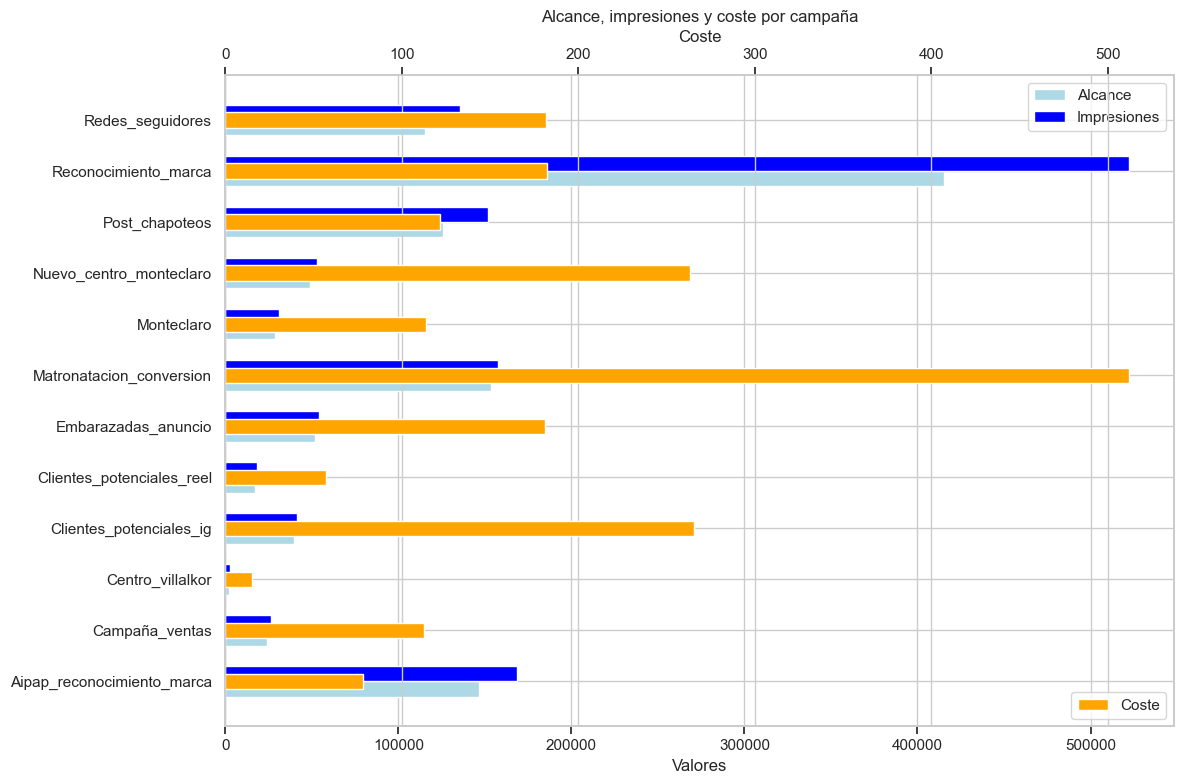

In [164]:
# Group the data by 'Campaña' and sum the 'Alcance', 'Impresiones', and 'Coste'
campaign_grouped_data = raw_data.groupby('Campaña')[['Alcance', 'Impresiones', 'Coste']].sum().reset_index()

# Set the positions and width for the bars
bar_width = 0.3
r1 = np.arange(len(campaign_grouped_data))
r2 = [x + bar_width for x in r1]

# Create the horizontal bar plot
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot Alcance and Impresiones
ax1.barh(r1, campaign_grouped_data['Alcance'], color='lightblue', height=bar_width, label='Alcance')
ax1.barh(r2, campaign_grouped_data['Impresiones'], color='blue', height=bar_width, label='Impresiones')

# Add labels and title
ax1.set_xlabel('Valores')
ax1.set_title('Alcance, impresiones y coste por campaña')
ax1.set_yticks([r + bar_width / 2 for r in range(len(campaign_grouped_data))])
ax1.set_yticklabels(campaign_grouped_data['Campaña'])

# Create a secondary axis for Coste
ax2 = ax1.twiny()
ax2.barh(r1 + bar_width / 2, campaign_grouped_data['Coste'], color='orange', height=bar_width, label='Coste')
ax2.set_xlabel('Coste')

# Add a legend
ax1.legend(loc='upper right')
ax2.legend(loc='lower right')

# Show the plot
plt.tight_layout()
plt.show()

Análisis de Alcance e Impresiones por Campaña:

Campañas de alto impacto:
- Reconocimiento_marca: Mejor rendimiento (415K alcance, 522K impresiones)
  * Excelente ratio coste/alcance (0.44€ por mil)
  * 26% frecuencia adicional (diferencia impresiones vs. alcance)

- Matronatacion_conversion: Mayor inversión (512€)
  * 153K alcance, 158K impresiones
  * Frecuencia muy controlada (solo 2.7% adicional)
  * Coste por mil alcance más alto (3.33€)

Campañas eficientes:
- Aipap_reconocimiento: 147K alcance con solo 78€
- Post_chapoteos: 126K alcance con 122€
- Redes_seguidores: 116K alcance con 182€

Oportunidades de mejora:
- Centro_villalkor: Alcance muy limitado (2K) 
- Clientes_potenciales_reel: Baja frecuencia pero coste elevado
- Campaña_ventas: Alcance modesto (24K) para inversión media

Información Clave:
1. Las campañas de reconocimiento muestran mejor eficiencia en costes
2. Mayor inversión no siempre significa mayor alcance
3. Frecuencia generalmente bien controlada (<30% adicional)

##### 2.3 AWARENESS POR SET DE ANUNCIOS

In [165]:
ad_set_awareness_aggregates

Set anuncios   Coste  Alcance  Impresiones
0            Aipap_conversion  181.39    51772        54334
1  Aipap_reconocimiento_marca   78.15   146802       168842
2             Chapoteos_4_oct  121.67   125613       151662
3        Clientes_potenciales  714.90   136855       146057
4  Matro_intereses_conversion  511.97   153523       157714
5    Natacion_bebes_chapoteos  181.53   115672       135684
6        Reconocimiento_marca  182.10   415241       522125
7                      Ventas  112.37    24271        26280

##### 2.4 GRÁFICA DE AWARENESS POR SET DE ANUNCIOS: ALCANCE E IMPRESIONES (CON COSTE)

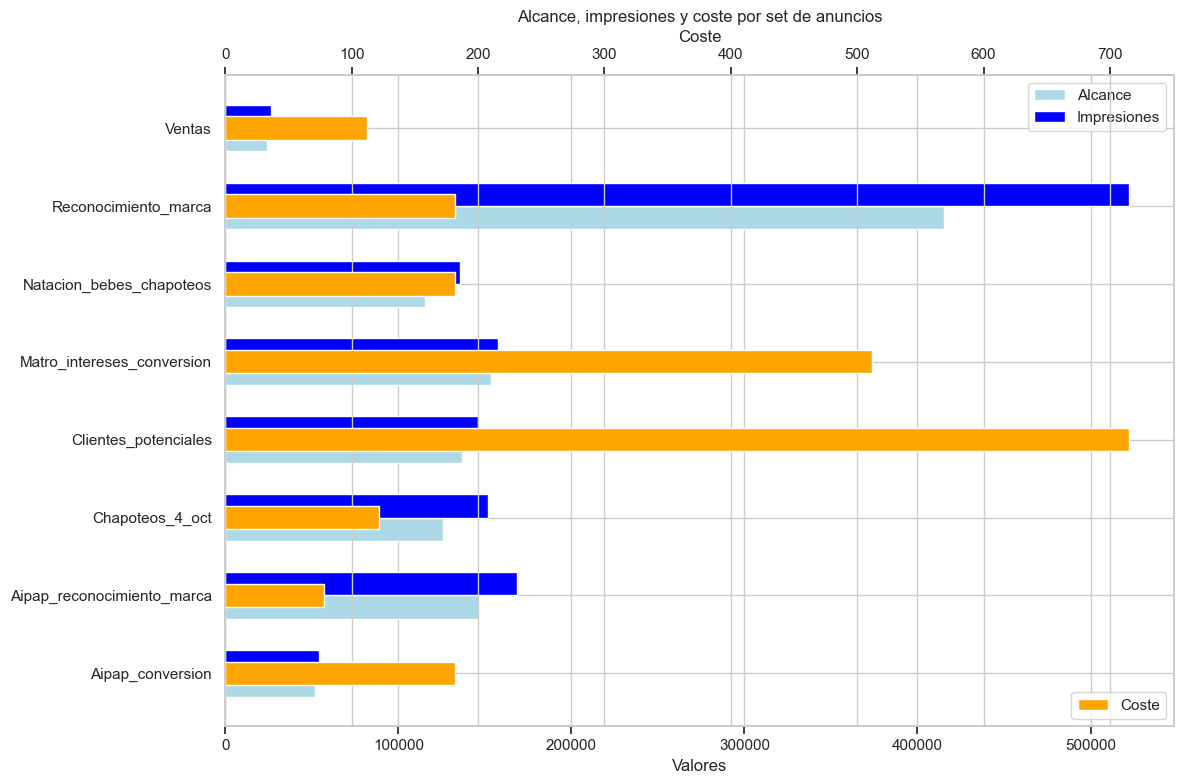

In [166]:
# Group the data by 'Ad set' and sum the 'Alcance', 'Impresiones', and 'Coste'
ad_set_grouped_data = raw_data.groupby('Set anuncios')[['Alcance', 'Impresiones', 'Coste']].sum().reset_index()

# Set the positions and width for the bars
bar_width = 0.3
r1 = np.arange(len(ad_set_grouped_data))
r2 = [x + bar_width for x in r1]

# Create the horizontal bar plot
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot Alcance and Impresiones
ax1.barh(r1, ad_set_grouped_data['Alcance'], color='lightblue', height=bar_width, label='Alcance')
ax1.barh(r2, ad_set_grouped_data['Impresiones'], color='blue', height=bar_width, label='Impresiones')

# Add labels and title
ax1.set_xlabel('Valores')
ax1.set_title('Alcance, impresiones y coste por set de anuncios')
ax1.set_yticks([r + bar_width / 2 for r in range(len(ad_set_grouped_data))])
ax1.set_yticklabels(ad_set_grouped_data['Set anuncios'])

# Create a secondary axis for Coste
ax2 = ax1.twiny()
ax2.barh(r1 + bar_width / 2, ad_set_grouped_data['Coste'], color='orange', height=bar_width, label='Coste')
ax2.set_xlabel('Coste')

# Add a legend
ax1.legend(loc='upper right')
ax2.legend(loc='lower right')

# Show the plot
plt.tight_layout()
plt.show()

Análisis de Alcance e Impresiones por Set de Anuncios:

Sets de alto rendimiento:
- Reconocimiento_marca
  * Mejor rendimiento: 415K alcance, 522K impresiones
  * Excelente eficiencia: 0.44€ por mil alcances
  * 25.7% frecuencia adicional

- Matro_intereses_conversion
  * 153K alcance con frecuencia muy controlada (2.7% adicional)
  * Inversión alta (512€) pero alcance efectivo
  * 3.33€ por mil alcances

Eficiencia media:
- Aipap_reconocimiento_marca
  * Buena eficiencia: 147K alcance con solo 78€
  * 0.53€ por mil alcances
  * 15% frecuencia adicional

Oportunidades de mejora:
- Clientes_potenciales
  * Mayor inversión (715€) pero alcance moderado (137K)
  * 5.22€ por mil alcances - menos eficiente
  * Necesita optimización de targeting

Recomendación: Replicar configuración de sets de reconocimiento en otros objetivos para mejorar eficiencia general.

##### 2.5 AWARENESS ANUNCIOS

In [167]:
ad_awareness_aggregates

Anuncio   Coste  Alcance  Impresiones
0             Chapoteos_29_nov   92.28    95359       115673
1         Clientes_potenciales  184.76    39545        42131
2              Copia_chapoteos   29.39    30254        35989
3   Copia_clientes_potenciales  196.16    29633        30589
4        Copia_imagen_julio_24  181.39    51772        54334
5     Natacion_bebes_chapoteos  181.53   115672       135684
6             Nuevo_monteclaro  263.03    48743        53088
7         Reconocimiento_marca  182.10   415241       522125
8   Reconocimiento_marca_aipap   78.15   146802       168842
9    Reel_clientes_potenciales   57.13    17233        18042
10                      Ventas  112.37    24271        26280
11                 Video_matro  511.97   153523       157714
12             Video_villalkor   13.82     1701         2207

##### 2.6 GRÁFICA DE AWARENESS POR ANUNCIO: ALCANCE E IMPRESIONES (CON COSTE)

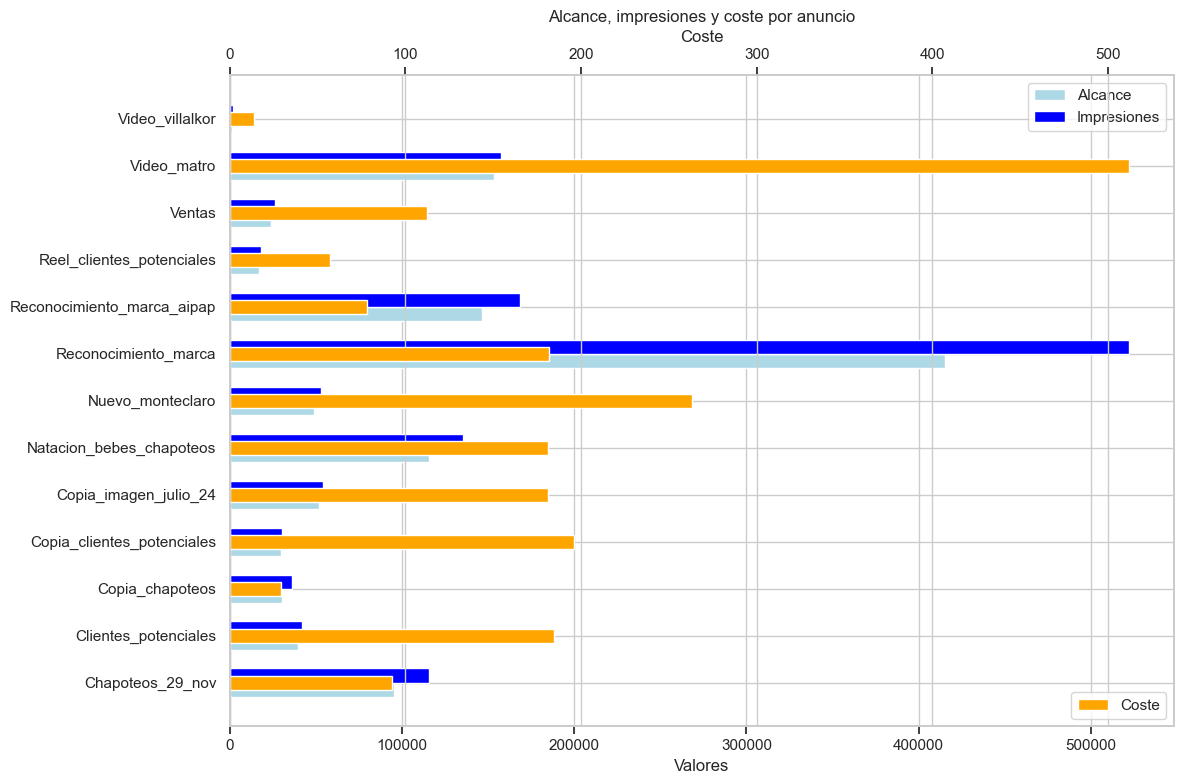

In [168]:
# Group the data by 'Ad' and sum the 'Alcance', 'Impresiones', and 'Coste'
ad_grouped_data = raw_data.groupby('Anuncio')[['Alcance', 'Impresiones', 'Coste']].sum().reset_index()

# Set the positions and width for the bars
bar_width = 0.3
r1 = np.arange(len(ad_grouped_data))
r2 = [x + bar_width for x in r1]

# Create the horizontal bar plot
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot Alcance and Impresiones
ax1.barh(r1, ad_grouped_data['Alcance'], color='lightblue', height=bar_width, label='Alcance')
ax1.barh(r2, ad_grouped_data['Impresiones'], color='blue', height=bar_width, label='Impresiones')

# Add labels and title
ax1.set_xlabel('Valores')
ax1.set_title('Alcance, impresiones y coste por anuncio')
ax1.set_yticks([r + bar_width / 2 for r in range(len(ad_grouped_data))])
ax1.set_yticklabels(ad_grouped_data['Anuncio'])

# Create a secondary axis for Coste
ax2 = ax1.twiny()
ax2.barh(r1 + bar_width / 2, ad_grouped_data['Coste'], color='orange', height=bar_width, label='Coste')
ax2.set_xlabel('Coste')

# Add a legend
ax1.legend(loc='upper right')
ax2.legend(loc='lower right')

# Show the plot
plt.tight_layout()
plt.show()

Análisis de Alcance e Impresiones por Anuncio:

Top en rendimiento:
- Reconocimiento_marca
  * Mejor ROI: 415K alcance con 182€
  * 0.44€ por mil alcances
  * Alta frecuencia efectiva (25.7% más impresiones)

- Video_matro
  * Mayor inversión (512€) con buen alcance (153K)
  * Frecuencia muy controlada (2.7% adicional)
  * 3.34€ por mil alcances

- Reconocimiento_marca_aipap
  * Eficiente: 147K alcance con solo 78€
  * 0.53€ por mil alcances
  * Buena optimización de frecuencia

Rendimiento Medio:
- Natacion_bebes_chapoteos
  * 116K alcance con 182€
  * 1.57€ por mil alcances
  * 17% frecuencia adicional

Bajo rendimiento:
- Video_villalkor
  * Alcance mínimo (1.7K) 
  * 8.12€ por mil alcances
- Reel_clientes_potenciales
  * Alcance limitado (17K) para 57€
  * 3.31€ por mil alcances

Recomendación: 
1. Escalar anuncios de reconocimiento
2. Revisar creatividades de bajo rendimiento
3. Optimizar frecuencia en anuncios de coste medio

##### 2.7 AWARENESS POR PLATAFORMA

In [169]:
platform_awareness_aggregates

Plataforma    Coste  Alcance  Impresiones
0  audience_network     6.15    12231        33006
1          facebook   714.40   825247       983041
2         instagram  1363.52   332210       346584
3         messenger     0.01       61           67

##### 2.8 GRÁFICA DE AWARENESS POR PLATAFORMA: ALCANCE E IMPRESIONES (CON COSTE)

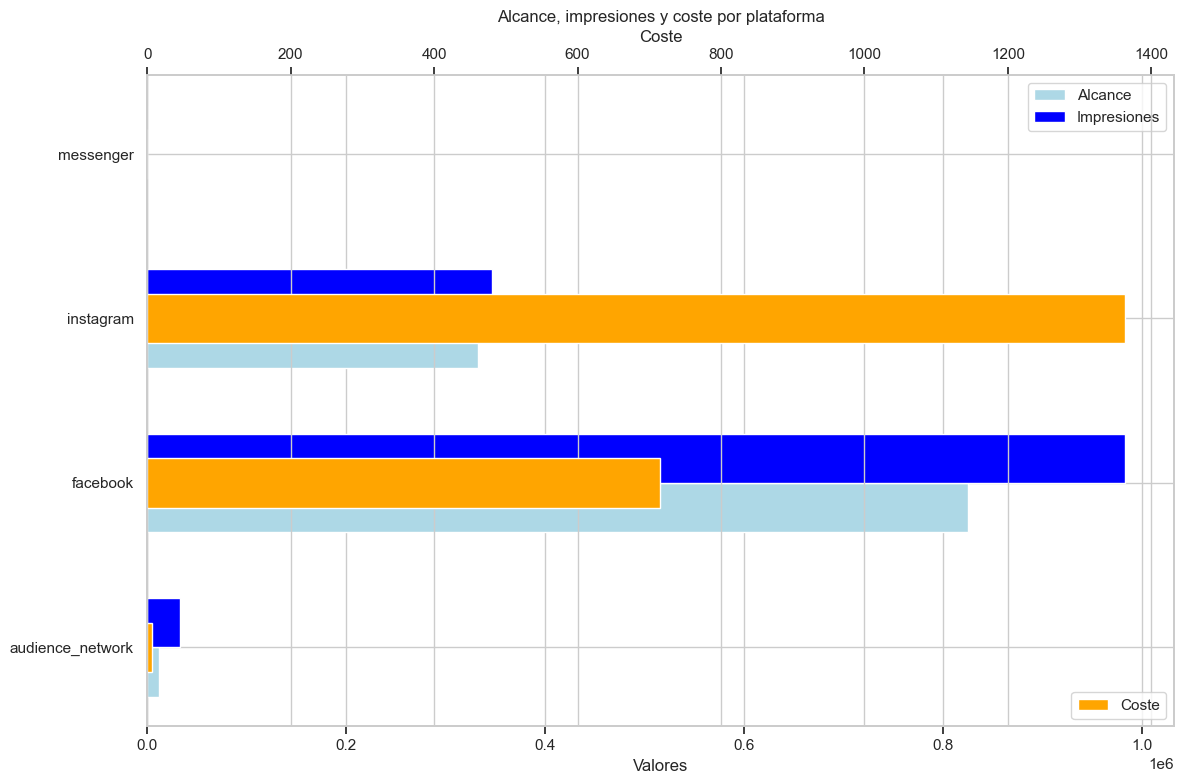

In [170]:
# Group the data by 'Platoform' and sum the 'Alcance', 'Impresiones', and 'Coste'
platform_grouped_data = raw_data.groupby('Plataforma')[['Alcance', 'Impresiones', 'Coste']].sum().reset_index()

# Set the positions and width for the bars
bar_width = 0.3
r1 = np.arange(len(platform_grouped_data))
r2 = [x + bar_width for x in r1]

# Create the horizontal bar plot
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot Alcance and Impresiones
ax1.barh(r1, platform_grouped_data['Alcance'], color='lightblue', height=bar_width, label='Alcance')
ax1.barh(r2, platform_grouped_data['Impresiones'], color='blue', height=bar_width, label='Impresiones')

# Add labels and title
ax1.set_xlabel('Valores')
ax1.set_title('Alcance, impresiones y coste por plataforma')
ax1.set_yticks([r + bar_width / 2 for r in range(len(platform_grouped_data))])
ax1.set_yticklabels(platform_grouped_data['Plataforma'])

# Create a secondary axis for Coste
ax2 = ax1.twiny()
ax2.barh(r1 + bar_width / 2, platform_grouped_data['Coste'], color='orange', height=bar_width, label='Coste')
ax2.set_xlabel('Coste')

# Add a legend
ax1.legend(loc='upper right')
ax2.legend(loc='lower right')

# Show the plot
plt.tight_layout()
plt.show()

Análisis de Alcance e Impresiones por Plataforma:

Facebook:
- Mayor alcance (825K usuarios)
- Segunda mayor inversión (714€)
- 0.87€ por mil alcances
- 19% frecuencia adicional
- Mejor equilibrio coste/alcance

Instagram:
- Mayor inversión (1,364€)
- Alcance moderado (332K)
- 4.10€ por mil alcances
- Frecuencia muy controlada (4.3% adicional)
- Menos eficiente en costes pero más preciso

Plataformas secundarias:
- Audience Network
  * Alcance limitado (12K)
  * Inversión mínima (6€)
  * Alta frecuencia (170% adicional)
  * 0.50€ por mil alcances

- Messenger
  * Presencia testimonial
  * Sin impacto significativo
  * Puede eliminarse del mix

Recomendaciones:
1. Mantener Facebook como plataforma principal
2. Optimizar costes en Instagram
3. Evaluar beneficio real de Audience Network
4. Eliminar Messenger del mix de medios

***

##### 3. ENGAGEMENT

##### * Vistas: número de veces que los anuncios se reprodujeron o mostraron
##### * Clics (todos): número de clics, toques o desplazamientos en tus anuncios
##### * Engagement en página: número de acciones realizadas en tu página de Facebook, perfil de Instagram o en cualquie contenido, atribuído a tus anuncios
##### * Visitas a perfil IG: número de veces que se visitó tu perfil de Instagram, atribuído a tu anuncio

In [171]:
# Aggregate metrics for each Campaign
campaign_engagement_aggregates = raw_data.groupby('Campaña').agg({
    'Vistas': 'sum',
    'Clics (todos)': 'sum',
    'Engagement en página': 'sum',
    'Visitas a perfil IG': 'sum',
    'Coste': 'sum'
}).reset_index()

# Aggregate metrics for each Ad set
ad_set_engagement_aggregates = raw_data.groupby('Set anuncios').agg({
    'Vistas': 'sum',
    'Clics (todos)': 'sum',
    'Engagement en página': 'sum',
    'Visitas a perfil IG': 'sum',
    'Coste': 'sum'
}).reset_index()

# Aggregate metrics for each Ad
ad_engagement_aggregates = raw_data.groupby('Anuncio').agg({
    'Vistas': 'sum',
    'Clics (todos)': 'sum',
    'Engagement en página': 'sum',
    'Visitas a perfil IG': 'sum',
    'Coste': 'sum'
}).reset_index()

# Aggregate metrics for each Platform
platform_engagement_aggregates = raw_data.groupby('Plataforma').agg({
    'Vistas': 'sum',
    'Clics (todos)': 'sum',
    'Engagement en página': 'sum',
    'Visitas a perfil IG': 'sum',
    'Coste': 'sum'
}).reset_index()

##### 3.1 ENGAGEMENT CAMPAÑAS

In [172]:
campaign_engagement_aggregates

Campaña  Vistas  Clics (todos)  Engagement en página  \
0   Aipap_reconocimiento_marca  162919            350                 12783   
1               Campaña_ventas   31845           1163                  6599   
2             Centro_villalkor    2508             55                   628   
3      Clientes_potenciales_ig   43778           1194                  8062   
4    Clientes_potenciales_reel   18838            327                  3237   
5          Embarazadas_anuncio   59043           1053                 13340   
6     Matronatacion_conversion  173765           3901                 39460   
7                   Monteclaro   32632            476                  5214   
8      Nuevo_centro_monteclaro   53772           1064                 12667   
9               Post_chapoteos  118908           2389                  1419   
10        Reconocimiento_marca  522326           1406                  1201   
11            Redes_seguidores  135881           1318                   804   

    Visitas a perfil IG   Coste  
0                    17   78.15  
1                   658  112.37  
2                    16   14.91  
3                   709  265.84  
4                    90   57.13  
5                   266  181.39  
6                  1110  511.97  
7                   134  113.99  
8                   275  263.03  
9                     8  121.67  
10                    5  182.10  
11                    0  181.53

##### 3.2 HEATMAP DE ENGAGEMENT POR CAMPAÑA: VISTAS, CLICS, ENGAGEMENT PÁGINA, VISITAS PERFIL IG

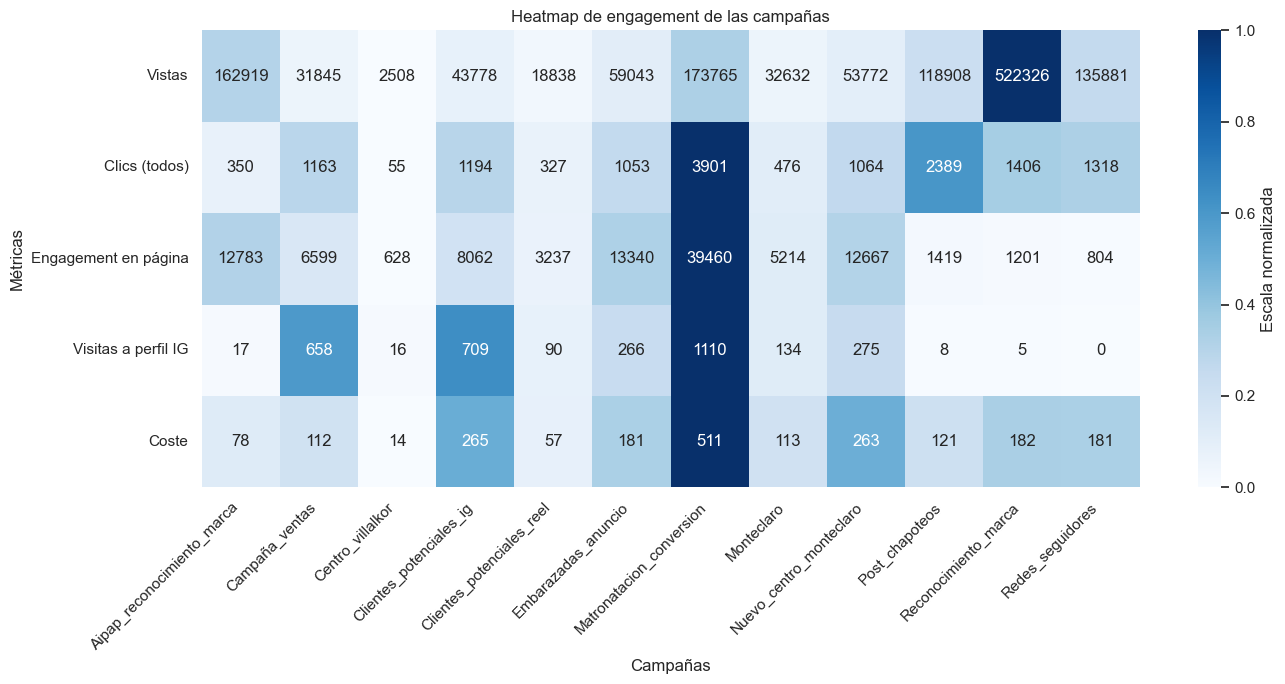

In [173]:
# Ensure only numeric data is used
campaign_data = campaign_engagement_aggregates.set_index('Campaña').select_dtypes(include='number')

# Normalize the data for better heatmap visualization
campaign_data_normalized = campaign_data.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Convert to numpy array and ensure float type
heatmap_data = campaign_data_normalized.T.values.astype(float)

# Prepare annotations
annotations = campaign_data.T.values.astype(int)

# Create the heatmap
plt.figure(figsize=(14, 7))
ax = sns.heatmap(heatmap_data, 
                 annot=annotations, 
                 cmap='Blues', 
                 fmt='d', 
                 cbar_kws={'label': 'Escala normalizada'},
                 xticklabels=campaign_data_normalized.index,
                 yticklabels=campaign_data_normalized.columns)

plt.title('Heatmap de engagement de las campañas')
plt.xlabel('Campañas')
plt.ylabel('Métricas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Análisis de Engagement por Campaña:

Top en rendimiento:
- Reconocimiento_marca
  * Mayor número de vistas (522K)
  * 1,406 clics totales
  * Coste eficiente: 0.35€ por mil vistas
  * Bajo engagement en página (1,201) - coherente con objetivo

- Matronatacion_conversion
  * Mejor engagement global
  * 3,901 clics (máximo)
  * 39,460 interacciones en página
  * 1,110 visitas a perfil IG
  * Mayor inversión pero justificada por resultados

Rendimiento Notable:
- Post_chapoteos
  * 118K vistas
  * 2,389 clics
  * Excelente CTR (2%)
  * Coste eficiente (121€)

Oportunidades de Mejora:
- Centro_villalkor
  * Métricas bajas en todas las categorías
  * Solo 55 clics y 628 interacciones
  * Inversión mínima (15€)

- Redes_seguidores
  * 0 visitas a perfil IG pese al objetivo
  * 135K vistas pero bajo engagement
  * Necesita revisión de estrategia

Recomendaciones:
1. Escalar presupuesto en campañas de alto rendimiento
2. Revisar estrategia de contenido en campañas de bajo engagement
3. Optimizar objetivos según comportamiento observado

##### 3.3 ENGAGEMENT POR SET DE ANUNCIOS

In [174]:
ad_set_engagement_aggregates

Set anuncios  Vistas  Clics (todos)  Engagement en página  \
0            Aipap_conversion   59043           1053                 13340   
1  Aipap_reconocimiento_marca  162919            350                 12783   
2             Chapoteos_4_oct  118908           2389                  1419   
3        Clientes_potenciales  151528           3116                 29808   
4  Matro_intereses_conversion  173765           3901                 39460   
5    Natacion_bebes_chapoteos  135881           1318                   804   
6        Reconocimiento_marca  522326           1406                  1201   
7                      Ventas   31845           1163                  6599   

   Visitas a perfil IG   Coste  
0                  266  181.39  
1                   17   78.15  
2                    8  121.67  
3                 1224  714.90  
4                 1110  511.97  
5                    0  181.53  
6                    5  182.10  
7                  658  112.37

##### 3.4 HEATMAP DE ENGAGEMENT POR SET DE ANUNCIOS: VISTAS, CLICS, ENGAGEMENT PÁGINA, VISITAS PERFIL IG

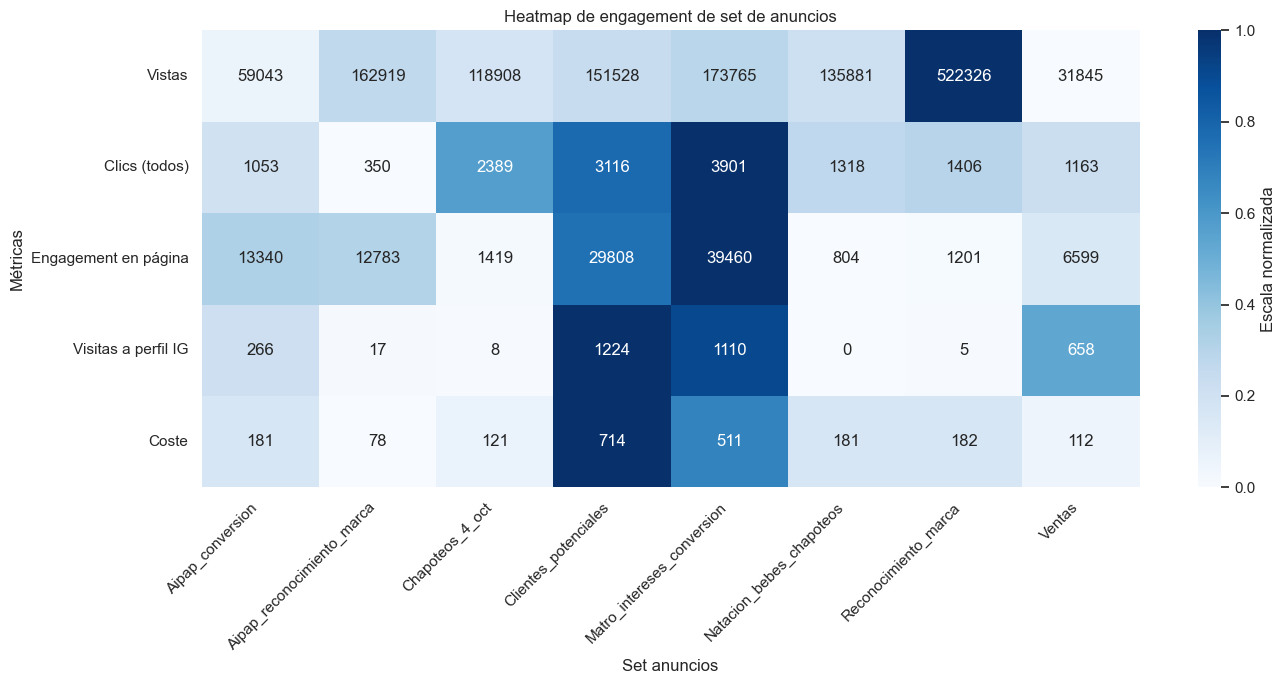

In [175]:
# Ensure only numeric data is used
ad_set_data = ad_set_engagement_aggregates.set_index('Set anuncios').select_dtypes(include='number')

# Normalize the data for better heatmap visualization
ad_set_data_normalized = ad_set_data.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Convert to numpy array and ensure float type
heatmap_ad_set_data = ad_set_data_normalized.T.values.astype(float)

# Prepare annotations
ad_set_annotations = ad_set_data.T.values.astype(int)

# Create the heatmap
plt.figure(figsize=(14, 7))
ax = sns.heatmap(heatmap_ad_set_data, 
                 annot=ad_set_annotations, 
                 cmap='Blues', 
                 fmt='d', 
                 cbar_kws={'label': 'Escala normalizada'},
                 xticklabels=ad_set_data_normalized.index,
                 yticklabels=ad_set_data_normalized.columns)

plt.title('Heatmap de engagement de set de anuncios')
plt.xlabel('Set anuncios')
plt.ylabel('Métricas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Análisis de Engagement por Set de Anuncios:

Sets de alto rendimiento:
- Reconocimiento_marca
  * Líder en vistas (522K)
  * ROI excepcional: 0.35€ por mil vistas
  * 1,406 clics con inversión moderada (182€)
  * Cumple objetivo de awareness

- Matro_intereses_conversion
  * Mejor balance de métricas
  * 3,901 clics (máximo)
  * 39,460 engagement en página
  * 1,110 visitas a perfil IG
  * Coste justificado (512€)

Performance Media:
- Clientes_potenciales
  * Buenos números absolutos
  * Mayor inversión (715€)
  * 3,116 clics y 1,224 visitas IG
  * Coste por resultado elevado

Sets para Optimizar:
- Natacion_bebes_chapoteos
  * 135K vistas pero engagement bajo
  * 0 visitas a perfil IG
  * 181€ con retorno cuestionable

- Ventas
  * Menor alcance (31K vistas)
  * Buen engagement relativo
  * 658 visitas IG con inversión modesta

Recomendaciones:
1. Replicar configuración de Matro_intereses
2. Revisar targeting en sets de bajo engagement
3. Optimizar presupuesto según objetivos específicos

##### 3.5 ENGAGEMENT POR ANUNCIO

In [176]:
ad_engagement_aggregates

Anuncio  Vistas  Clics (todos)  Engagement en página  \
0             Chapoteos_29_nov   90757           1801                  1067   
1         Clientes_potenciales   43634            722                  5356   
2              Copia_chapoteos   28151            588                   352   
3   Copia_clientes_potenciales   33071            952                  7923   
4        Copia_imagen_julio_24   59043           1053                 13340   
5     Natacion_bebes_chapoteos  135881           1318                   804   
6             Nuevo_monteclaro   53772           1064                 12667   
7         Reconocimiento_marca  522326           1406                  1201   
8   Reconocimiento_marca_aipap  162919            350                 12783   
9    Reel_clientes_potenciales   18838            327                  3237   
10                      Ventas   31845           1163                  6599   
11                 Video_matro  173765           3901                 39460   
12             Video_villalkor    2213             51                   625   

    Visitas a perfil IG   Coste  
0                     6   92.28  
1                   326  184.76  
2                     2   29.39  
3                   518  196.16  
4                   266  181.39  
5                     0  181.53  
6                   275  263.03  
7                     5  182.10  
8                    17   78.15  
9                    90   57.13  
10                  658  112.37  
11                 1110  511.97  
12                   15   13.82

##### 3.6 HEATMAP DE ENGAGEMENT POR ANUNCIO: VISTAS, CLICS, ENGAGEMENT PÁGINA, VISITAS PERFIL IG

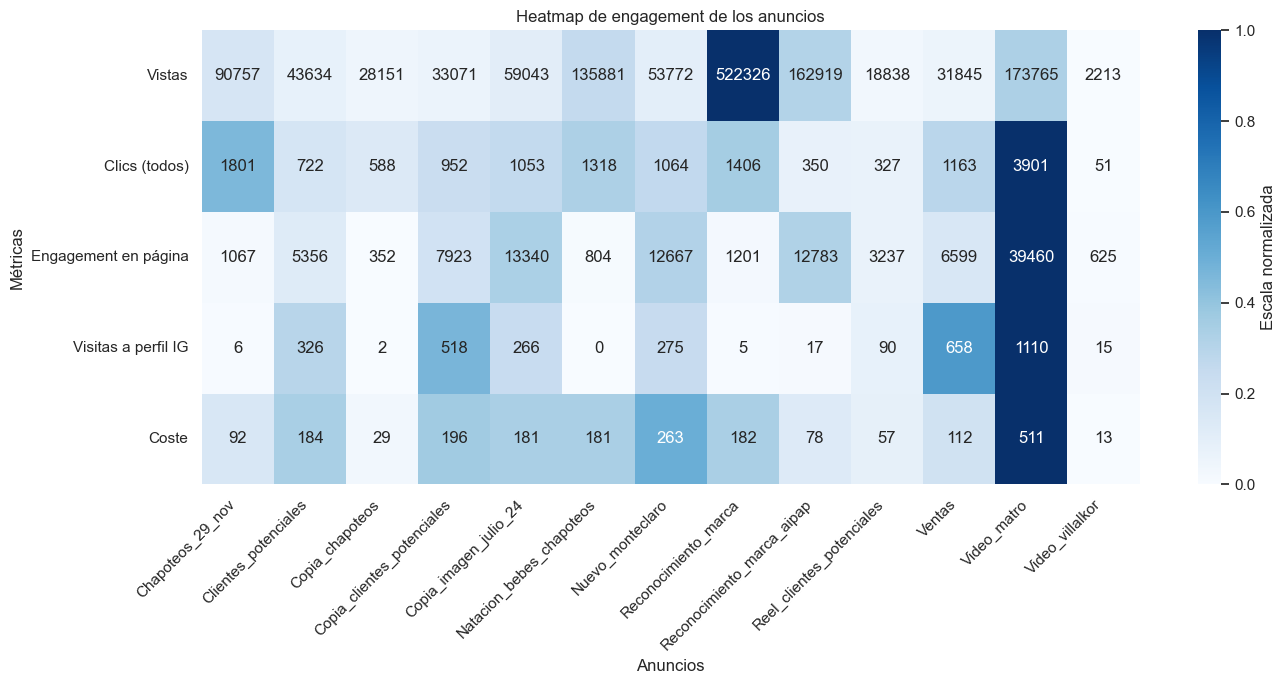

In [177]:
# Ensure only numeric data is used
ad_data = ad_engagement_aggregates.set_index('Anuncio').select_dtypes(include='number')

# Normalize the data for better heatmap visualization
ad_data_normalized = ad_data.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Convert to numpy array and ensure float type
heatmap_ad_data = ad_data_normalized.T.values.astype(float)

# Prepare annotations
ad_annotations = ad_data.T.values.astype(int)

# Create the heatmap
plt.figure(figsize=(14, 7))
ax = sns.heatmap(heatmap_ad_data, 
                 annot=ad_annotations, 
                 cmap='Blues', 
                 fmt='d', 
                 cbar_kws={'label': 'Escala normalizada'},
                 xticklabels=ad_data_normalized.index,
                 yticklabels=ad_data_normalized.columns)

plt.title('Heatmap de engagement de los anuncios')
plt.xlabel('Anuncios')
plt.ylabel('Métricas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Análisis de Engagement por Anuncio:

Top en rendimiento:
- Video_matro
  * Mejor rendimiento global
  * 3,901 clics (máximo)
  * 39,460 engagement en página
  * 1,110 visitas a perfil IG
  * 2.94€ por mil vistas

- Reconocimiento_marca
  * Mayor alcance (522K vistas)
  * Coste-eficiente (0.35€ por mil vistas)
  * 1,406 clics
  * Perfecto para objetivo awareness

Rendimiento notable:
- Chapoteos_29_nov
  * Excelente ROI: 90K vistas con 92€
  * 1,801 clics
  * 1.02€ por mil vistas
  * Bajo coste por clic (0.05€)

Necesitan optimización:
- Video_villalkor
  * Métricas bajas en todas las categorías
  * Solo 51 clics con 2.2K vistas
  * 6.24€ por mil vistas

- Reel_clientes_potenciales
  * Bajo rendimiento: 18K vistas
  * 327 clics (CTR 1.7%)
  * Coste moderado (57€)

Información clave:
1. Formatos video funcionan bien con contenido adecuado
2. Copias de anuncios muestran rendimiento inferior a originales
3. Anuncios de reconocimiento más eficientes en costes
4. CTR promedio varía significativamente (0.2% - 2.3%)

Recomendación: 
- Escalar presupuesto en Video_matro y Reconocimiento_marca
- Pausar o rediseñar anuncios de bajo rendimiento
- Optimizar copias para mejorar performance

##### 3.7 ENGAGEMENT POR PLATAFORMA

In [178]:
platform_engagement_aggregates

Plataforma  Vistas  Clics (todos)  Engagement en página  \
0  audience_network      99            102                   190   
1          facebook  981505           6845                 27943   
2         instagram  374553           7749                 77281   
3         messenger      58              0                     0   

   Visitas a perfil IG        Coste  
0                    0     6.146579  
1                    0   714.402331  
2                 3288  1363.521144  
3                    0     0.009945

##### 3.8 HEATMAP DE ENGAGEMENT POR PLATAFORMA: VISTAS, CLICS, ENGAGEMENT PÁGINA, VISITAS PERFIL IG

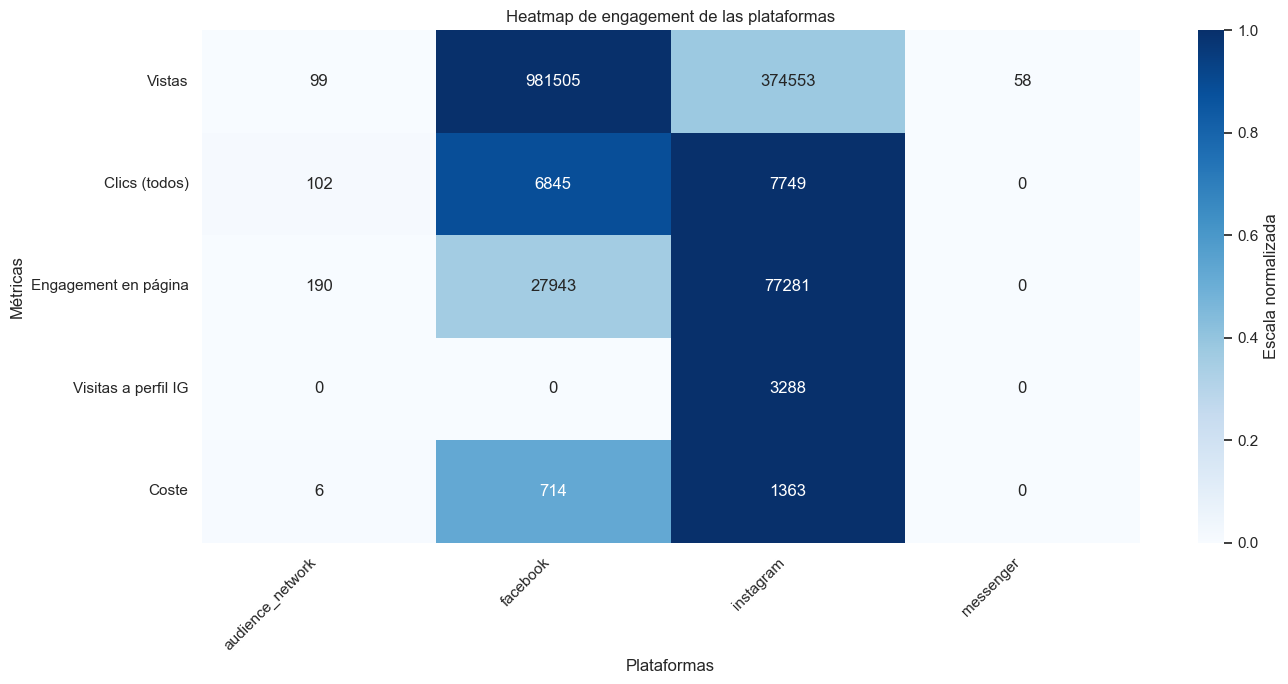

In [179]:
# Ensure only numeric data is used
platform_data = platform_engagement_aggregates.set_index('Plataforma').select_dtypes(include='number')

# Normalize the data for better heatmap visualization
platform_data_normalized = platform_data.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Convert to numpy array and ensure float type
heatmap_platform_data = platform_data_normalized.T.values.astype(float)

# Prepare annotations
platform_annotations = platform_data.T.values.astype(int)

# Create the heatmap
plt.figure(figsize=(14, 7))
ax = sns.heatmap(heatmap_platform_data, 
                 annot=platform_annotations, 
                 cmap='Blues', 
                 fmt='d', 
                 cbar_kws={'label': 'Escala normalizada'},
                 xticklabels=platform_data_normalized.index,
                 yticklabels=platform_data_normalized.columns)

plt.title('Heatmap de engagement de las plataformas')
plt.xlabel('Plataformas')
plt.ylabel('Métricas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Análisis de Engagement por Plataforma:

Facebook:
- Líder en alcance (981K vistas)
- Coste-eficiente: 0.73€ por mil vistas
- 6,845 clics (CTR 0.70%)
- 27,943 interacciones en página
- Mejor plataforma para awareness

Instagram:
- Mayor engagement general
- 7,749 clics (CTR 2.07% - mejor ratio)
- 77,281 interacciones en página
- Única con visitas a perfil (3,288)
- Mayor inversión (1,363€) pero justificada por engagement

Plataformas secundarias:
- Audience Network
  * Métricas marginales
  * CTR sorprendentemente alto (103%)
  * Inversión mínima (6€)
  * ROI cuestionable

- Messenger
  * Performance insignificante
  * Sin engagement
  * Inversión despreciable (0.01€)
  * Recomendar eliminación

Insights Clave:
1. Instagram destaca en engagement cualitativo
2. Facebook más eficiente para alcance masivo
3. Plataformas secundarias no aportan valor significativo

Recomendaciones:
- Mantener mix Facebook-Instagram como núcleo
- Incrementar presupuesto en Instagram para acciones de engagement
- Utilizar Facebook para campañas de alcance
- Eliminar presencia en Messenger y reevaluar Audience Network

***

##### 4. CONVERSIÓN

##### * Clics en link: número de clics en links en el anuncio que llevan a un destino concreto, dentro o fuera de Meta
##### * Follows o likes: número de follows o likes que recibes en tu perfil de Facebook o página, atribuídos a tus anuncios
##### * Recuerdo anuncio estimado: número estimado de personas que recuerdan haber visto tu anuncio, si se les pregunta, en un plazo de dos días
##### * Leads: número de leads atribuídos a tus anuncios, según la información recibida de una o más herramientas conectadas de Meta Business, o bien que suceden directamente en Meta
##### * Leads de sitio web: número de eventos de lead rastreados por el pixel, o conversiones API en tu sitio web y atribuídos a tus anuncios
##### * Meta leads: número de leads enviados en Meta (incluye formulario, chats de Messenger e Instagram) que se atribuyen a tu anuncios
##### * Ventas: el valor total de las ventas por el sitio web

In [180]:
# Aggregate metrics for each Campaign
campaign_conversion_aggregates = raw_data.groupby('Campaña').agg({
    'Leads': 'sum',
    'Leads de sitio web': 'sum',
    'Meta leads': 'sum',
    'Ventas': 'sum',
    'Clics en link': 'sum',
    'Follows o likes': 'sum',
    'Recuerdo anuncio estimado': 'sum'
}).reset_index()

# Aggregate metrics for each Ad set
ad_set_conversion_aggregates = raw_data.groupby('Set anuncios').agg({
    'Leads': 'sum',
    'Leads de sitio web': 'sum',
    'Meta leads': 'sum',
    'Ventas': 'sum',
    'Clics en link': 'sum',
    'Follows o likes': 'sum',
    'Recuerdo anuncio estimado': 'sum'
}).reset_index()

# Aggregate metrics for each Ad
ad_conversion_aggregates = raw_data.groupby('Anuncio').agg({
    'Leads': 'sum',
    'Leads de sitio web': 'sum',
    'Meta leads': 'sum',
    'Ventas': 'sum',
    'Clics en link': 'sum',
    'Follows o likes': 'sum',
    'Recuerdo anuncio estimado': 'sum'
}).reset_index()

# Aggregate metrics for each Platform
platform_conversion_aggregates = raw_data.groupby('Plataforma').agg({
    'Leads': 'sum',
    'Leads de sitio web': 'sum',
    'Meta leads': 'sum',
    'Ventas': 'sum',
    'Clics en link': 'sum',
    'Follows o likes': 'sum',
    'Recuerdo anuncio estimado': 'sum'
}).reset_index()

##### 4.1 CONVERSIÓN CAMPAÑAS

In [181]:
campaign_conversion_aggregates

Campaña  Leads  Leads de sitio web  Meta leads  Ventas  \
0   Aipap_reconocimiento_marca      1                   1           0     0.0   
1               Campaña_ventas     28                  28           0   158.0   
2             Centro_villalkor      0                   0           0     0.0   
3      Clientes_potenciales_ig     22                  22           0     0.0   
4    Clientes_potenciales_reel     24                  11          13     0.0   
5          Embarazadas_anuncio     21                  21           0    79.0   
6     Matronatacion_conversion    122                 122           0     0.0   
7                   Monteclaro      5                   5           0     0.0   
8      Nuevo_centro_monteclaro     19                  19           0    79.0   
9               Post_chapoteos      0                   0           0     0.0   
10        Reconocimiento_marca      0                   0           0     0.0   
11            Redes_seguidores      0                   0           0     0.0   

    Clics en link  Follows o likes  Recuerdo anuncio estimado  
0             104                0                       4950  
1             424                1                          0  
2              35                0                          0  
3             723                0                          0  
4             122                1                          0  
5             470                1                          0  
6            2519                2                          0  
7             276                1                          0  
8             704                1                          0  
9            1317                0                          0  
10           1029                1                       9171  
11            272              196                          0

##### 4.2 HEATMAP DE CONVERSIÓN POR CAMPAÑA: LEADS, LEADS EN SITIO WEB, META LEADS, VENTAS, CLICS EN LINK, FOLLOWS O LIKES, RECUERDO ANUNCIO ESTIMADO

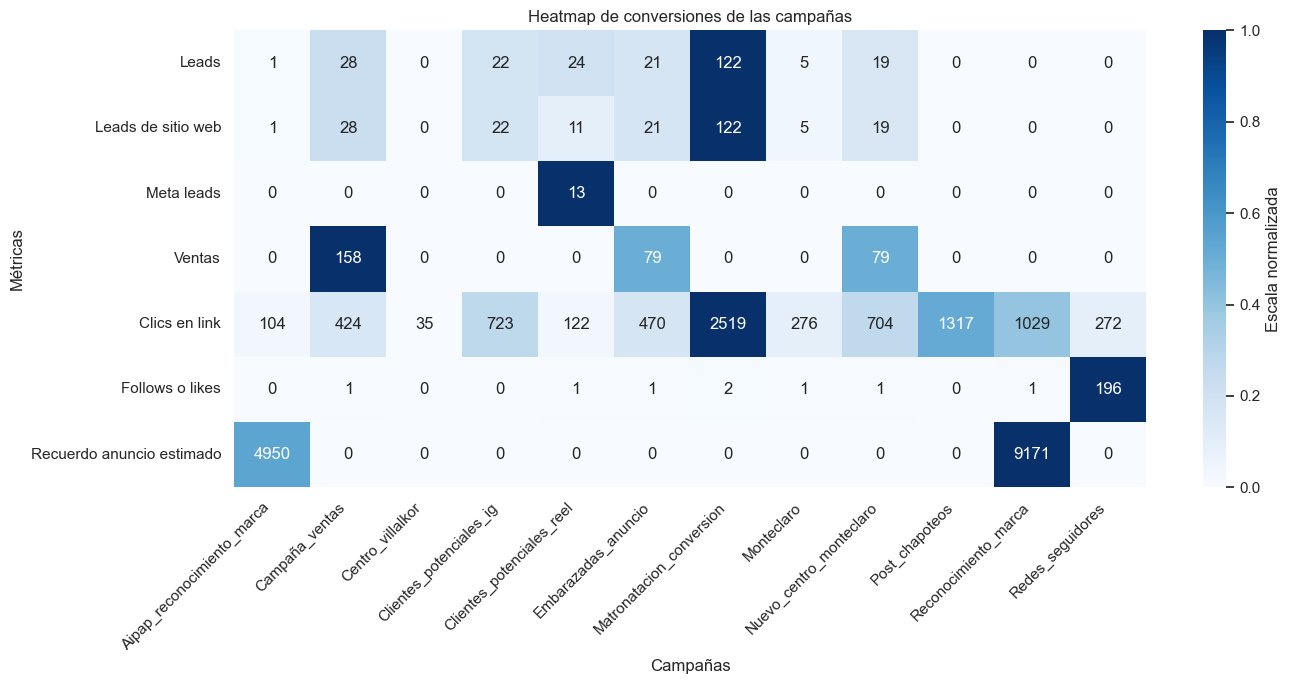

In [182]:
# Ensure only numeric data is used
campaign_data = campaign_conversion_aggregates.set_index('Campaña').select_dtypes(include='number')

# Normalize the data for better heatmap visualization
campaign_data_normalized = campaign_data.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Convert to numpy array and ensure float type
heatmap_campaign_data = campaign_data_normalized.T.values.astype(float)

# Prepare annotations
campaign_annotations = campaign_data.T.values.astype(int)

# Create the heatmap
plt.figure(figsize=(14, 7))
ax = sns.heatmap(heatmap_campaign_data, 
                 annot=campaign_annotations, 
                 cmap='Blues', 
                 fmt='d', 
                 cbar_kws={'label': 'Escala normalizada'},
                 xticklabels=campaign_data_normalized.index,
                 yticklabels=campaign_data_normalized.columns)

plt.title('Heatmap de conversiones de las campañas')
plt.xlabel('Campañas')
plt.ylabel('Métricas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Análisis de Conversiones por Campaña:

Campañas de alto rendimiento:
- Matronatacion_conversion
  * 122 leads web (mejor rendimiento)
  * 2,519 clics en links
  * CTR a lead: 4.84%
  * Mejor campaña en generación de leads

- Campaña_ventas
  * 158 ventas (líder)
  * 28 leads web
  * 424 clics en links
  * Mejor ratio ventas/lead: 5.64

Campañas de Awareness:
- Reconocimiento_marca
  * 9,171 recuerdos estimados
  * 1,029 clics en links
  * Enfoque correcto en objetivo
  * Sin leads (coherente con objetivo)

Rendimiento social:
- Redes_seguidores
  * 196 follows/likes (máximo)
  * 272 clics en links
  * CTR a follow: 72%
  * Cumple objetivo social

Necesitan optimización:
- Centro_villalkor
  * Sin conversiones
  * Solo 35 clics
  * Rendimiento muy bajo

- Post_chapoteos
  * 1,317 clics pero sin conversiones
  * Oportunidad de optimización

Recomendaciones:
1. Escalar presupuesto en Matronatacion y Ventas
2. Mantener estrategia de awareness actual
3. Revisar estrategia de campañas sin conversiones
4. Optimizar Post_chapoteos para convertir tráfico

##### 4.3 CONVERSIÓN POR SET DE ANUNCIOS

In [183]:
ad_set_conversion_aggregates

Set anuncios  Leads  Leads de sitio web  Meta leads  Ventas  \
0            Aipap_conversion     21                  21           0    79.0   
1  Aipap_reconocimiento_marca      1                   1           0     0.0   
2             Chapoteos_4_oct      0                   0           0     0.0   
3        Clientes_potenciales     70                  57          13    79.0   
4  Matro_intereses_conversion    122                 122           0     0.0   
5    Natacion_bebes_chapoteos      0                   0           0     0.0   
6        Reconocimiento_marca      0                   0           0     0.0   
7                      Ventas     28                  28           0   158.0   

   Clics en link  Follows o likes  Recuerdo anuncio estimado  
0            470                1                          0  
1            104                0                       4950  
2           1317                0                          0  
3           1860                3                          0  
4           2519                2                          0  
5            272              196                          0  
6           1029                1                       9171  
7            424                1                          0

##### 4.4 HEATMAP DE CONVERSIÓN POR SET DE ANUNCIOS: LEADS, LEADS EN SITIO WEB, META LEADS, VENTAS, CLICS EN LINK, FOLLOWS O LIKES, RECUERDO ANUNCIO ESTIMADO

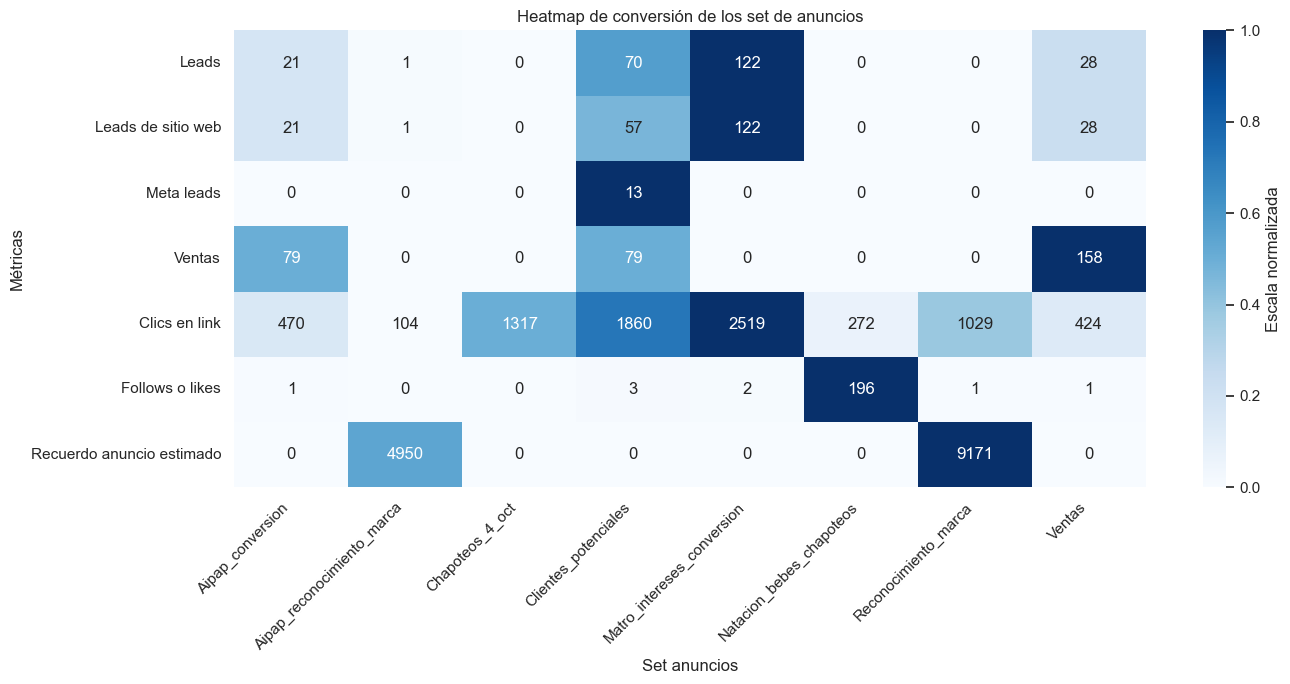

In [184]:
# Ensure only numeric data is used
ad_set_data = ad_set_conversion_aggregates.set_index('Set anuncios').select_dtypes(include='number')

# Normalize the data for better heatmap visualization
ad_set_data_normalized = ad_set_data.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Convert to numpy array and ensure float type
heatmap_ad_set_data = ad_set_data_normalized.T.values.astype(float)

# Prepare annotations
ad_set_annotations = ad_set_data.T.values.astype(int)

# Create the heatmap
plt.figure(figsize=(14, 7))
ax = sns.heatmap(heatmap_ad_set_data, 
                 annot=ad_set_annotations, 
                 cmap='Blues', 
                 fmt='d', 
                 cbar_kws={'label': 'Escala normalizada'},
                 xticklabels=ad_set_data_normalized.index,
                 yticklabels=ad_set_data_normalized.columns)

plt.title('Heatmap de conversión de los set de anuncios')
plt.xlabel('Set anuncios')
plt.ylabel('Métricas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Análisis de Conversiones por Set de Anuncios:

Sets de alta conversión:
- Matro_intereses_conversion
  * 122 leads web (líder)
  * 2,519 clics en links
  * Ratio conversión: 4.84%
  * Mejor rendimiento en generación de leads

- Ventas
  * 158 ventas (máximo)
  * 28 leads web
  * Mejor ratio ventas/lead: 5.64
  * Eficiencia en conversión comercial

Sets de generación de leads:
- Clientes_potenciales
  * 70 leads totales (57 web + 13 Meta)
  * 79 ventas
  * 1,860 clics
  * Buen balance leads/ventas

Sets de Awareness:
- Reconocimiento_marca
  * 9,171 recuerdos estimados
  * 1,029 clics
  * Cumple objetivo de branding

Sets Sociales:
- Natacion_bebes_chapoteos
  * 196 follows/likes
  * Enfoque en engagement social
  * Sin conversiones directas

Oportunidades de mejora:
- Chapoteos_4_oct
  * 1,317 clics sin conversiones
  * Necesita optimización de funnel

Recomendaciones:
1. Replicar configuración de Matro_intereses
2. Mantener mix Ventas + Clientes_potenciales
3. Optimizar sets sin conversiones
4. Evaluar necesidad de sets puramente sociales

##### 4.5 CONVERSIÓN POR ANUNCIO

In [185]:
ad_conversion_aggregates

Anuncio  Leads  Leads de sitio web  Meta leads  Ventas  \
0             Chapoteos_29_nov      0                   0           0     0.0   
1         Clientes_potenciales     13                  13           0     0.0   
2              Copia_chapoteos      0                   0           0     0.0   
3   Copia_clientes_potenciales     14                  14           0     0.0   
4        Copia_imagen_julio_24     21                  21           0    79.0   
5     Natacion_bebes_chapoteos      0                   0           0     0.0   
6             Nuevo_monteclaro     19                  19           0    79.0   
7         Reconocimiento_marca      0                   0           0     0.0   
8   Reconocimiento_marca_aipap      1                   1           0     0.0   
9    Reel_clientes_potenciales     24                  11          13     0.0   
10                      Ventas     28                  28           0   158.0   
11                 Video_matro    122                 122           0     0.0   
12             Video_villalkor      0                   0           0     0.0   

    Clics en link  Follows o likes  Recuerdo anuncio estimado  
0             990                0                          0  
1             413                1                          0  
2             327                0                          0  
3             589                0                          0  
4             470                1                          0  
5             272              196                          0  
6             704                1                          0  
7            1029                1                       9171  
8             104                0                       4950  
9             122                1                          0  
10            424                1                          0  
11           2519                2                          0  
12             32                0                          0

##### 4.6 HEATMAP DE CONVERSIÓN POR ANUNCIO: LEADS, LEADS EN SITIO WEB, META LEADS, VENTAS, CLICS EN LINK, FOLLOWS O LIKES, RECUERDO ANUNCIO ESTIMADO

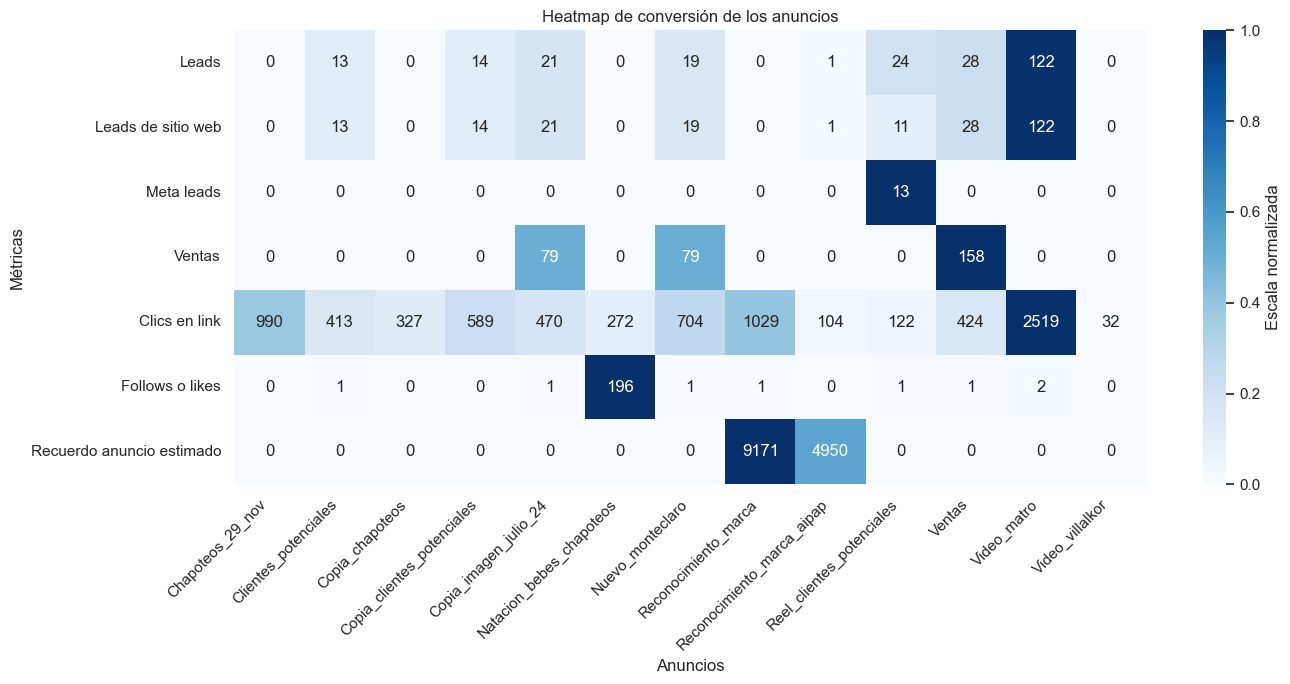

In [186]:
# Ensure only numeric data is used
ad_data = ad_conversion_aggregates.set_index('Anuncio').select_dtypes(include='number')

# Normalize the data for better heatmap visualization
ad_data_normalized = ad_data.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Convert to numpy array and ensure float type
heatmap_ad_data = ad_data_normalized.T.values.astype(float)

# Prepare annotations
ad_annotations = ad_data.T.values.astype(int)

# Create the heatmap
plt.figure(figsize=(14, 7))
ax = sns.heatmap(heatmap_ad_data, 
                 annot=ad_annotations, 
                 cmap='Blues', 
                 fmt='d', 
                 cbar_kws={'label': 'Escala normalizada'},
                 xticklabels=ad_data_normalized.index,
                 yticklabels=ad_data_normalized.columns)

plt.title('Heatmap de conversión de los anuncios')
plt.xlabel('Anuncios')
plt.ylabel('Métricas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Análisis de Conversiones por Anuncio:

Top en rendimiento:
- Video_matro
  * 122 leads web (líder)
  * 2,519 clics (máximo)
  * Ratio conversión: 4.84%
  * Mejor rendimiento en leads

- Ventas
  * 158 ventas (máximo)
  * 28 leads web
  * 424 clics
  * Mejor ratio ventas/lead: 5.64

Anuncios de Awareness:
- Reconocimiento_marca
  * 9,171 recuerdos estimados
  * 1,029 clics
  * Cumple objetivo branding
- Reconocimiento_marca_aipap
  * 4,950 recuerdos estimados
  * Complementa estrategia awareness

Rendimiento medio:
- Nuevo_monteclaro
  * 19 leads, 79 ventas
  * 704 clics
  * Buen ratio conversión

- Reel_clientes_potenciales
  * 24 leads (11 web + 13 Meta)
  * Único con Meta leads
  * Bajo volumen de clics (122)

Necesitan optimización:
- Video_villalkor
  * Solo 32 clics
  * Sin conversiones
  * Peor performance

- Copias de anuncios
  * Rendimiento inferior a originales
  * Necesitan revisión de creatividades

Recomendaciones:
1. Escalar presupuesto en Video_matro y Ventas
2. Mantener mix de awareness actual
3. Discontinuar Video_villalkor
4. Revisar estrategia de copias de anuncios

##### 4.7 CONVERSIÓN POR PLATAFORMA

In [187]:
platform_conversion_aggregates

Plataforma  Leads  Leads de sitio web  Meta leads  Ventas  \
0  audience_network      0                   0           0     0.0   
1          facebook     27                  22           5     0.0   
2         instagram    215                 207           8   316.0   
3         messenger      0                   0           0     0.0   

   Clics en link  Follows o likes  Recuerdo anuncio estimado  
0            105                0                          0  
1           3235              204                      10990  
2           4655                0                       3130  
3              0                0                          1

##### 4.8 HEATMAP DE CONVERSIÓN POR PLATAFORMA: LEADS, LEADS EN SITIO WEB, META LEADS, VENTAS, CLICS EN LINK, FOLLOWS O LIKES, RECUERDO ANUNCIO ESTIMADO

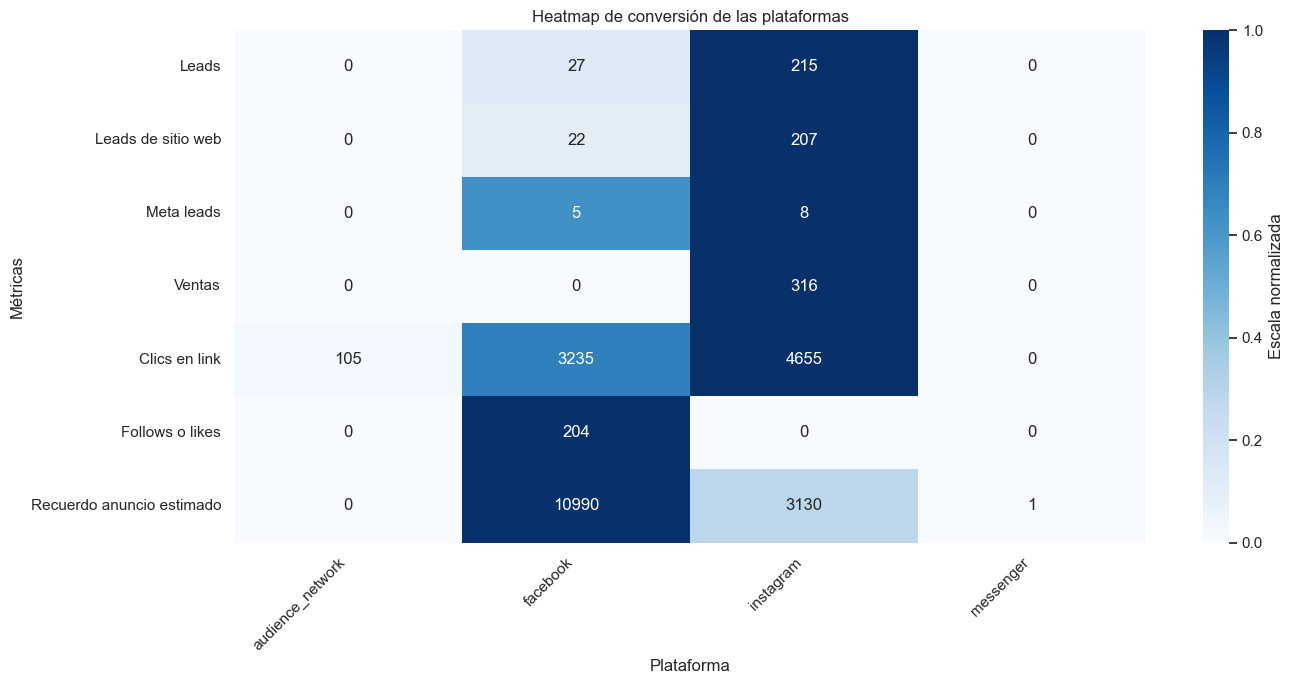

In [188]:
# Ensure only numeric data is used
platform_data = platform_conversion_aggregates.set_index('Plataforma').select_dtypes(include='number')

# Normalize the data for better heatmap visualization
platform_data_normalized = platform_data.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Convert to numpy array and ensure float type
heatmap_platform_data = platform_data_normalized.T.values.astype(float)

# Prepare annotations
platform_annotations = platform_data.T.values.astype(int)

# Create the heatmap
plt.figure(figsize=(14, 7))
ax = sns.heatmap(heatmap_platform_data, 
                 annot=platform_annotations, 
                 cmap='Blues', 
                 fmt='d', 
                 cbar_kws={'label': 'Escala normalizada'},
                 xticklabels=platform_data_normalized.index,
                 yticklabels=platform_data_normalized.columns)

plt.title('Heatmap de conversión de las plataformas')
plt.xlabel('Plataforma')
plt.ylabel('Métricas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Análisis de Conversiones por Plataforma:

Instagram (principal convertidor):
- Domina en conversiones directas:
  * 215 leads totales (207 web + 8 Meta)
  * 316 ventas (100% del total)
  * 4,655 clics en links
  * Mejor ratio de conversión: 4.62%
- ROI superior en acciones comerciales

Facebook (Awareness y Engagement):
- Fuerte en branding y social:
  * 10,990 recuerdos estimados
  * 204 follows/likes
  * 3,235 clics en links
- Conversión moderada:
  * 27 leads (22 web + 5 Meta)
  * Sin ventas directas

Plataformas secundarias:
- Audience Network:
  * Performance marginal
  * Solo 105 clics
  * Sin conversiones
  * ROI cuestionable

- Messenger:
  * Sin métricas significativas
  * 1 recuerdo estimado
  * No justifica inversión

Recomendaciones:
1. Priorizar Instagram para objetivos de conversión
2. Mantener Facebook para awareness y engagement
3. Eliminar presencia en Messenger
4. Reevaluar inversión en Audience Network
5. Optimizar distribución presupuestaria: 70% Instagram, 30% Facebook

***

##### LANDING PAGE

**Análisis de Marketing de Landing Pages**

**Propósito del Análisis:**
El objetivo principal de este análisis es evaluar la efectividad de los esfuerzos de marketing en diversas plataformas, incluyendo Google Ads, Meta (Facebook e Instagram). Al examinar el rendimiento de las landing pages, buscamos entender cómo nuestro embudo de marketing convierte la conciencia y el compromiso en acciones tangibles.

**Estructura del Análisis:**

1. **Etapa de Awareness:**
   - **Objetivo:** medir el alcance y la visibilidad de las landing page.
   - **Métrica clave:** impresiones diarias por categoría de página.
   - **Visualización:** gráfico que muestra las impresiones diarias para resaltar tendencias e identificar categorías de alto rendimiento.

2. **Etapa de Engagement:**
   - **Objetivo:** evaluar la interacción y el interés de los usuarios en nuestro contenido.
   - **Métricas:**
     - **Sesiones vs. Sesiones interactivas:** analizar el mínimo y máximo de sesiones comparado con sesiones interactivas por canal.
     - **Tasa de rebote:** gráfico que muestra el porcentaje de rebote por canal para identificar áreas de mejora.
     - **Actividad de usuarios:** gráfico que compara el número de eventos con usuarios activos por canal.
     - **Clics diarios:** seguimiento de clics diarios por categoría de página para entender las preferencias de los usuarios.

3. **Etapa de Conversión:**
   - **Objetivo:** evaluar la efectividad de convertir el compromiso en acciones.
   - **Métricas:**
     - **Acciones diarias:** gráfico de acciones diarias por categoría de conversión para monitorear el rendimiento.
     - **Acciones totales:** resumen de acciones totales por categoría de conversión para evaluar el éxito general.
   - **Conexión con campañas:** las conversiones están directamente vinculadas a la etapa de conversión en el análisis de campañas de Google Ads, proporcionando una visión integral de la efectividad del embudo.

**Conclusión:**
Este análisis ofrece una visión detallada de nuestro embudo de marketing, desde la conciencia inicial hasta la conversión final. Al comprender cada etapa, los interesados pueden tomar decisiones informadas para optimizar las estrategias de marketing y mejorar el rendimiento general.

In [189]:
landing_page_metrics = pd.read_csv('/Users/cesarchaparro/Desktop/GitHub/Chapoteos/analytics_data/analytics/primer_proyecto/landing_page_metrics.csv',
                      encoding='utf-8')  # Use 'utf-16' encoding

# Convert 'Fecha' to datetime
landing_page_metrics['Fecha'] = pd.to_datetime(landing_page_metrics['Fecha'])

if pd.api.types.is_numeric_dtype(landing_page_metrics['Impresiones']):
    pass  # Already numeric, no need to convert
elif pd.api.types.is_string_dtype(landing_page_metrics['Impresiones']):
    landing_page_metrics['Impresiones'] = landing_page_metrics['Impresiones'].str.replace(',', '', regex=False).astype(int)
else:
    # Handle mixed types or other unexpected types
    landing_page_metrics['Impresiones'] = landing_page_metrics['Impresiones'].astype(str).str.replace(',', '', regex=False).astype(int)

landing_page_metrics.head()

Fecha  Coste  Clics  Impresiones Categoría de página
0 2025-01-29   0.59      5          150       Página Inicio
1 2025-01-29   1.09      2           26            Campañas
2 2025-01-29   2.23      7         1639            Campañas
3 2025-01-29   0.73      1           16            Campañas
4 2025-01-29   4.38      4          253     Clases y cursos

##### 1. AWARENESS POR CATEGORÍA DE PÁGINA

In [190]:
# Group by 'Fecha' and 'Categoría de página' and aggregate 'Impresiones'
aggregated_landing_page_data = landing_page_metrics.groupby(['Fecha', 'Categoría de página'])['Impresiones'].sum().reset_index()

# Display the aggregated DataFrame
#aggregated_landing_page_data.head()

##### 1.1 GRÁFICA DE AWARENESS POR CATEGORÍA DE PÁGINA: IMPRESIONES POR DÍA

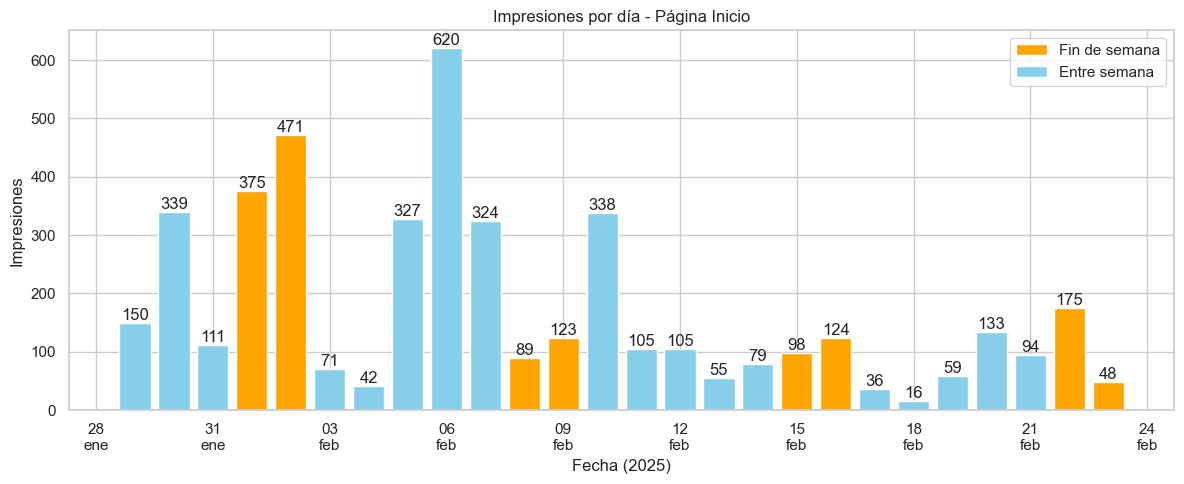

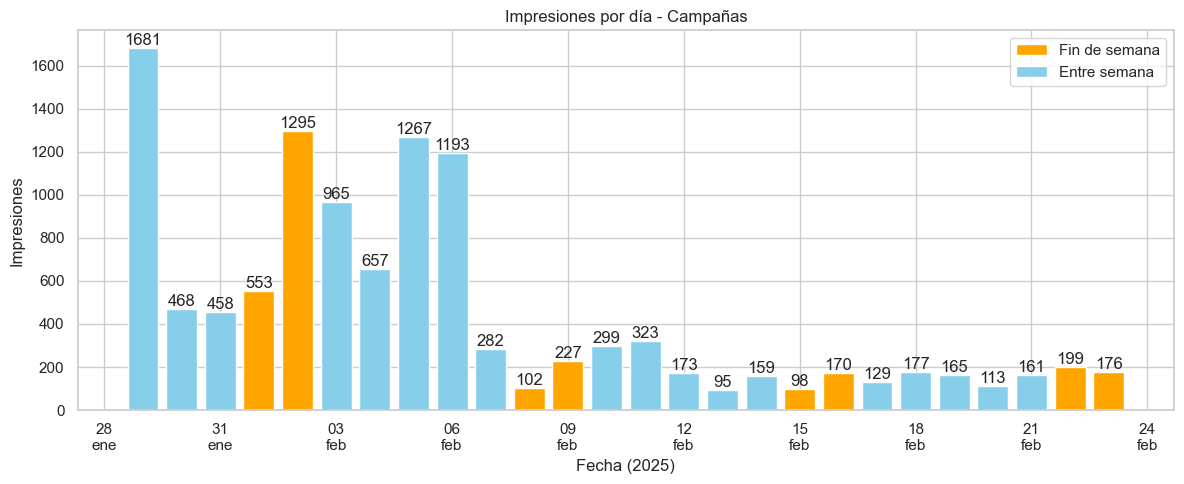

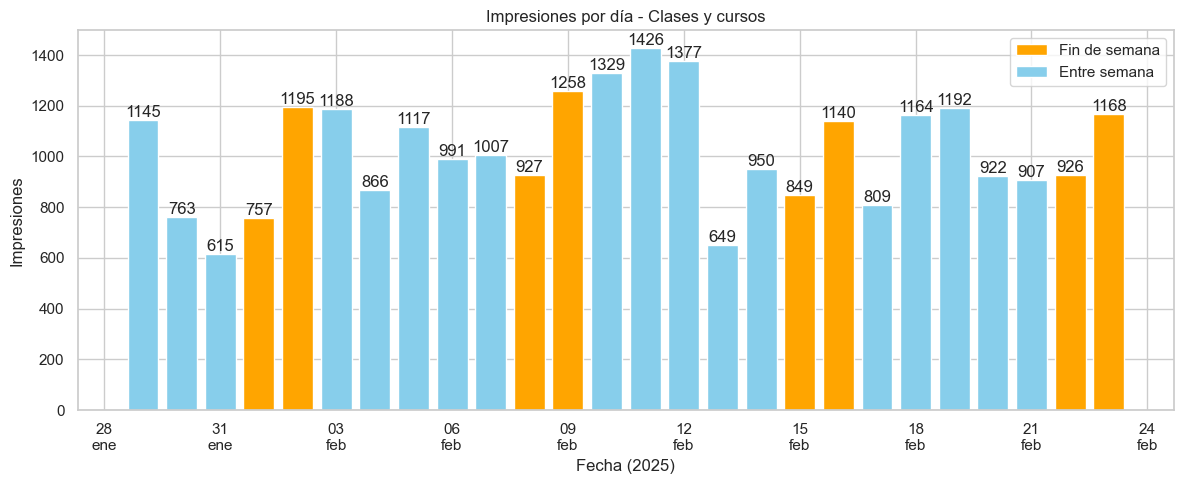

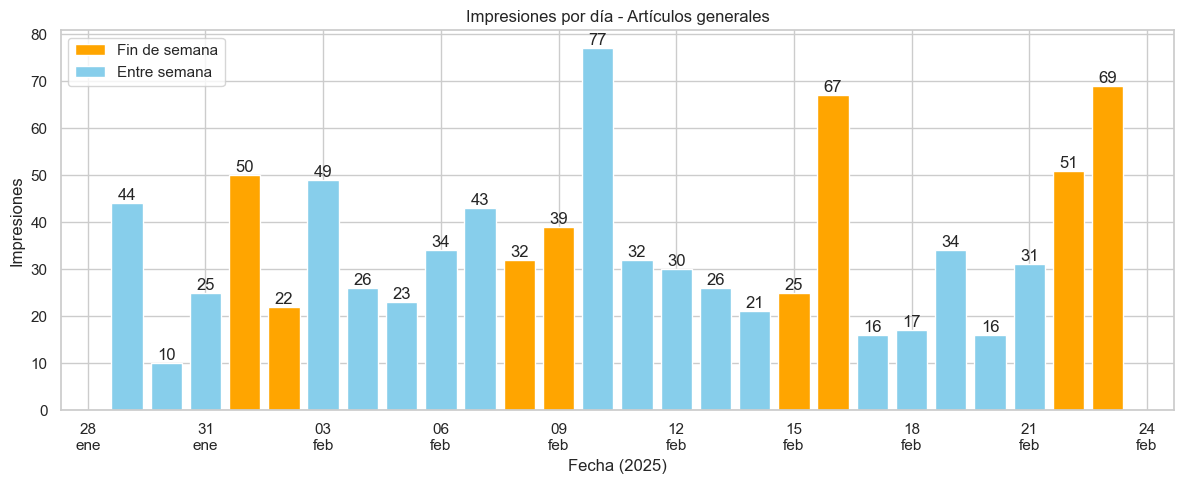

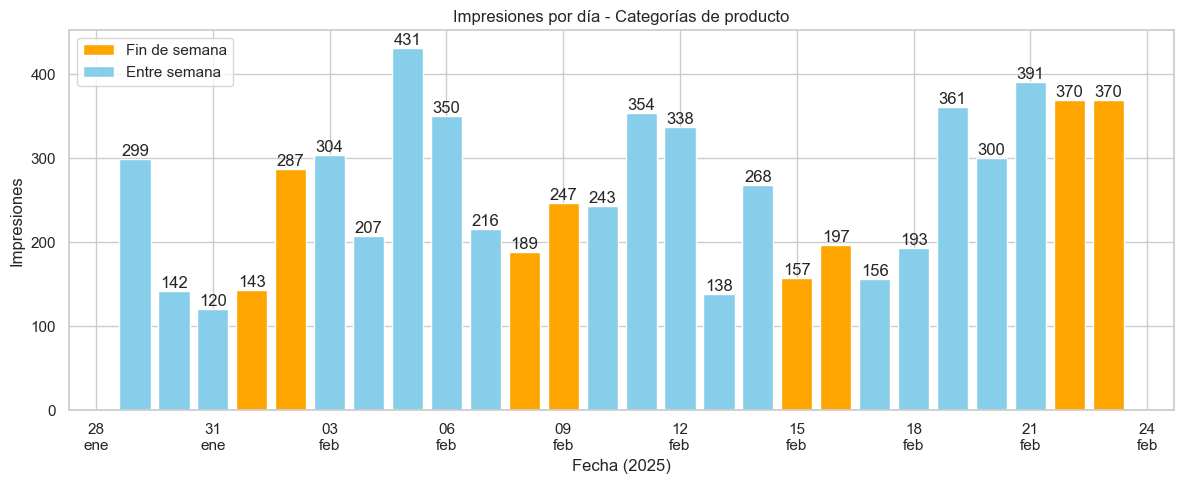

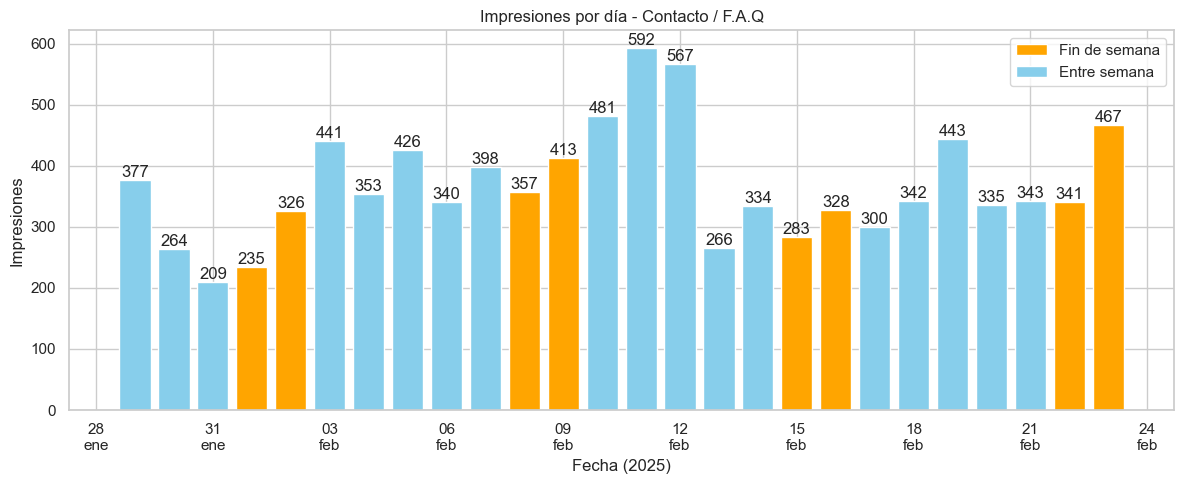

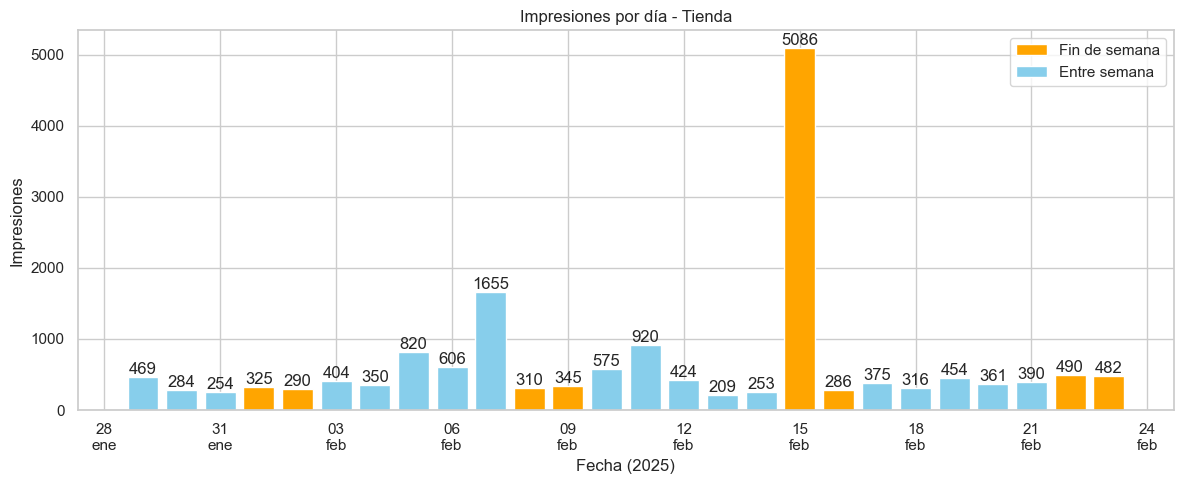

In [191]:
# Get unique categories
categories = landing_page_metrics['Categoría de página'].unique()

# Create a plot for each category
for category in categories:
    # Filter data for the current category
    category_data = landing_page_metrics[landing_page_metrics['Categoría de página'] == category]
    
    # Group by 'Fecha' and sum 'Impresiones'
    aggregated_category_data = category_data.groupby('Fecha')['Impresiones'].sum()
    
    # Plot
    plt.figure(figsize=(12, 5))
    
    # Create bar plot with different colors for weekends
    bars = []
    for date, value in aggregated_category_data.items():
        if date.weekday() >= 5:  # Saturday and Sunday
            bars.append(plt.bar(date, value, color='orange', label='Fin de semana' if date.weekday() == 5 else ""))
        else:
            bars.append(plt.bar(date, value, color='skyblue', label='Entre semana' if date.weekday() == 0 else ""))
    
    # Format x-axis
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=3))
    
    # Customize the plot
    plt.title(f'Impresiones por día - {category}')
    plt.xlabel('Fecha (2025)')
    plt.ylabel('Impresiones')
    
    # Annotate bars with values
    for bar in bars:
        height = bar[0].get_height()
        plt.text(bar[0].get_x() + bar[0].get_width() / 2, height,
                 f'{height:.0f}',
                 ha='center', va='bottom')
    
    # Add legend
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    
    plt.tight_layout()
    
    # Show the plot
    plt.show()

Análisis de comportamiento Web por Categoría:

Página de Inicio:
- Pico notable de 620 impresiones (6 feb)
- Fin de semana fuerte (31 ene-3 feb): 375-471 impresiones
- Correlación con picos de campañas Google/Meta de inicio de mes
- Tendencia descendente desde mediados de febrero

Clases y Cursos (Mejor rendimiento):
- Volumen consistente: 900-1400 impresiones diarias
- Picos en días laborables (12 feb: 1,426)
- Refleja éxito de campañas de Matronatación y Clases natación
- Mantiene estabilidad vs otras categorías

Campañas:
- Alta volatilidad (102-1,681 impresiones)
- Picos correlacionados con inversión publicitaria
- Mejor rendimiento inicio febrero (1,200-1,600 impresiones)
- Alineado con períodos de mayor inversión en Meta/Google

Patrones destacables:
1. Tienda:
   - Pico extraordinario 15 feb (5,086 impresiones)
   - Coincide con períodos de promoción en Meta
   - Base estable 300-500 impresiones

2. Contacto/FAQ:
   - Tendencia creciente (pico 592 impresiones)
   - Refleja eficacia de campañas de generación de leads
   - Mayor actividad entre semana

Recomendaciones:
- Optimizar contenido para mantener engagement post-clic
- Alinear picos de campaña con capacidad de conversión web
- Reforzar estrategia mobile-first (según datos Meta/Google)
- Capitalizar períodos de alto tráfico para conversión

***

##### 2. ENGAGEMENT

##### * Sesiones interactivas
##### * Sesiones
##### * % Rebotes
##### * Usuarios activos
##### * Número de eventos
##### * Interacciones
##### * Clics

##### Definiciones de canales:

1.  **Social de pago**
    - Definición: se refiere al tráfico generado a partir de anuncios pagados en plataformas de redes sociales. Estos son típicamente publicaciones patrocinadas o anuncios que aparecen en los feeds o líneas de tiempo de los usuarios.
    - Plataformas: las plataformas comunes incluyen Meta (Facebook e Instagram).
    - Propósito: el objetivo es alcanzar una audiencia específica a través de promociones pagadas para aumentar el reconocimiento de marca, generar tráfico y obtener leads o ventas.

2. **Búsqueda de pago**
    - Definición: se refiere al tráfico proveniente de anuncios pagados que aparecen en las páginas de resultados de los motores de búsqueda (SERPs). Estos son típicamente anuncios de pago por clic (PPC).
    - Plataformas: la plataforma principal es Google Ads (anteriormente Google AdWords), pero también puede incluir Bing Ads y otros motores de búsqueda.
    - Propósito: la meta es captar usuarios que están buscando activamente palabras clave específicas relacionadas con tus productos o servicios, dirigiéndolos a tu sitio web.

3. **Búsqueda orgánica**
    - Definición: se refiere al tráfico que proviene de resultados de búsqueda no pagados en los motores de búsqueda. Esto se logra a través de la optimización para motores de búsqueda (SEO).
    - Plataformas: principalmente Google, pero también incluye Bing, Yahoo y otros motores de búsqueda.
    - Propósito: el objetivo es mejorar la visibilidad de tu sitio web en los resultados de los motores de búsqueda mediante contenido relevante y prácticas de SEO, atrayendo usuarios sin pagar por anuncios.

4. **Directo**
    - Definición: se refiere a los usuarios que llegan a tu sitio web escribiendo la URL directamente en su navegador o a través de marcadores. También puede incluir tráfico donde la fuente no es fácilmente identificable.
    - Propósito: el tráfico directo a menudo indica reconocimiento y lealtad a la marca, ya que los usuarios están buscando intencionalmente tu sitio web.

5. **Social orgánico**
    - Definición: se refiere al tráfico de publicaciones no pagadas en redes sociales. Esto incluye cualquier contenido compartido en plataformas de redes sociales que no esté promovido a través de publicidad pagada.
    - Plataformas: Meta (Facebook e Instagram), Twitter, LinkedIn, Pinterest, y otras.
    - Propósito: el objetivo es interactuar con tu audiencia a través de contenido regular y no pagado para construir comunidad, aumentar el reconocimiento de marca y generar tráfico.

6. **Google Ads (AdWords)**
    - Función: es una plataforma de publicidad en línea donde los anunciantes pujan para mostrar breves anuncios, ofertas de servicios, listados de productos o videos a los usuarios web.
    - Propósito: el propósito principal de Google Ads es dirigir tráfico específico a un sitio web colocando anuncios en los resultados de búsqueda y a través de la Red de Display de Google. Los anunciantes pueden dirigirse a palabras clave específicas, demografías y comportamientos de usuarios para llegar a clientes potenciales de manera efectiva.

7. **Recomendación**
    - Definición: se refiere a los usuarios que llegan a tu sitio web a través de enlaces en otros sitios web. Esto incluye cualquier tráfico que no provenga de motores de búsqueda, redes sociales o campañas pagadas.
    - Ejemplos de Plataformas: blogs, foros, sitios de noticias, y cualquier otro sitio web que enlace al tuyo.

8. **Red de cruce**
    - Definición: se refiere a campañas publicitarias que se ejecutan en múltiples redes o plataformas al mismo tiempo. Este canal agrupa el tráfico que no se puede atribuir a una sola red específica.
    - Ejemplos de Plataformas: campañas que abarcan Google Ads, Facebook Ads, y otras redes publicitarias simultáneamente.

9. **Display**
    - Definición: el tráfico de display proviene de anuncios gráficos que se muestran en sitios web o aplicaciones. Estos anuncios pueden incluir banners, imágenes, y otros formatos visuales.
    - Ejemplos de Plataformas: Google Display Network, anuncios en sitios web de noticias, y banners en aplicaciones móviles.

10. **Otro canal de pago**
    - Definición: es un canal que agrupa el tráfico de campañas pagadas que no encajan en las categorías estándar de búsqueda pagada, social pagado, o display. Puede incluir métodos de publicidad menos comunes.
    - Ejemplos de Plataformas: publicidad en plataformas de nicho o métodos de pago no tradicionales.

11. **Sin asignar**
    - Definición: se refiere al tráfico que no se ha podido clasificar en ninguno de los canales definidos. Esto puede ocurrir si la fuente de tráfico no está etiquetada correctamente o si hay problemas de seguimiento.
    - Ejemplos de Plataformas: cualquier tráfico que no se pueda atribuir a una fuente específica debido a la falta de datos o etiquetado.

12. **Video de pago**
    - Definición: se refiere al tráfico generado a partir de anuncios en video pagados. Estos anuncios suelen aparecer antes, durante o después de contenido de video en línea.
    - Ejemplos de Plataformas: YouTube Ads, anuncios en plataformas de streaming como Hulu o Twitch, y videos promocionados en redes sociales.

##### 2.1 MÍNIMO Y MÁXIMO DE SESIONES COMPARADO CON MÍNIMO Y MÁXIMO DE SESIONES INTERACTIVAS POR CANAL

In [192]:
# Read the CSV file into a DataFrame
channels = pd.read_csv('/Users/cesarchaparro/Desktop/GitHub/Chapoteos/analytics_data/analytics/primer_proyecto/channels.csv', sep=',')

# Rename columns
channels = channels.rename(columns={
    'Session default channel group': 'Canal', 
    'Date': 'Fecha', 
    'Bounce rate': '% Rebote', 
    'Sessions': 'Sesiones', 
    'Engaged sessions': 'Sesiones interactivas', 
    'Event count': 'Número de eventos', 
    'Key events': 'Eventos importantes', 
    'Active users': 'Usuarios activos'
})

# Mapping of English channel names to Spanish
channel_mapping = {
   'Cross-network': 'Red de cruce',
   'Direct': 'Directo',
   'Display': 'Display',
   'Organic Search': 'Búsqueda orgánica',
   'Organic Social': 'Social orgánico',
   'Paid Other': 'Otro canal de pago',
   'Paid Search': 'Búsqueda de pago',
   'Paid Social': 'Social de pago',
   'Referral': 'Recomendación',
   'Unassigned': 'Sin asignar',
   'Paid Video': 'Video de pago'
}

# Rename the values in the 'Canal' column
channels['Canal'] = channels['Canal'].replace(channel_mapping)

# Convert 'Fecha' to datetime
channels['Fecha'] = pd.to_datetime(channels['Fecha'])  # Remove the format parameter

# Format '% Rebote' to 2 decimal places
channels['% Rebote'] = channels['% Rebote'].round(2)

# Display the first few rows of the DataFrame
channels.head()

Canal      Fecha  % Rebote  Sesiones  Sesiones interactivas  \
0       Red de cruce 2025-01-29      0.00         6                      6   
1            Directo 2025-01-29      0.40        20                     12   
2            Display 2025-01-29      0.67         3                      1   
3  Búsqueda orgánica 2025-01-29      0.23        44                     34   
4    Social orgánico 2025-01-29      0.33        15                     10   

   Número de eventos  Eventos importantes  Usuarios activos  
0                 45                    0                 6  
1                126                    0                17  
2                 11                    0                 3  
3                493                    0                37  
4                117                    0                11

In [193]:
# Assuming 'channels' is your DataFrame
# Group by 'Canal' and calculate min and max for 'Sesiones' and 'Sesiones interactivas'
result = channels.groupby('Canal').agg({
    'Sesiones': ['min', 'max'],
    'Sesiones interactivas': ['min', 'max']
})

# Display the result
result

Sesiones      Sesiones interactivas     
                        min  max                   min  max
Canal                                                      
Búsqueda de pago         43  110                    37   84
Búsqueda orgánica        28   74                    25   63
Directo                  14   47                     7   40
Display                   1   12                     0   10
Otro canal de pago        1   10                     0    4
Recomendación             4   15                     4   13
Red de cruce              4   36                     2   18
Sin asignar               1   16                     0   10
Social de pago          101  279                    54  167
Social orgánico           7   39                     4   38
Video de pago             1    1                     1    1

Análisis de Engagement por Canal:

Canales principales:

Social de Pago:
- Mayor volumen: 101-279 sesiones
- 54-167 sesiones interactivas
- Ratio interacción: 53-60%
- Refleja fuerte inversión en Meta
- Correlación con éxito de campañas Instagram/Facebook

Búsqueda de Pago:
- Segundo mejor: 43-110 sesiones
- 37-84 sesiones interactivas
- Mejor ratio interacción: 76-86%
- Valida eficiencia de campañas Google Ads
- Calidad de tráfico superior

Búsqueda Orgánica:
- 28-74 sesiones
- 25-63 sesiones interactivas
- Excelente ratio: 85-89%
- Mejor calidad de interacción
- Complementa estrategia paid

Canales secundarios:

Directo:
- 14-47 sesiones
- 7-40 sesiones interactivas
- Ratio variable: 50-85%
- Indica brand awareness efectivo

Social Orgánico:
- 7-39 sesiones
- 4-38 sesiones interactivas
- Ratio sorprendente: 57-97%
- Potencial para desarrollo

Oportunidades de mejora:
- Display y Video muestran números marginales
- Canales de pago secundarios necesitan optimización
- Red de cruce con engagement bajo (50%)

Recomendaciones:
1. Mantener mix Social Paid + Search Paid
2. Potenciar SEO por alta calidad de interacción
3. Reevaluar estrategia display/video
4. Optimizar contenido para mejorar engagement general

##### 2.2 GRÁFICA DE SESIONES vs. SESIONES INTERACTIVAS POR CANAL

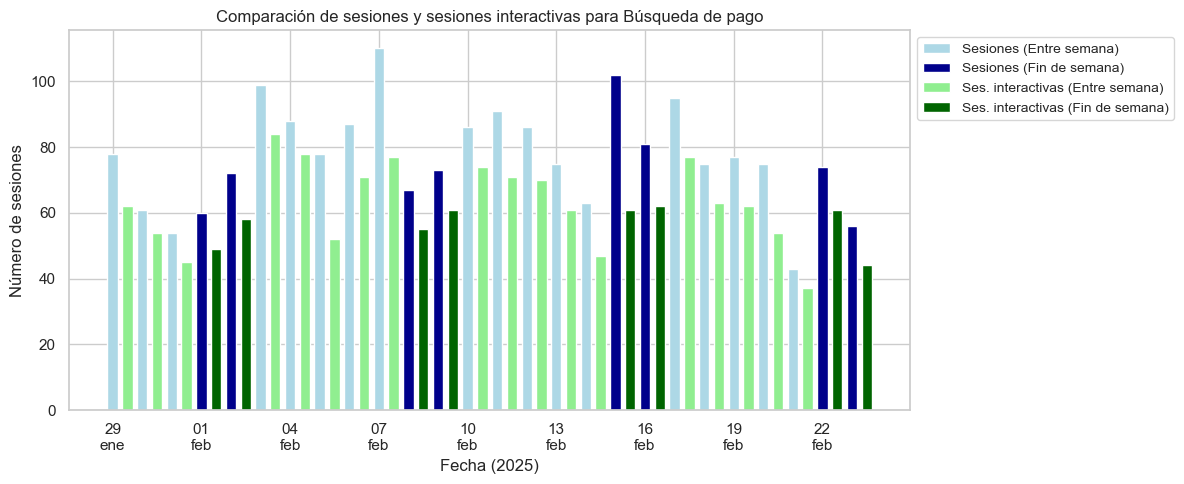

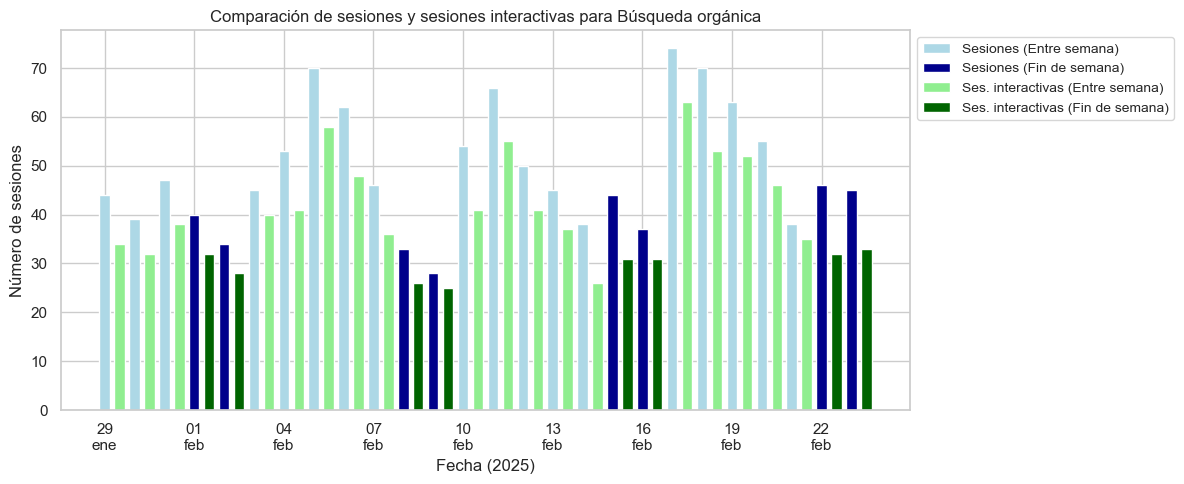

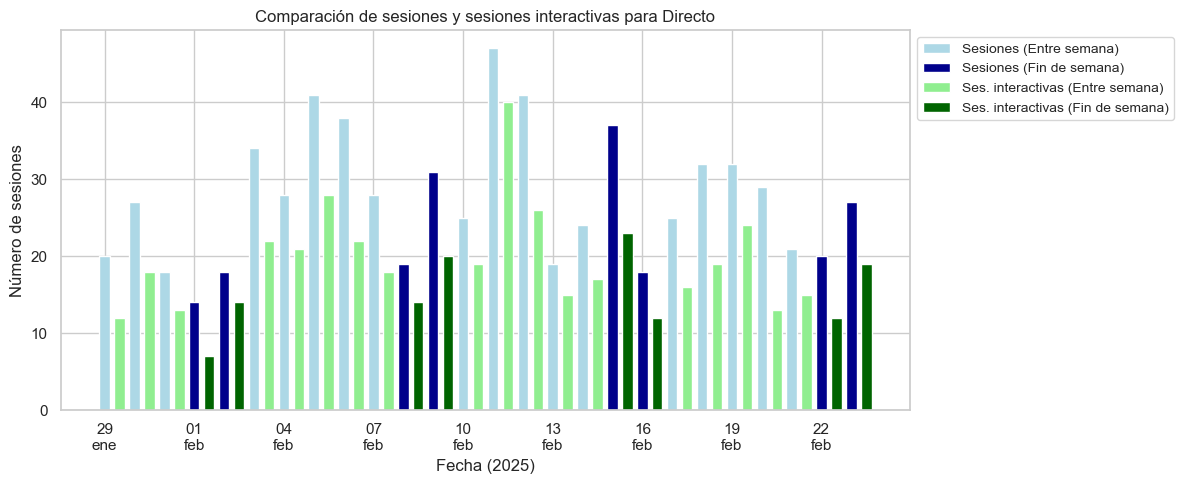

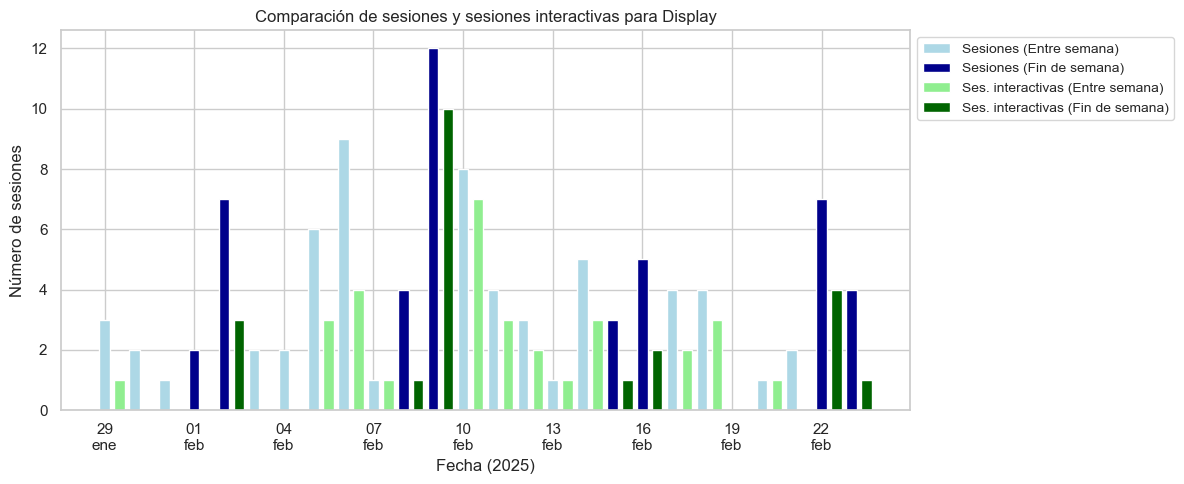

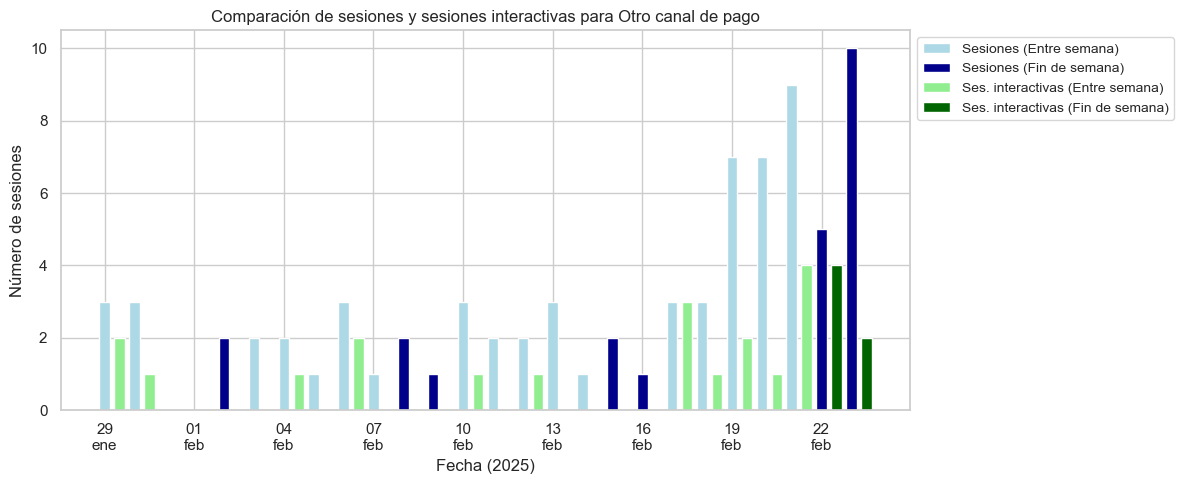

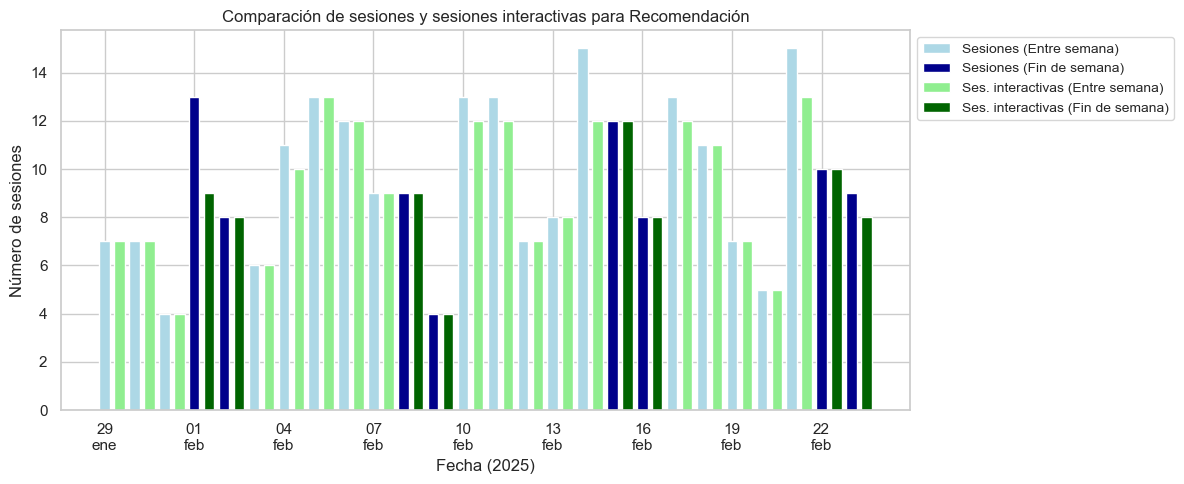

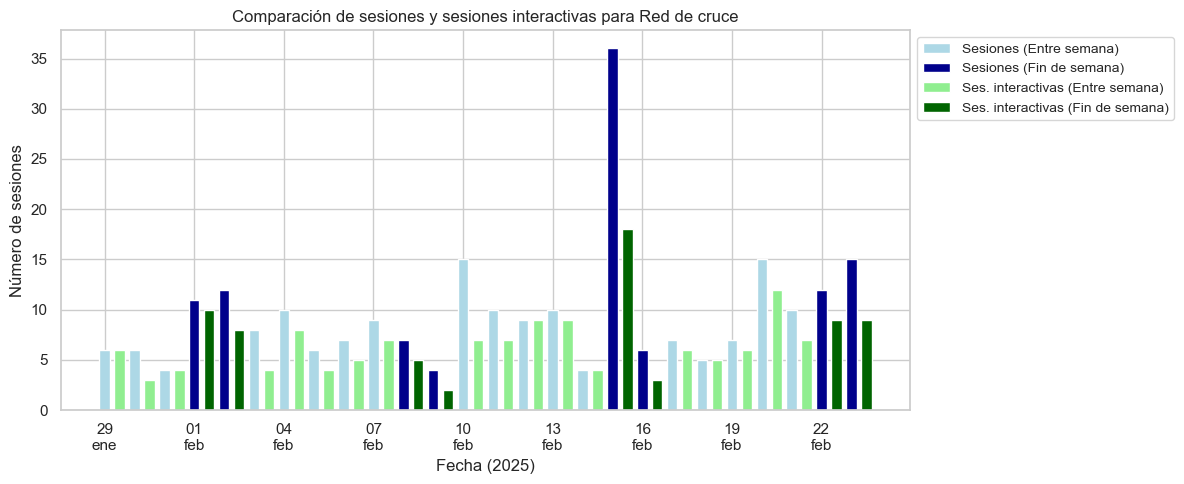

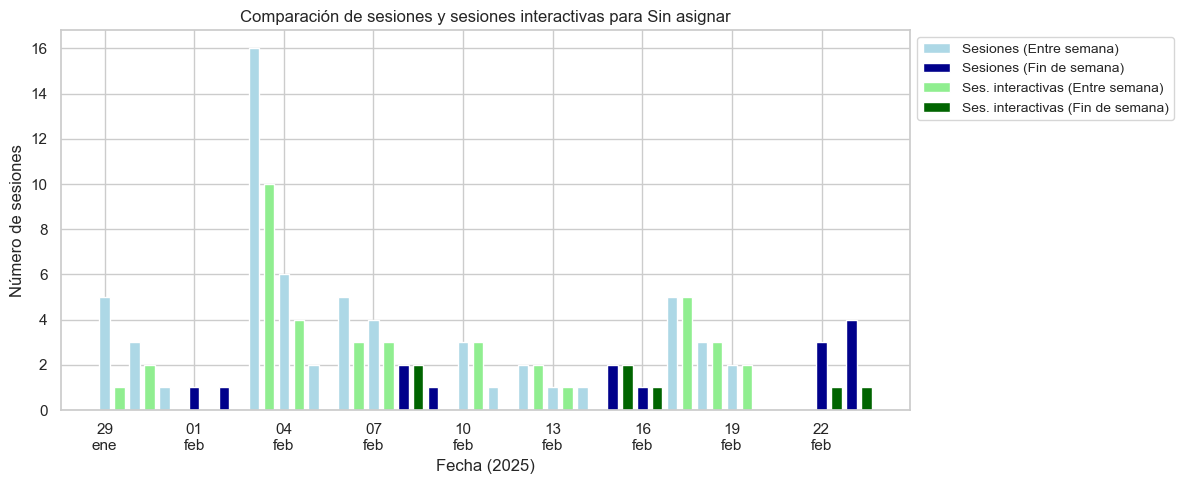

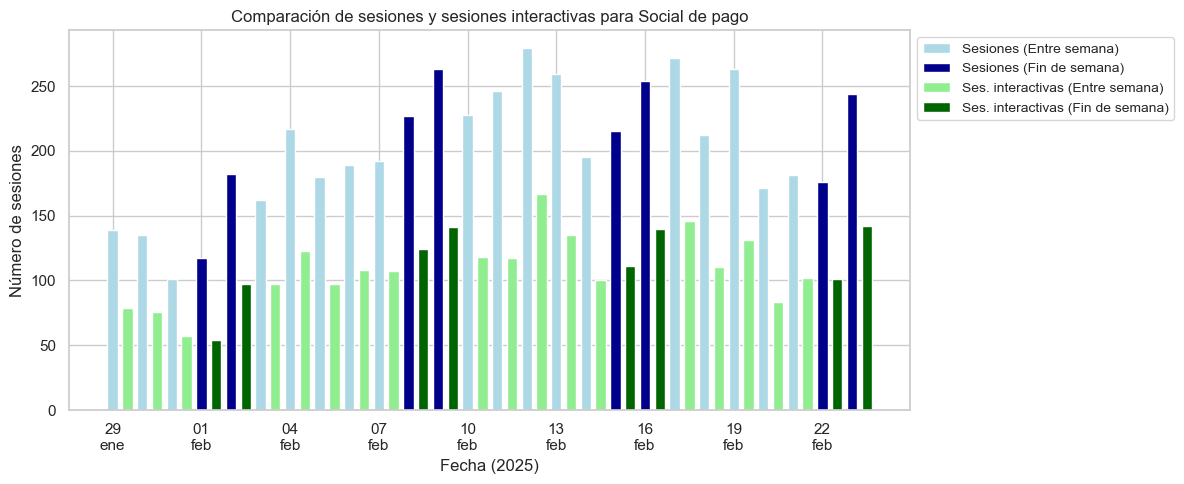

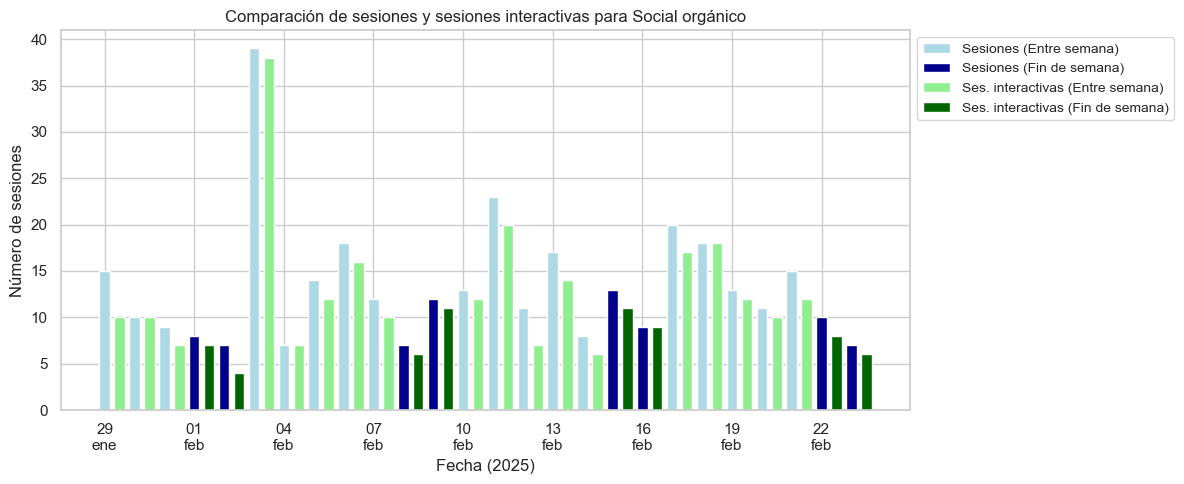

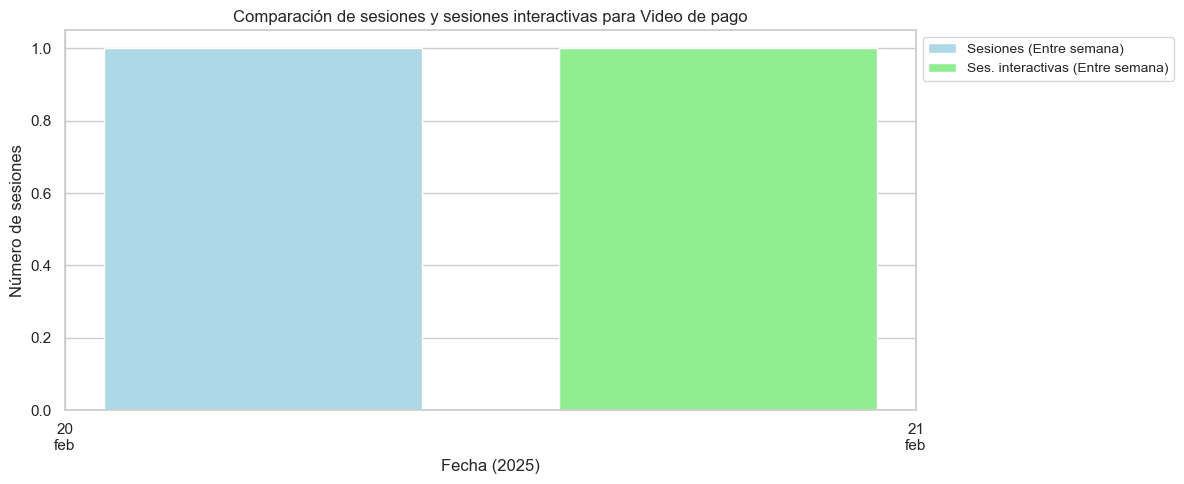

In [194]:
# Aggregate data by 'Canal' and 'Fecha'
aggregated_channels = channels.groupby(['Canal', 'Fecha']).sum().reset_index()

# Get unique channels
unique_channels = aggregated_channels['Canal'].unique()

# Plotting for each channel
for channel in unique_channels:
    # Filter data for the current channel
    channel_data = aggregated_channels[aggregated_channels['Canal'] == channel]
    
    # Plotting
    plt.figure(figsize=(12, 5))
    sns.set(style="whitegrid")
    
    # Create a bar plot
    bar_width = 0.35
    
    # Plot sessions
    for i, (fecha, sesiones) in enumerate(zip(channel_data['Fecha'], channel_data['Sesiones'])):
        color = 'darkblue' if fecha.weekday() >= 5 else 'lightblue'
        plt.bar(fecha, sesiones, bar_width, color=color, label='Sesiones (Fin de semana)' if fecha.weekday() >= 5 else 'Sesiones (Entre semana)')
    
    # Plot interactive sessions
    for i, (fecha, sesiones_interactivas) in enumerate(zip(channel_data['Fecha'], channel_data['Sesiones interactivas'])):
        color = 'darkgreen' if fecha.weekday() >= 5 else 'lightgreen'
        plt.bar(fecha + pd.Timedelta(days=0.5), sesiones_interactivas, bar_width, color=color, label='Ses. interactivas (Fin de semana)' if fecha.weekday() >= 5 else 'Ses. interactivas (Entre semana)')
    
    # Format x-axis
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=3))
    
    # Add labels and title
    plt.xlabel('Fecha (2025)')
    plt.ylabel('Número de sesiones')
    plt.title(f'Comparación de sesiones y sesiones interactivas para {channel}')
    plt.xticks()
    
    # Add legend with reduced font size and position it closer to the plot
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), fontsize='small', loc='upper left', bbox_to_anchor=(1, 1), ncol=1)
    
    # Show plot
    plt.tight_layout()
    plt.show()

Análisis detallado de Sesiones por Canal:

Búsqueda de Pago:
- Patrón consistente entre semana (80-110 sesiones)
- Pico notable 16 feb (100+ sesiones)
- Ratio interacción ~75-80%
- Correlación con campañas Google Ads exitosas
- Mejor rendimiento en días laborables

Social de Pago:
- Mayor volumen (150-250 sesiones)
- Picos en fines de semana (hasta 279 sesiones)
- Ratio interacción ~60%
- Refleja éxito de campañas Meta
- Patrón claro de uso en fin de semana

Búsqueda Orgánica:
- Base estable (40-70 sesiones)
- Mejor ratio interacción (~85%)
- Pico 19 feb (74 sesiones)
- Complementa tráfico paid
- Más estable que canales pagados

Patrones temporales:
1. Entre Semana:
- Domina búsqueda de pago
- Mayor engagement general
- Mejor conversión

2. Fin de Semana:
- Destaca social paid
- Volumen alto pero menor interacción
- Enfoque awareness

Canales Secundarios:
- Display: Muy volátil (1-12 sesiones)
- Directo: Consistente pero bajo (15-40 sesiones)
- Recomendación: Estable (8-15 sesiones)

Recomendaciones:
1. Optimizar presupuesto paid según días/horarios
2. Fortalecer SEO por alta calidad de interacción
3. Reevaluar estrategia display
4. Mantener mix actual social/search paid

##### 2.3 GRÁFICA DE PORCENTAJE DE REBOTE POR CANAL

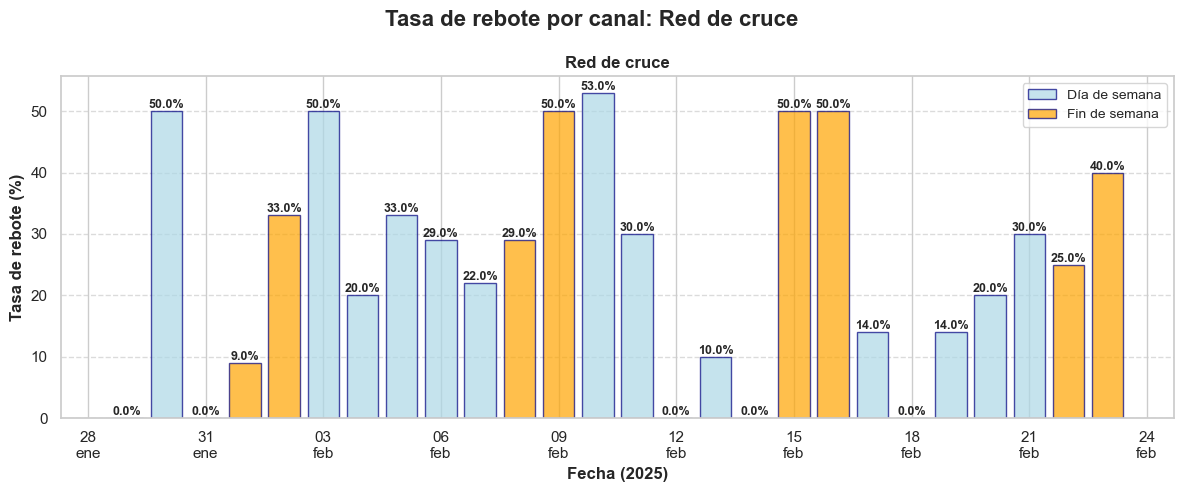

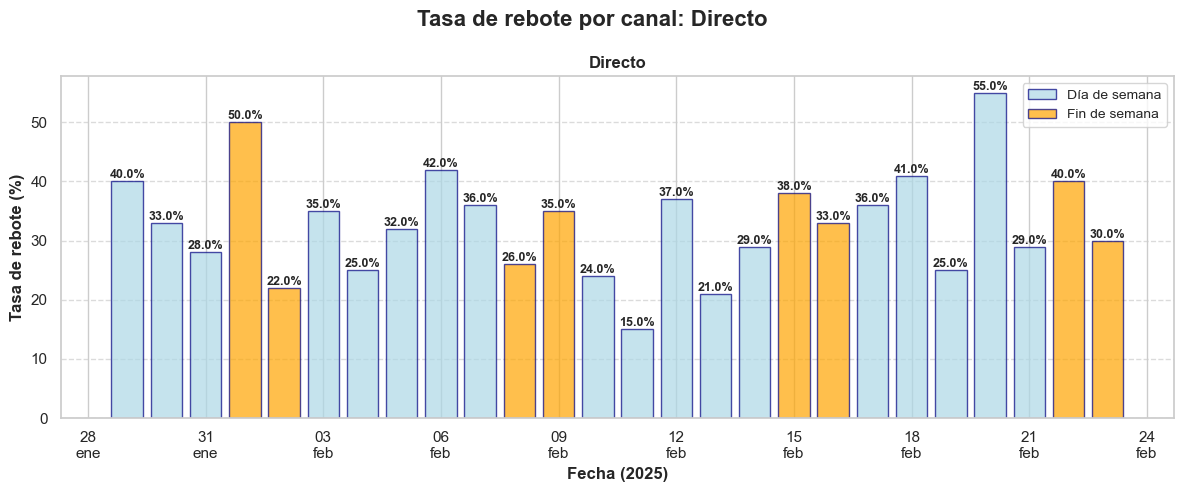

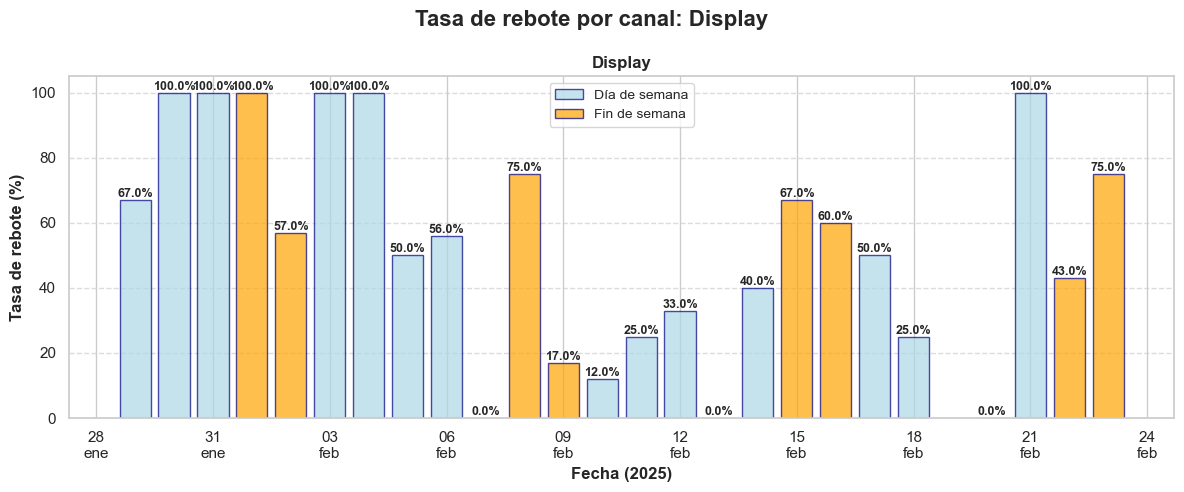

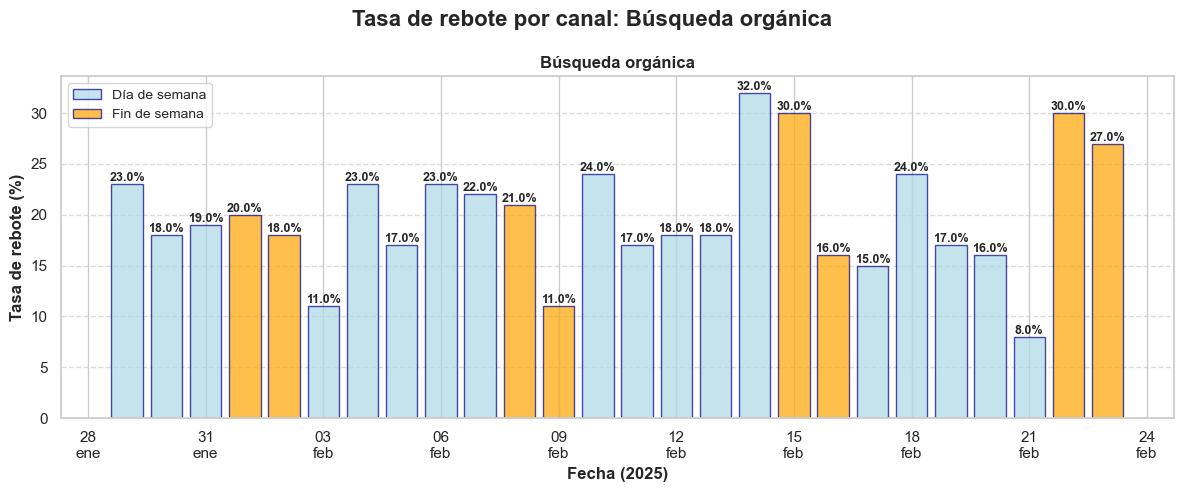

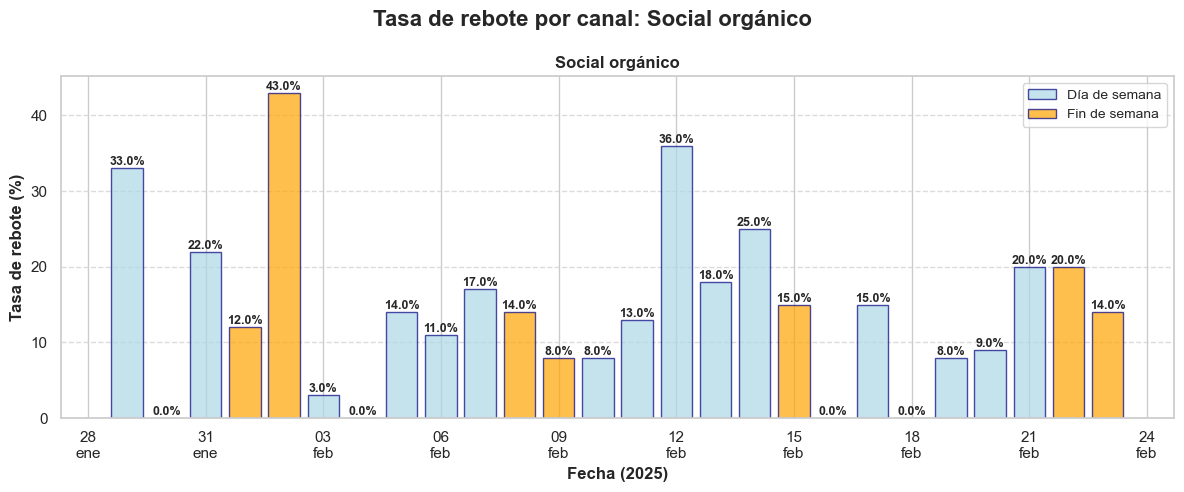

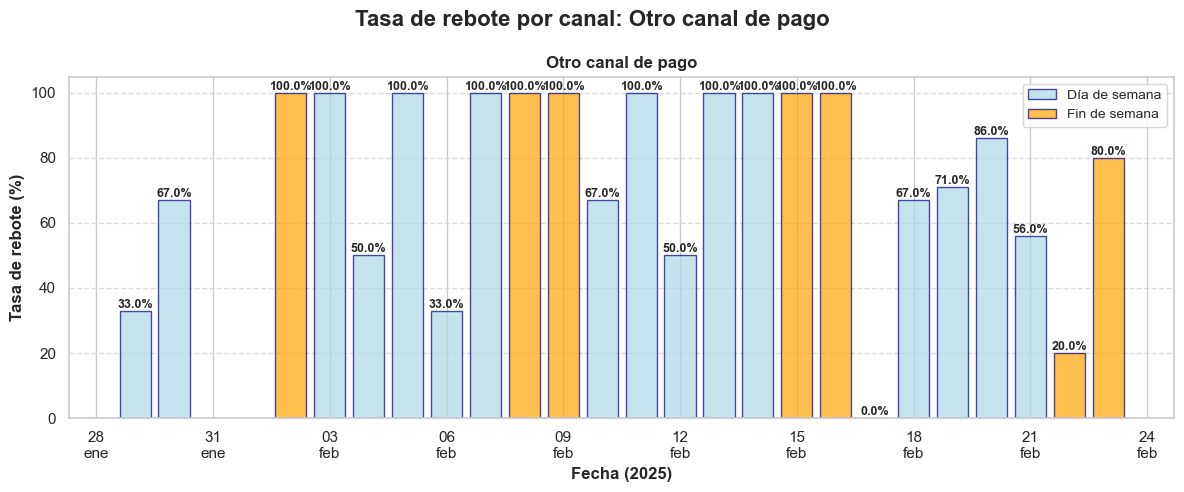

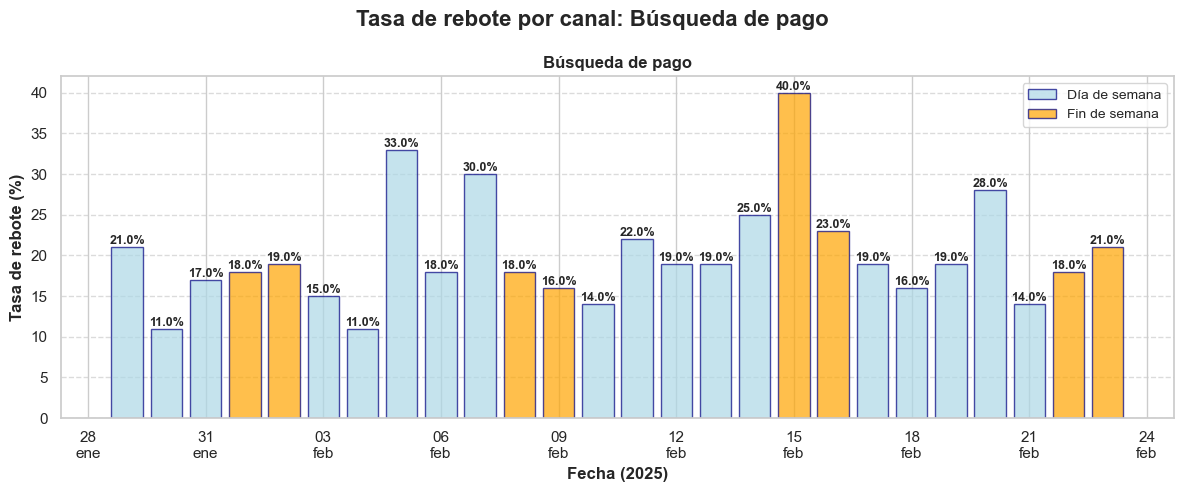

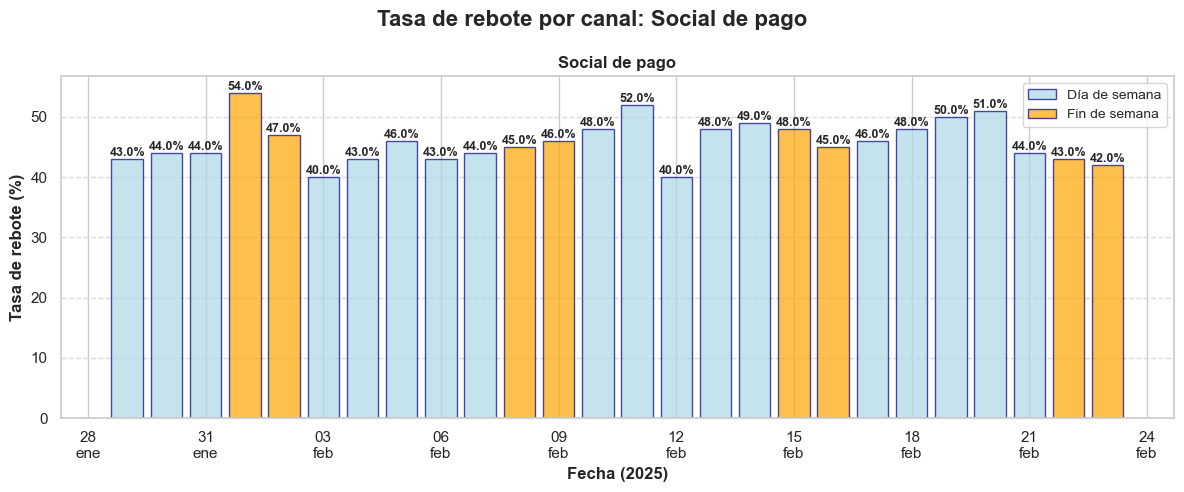

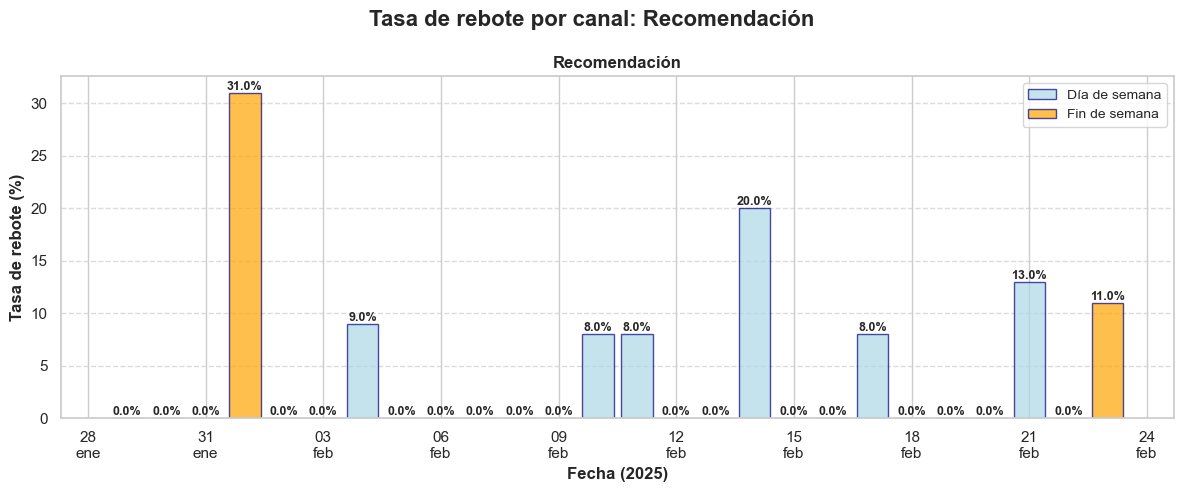

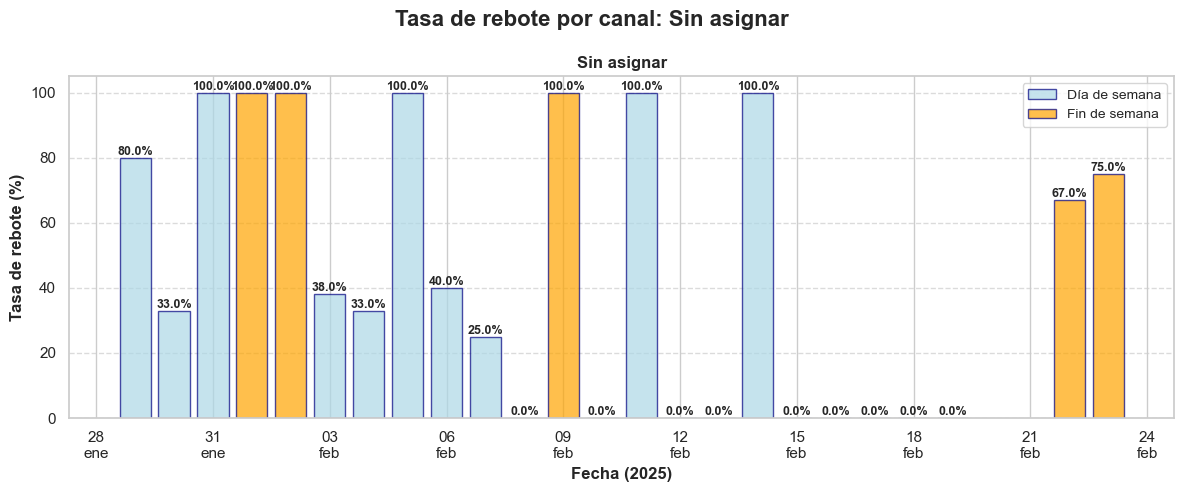

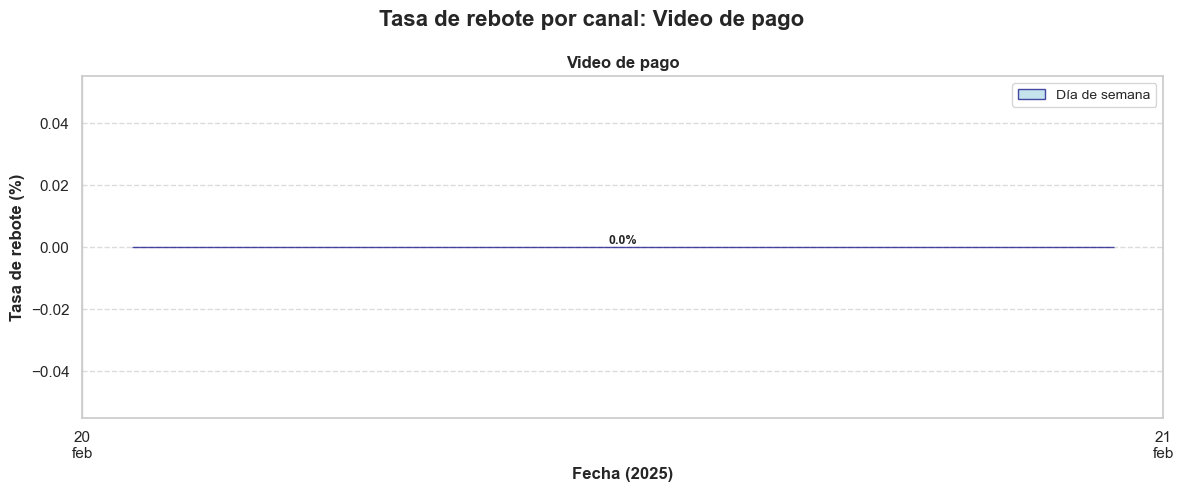

In [195]:
# Create a plot for each unique channel
unique_channels = channels['Canal'].unique()

# Iterate through each channel
for channel in unique_channels:
    # Create a new figure for each channel with the specified size
    fig, ax = plt.subplots(figsize=(12, 5))
    fig.suptitle(f'Tasa de rebote por canal: {channel}', fontsize=16, fontweight='bold')

    # Filter data for the specific channel
    channel_data = channels[channels['Canal'] == channel]
    
    # Bar plot of bounce rate with gradient color
    for fecha, rebote in zip(channel_data['Fecha'], channel_data['% Rebote']):
        color = 'orange' if fecha.weekday() >= 5 else 'lightblue'
        ax.bar(fecha, rebote * 100, color=color, edgecolor='navy', linewidth=1, alpha=0.7,
               label='Fin de semana' if fecha.weekday() >= 5 else 'Día de semana')
    
    # Format x-axis
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
    
    # Add labels and title
    ax.set_xlabel('Fecha (2025)', fontweight='bold')
    ax.set_ylabel('Tasa de rebote (%)', fontweight='bold')
    ax.set_title(f'{channel}', fontsize=12, fontweight='bold')
    
    # Annotate bars with percentage values
    for bar in ax.patches:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%',
                ha='center', va='bottom', 
                fontsize=9, 
                fontweight='bold')

    # Improve grid
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.set_axisbelow(True)  # Put gridlines behind bars

    # Add legend
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), fontsize='small')

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

Análisis de Tasa de Rebote por Canal:

Social de Pago:
- Tasa más estable (40-52%)
- Mejor rendimiento que media del sector
- Correlación con alta calidad de tráfico Meta
- Refleja éxito de campañas Instagram/Facebook
- Consistente con alto engagement en Meta

Búsqueda de Pago:
- Tasa promedio 15-25% entre semana
- Picos fin de semana hasta 40%
- Mejor que social paid
- Valida calidad de campañas Google Ads
- Confirma eficacia de keywords y targeting

Búsqueda Orgánica:
- Tasa promedio 15-24%
- Más estable que canales pagados
- Mejor rendimiento general
- Refleja calidad de contenido SEO
- Complementa bien estrategia paid

Patrones problemáticos:
1. Display:
   - Tasas extremadamente altas (50-100%)
   - Confirma bajo rendimiento en análisis previo
   - Necesita revisión urgente de estrategia

2. Otros Canales de Pago:
   - Tasas muy variables (20-100%)
   - Inconsistencia en calidad de tráfico
   - Correlaciona con bajo ROI en campañas

Información temporal:
- Entre semana: Mejor rendimiento general
- Fin de semana: Incremento en rebote
- Coincide con patrones de conversión Meta/Google

Recomendaciones:
1. Optimizar landing pages para tráfico social
2. Mantener estrategia actual en search
3. Reevaluar inversión en display
4. Ajustar presupuestos según días/horarios
5. Fortalecer contenido SEO por su buen rendimiento

##### 2.4 GRÁFICA DE NÚMERO DE EVENTOS vs. USUARIOS ACTIVOS POR CANAL

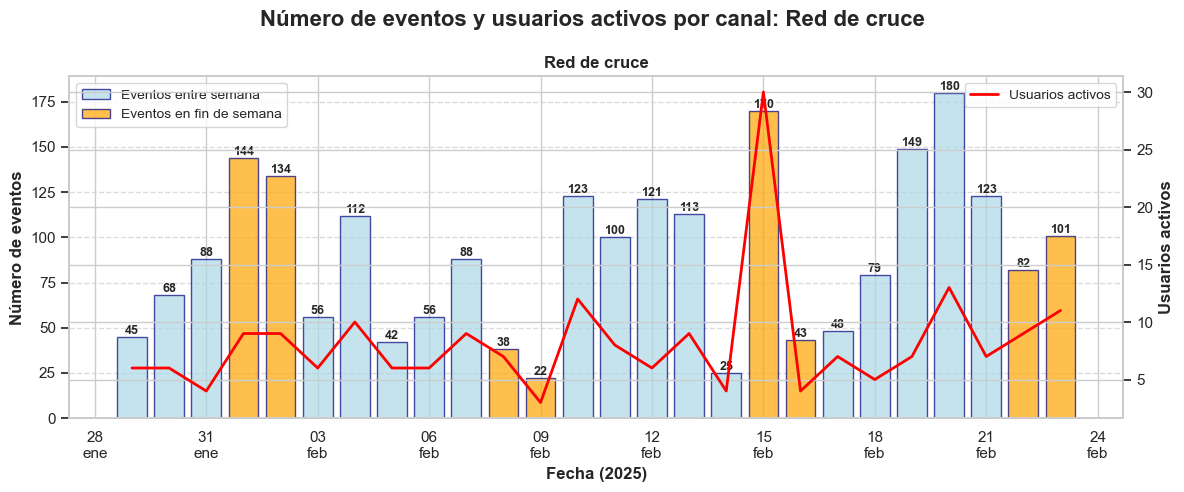

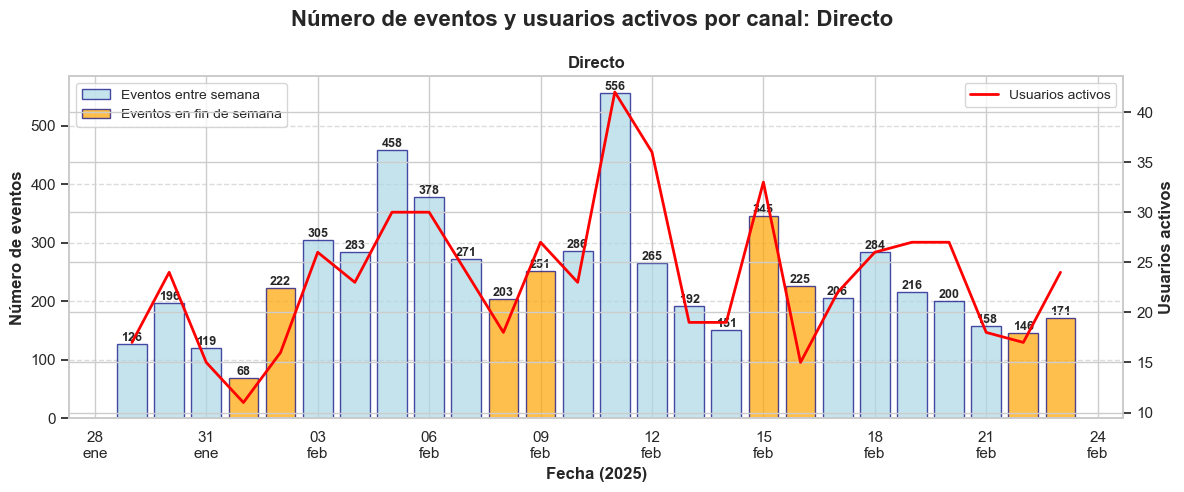

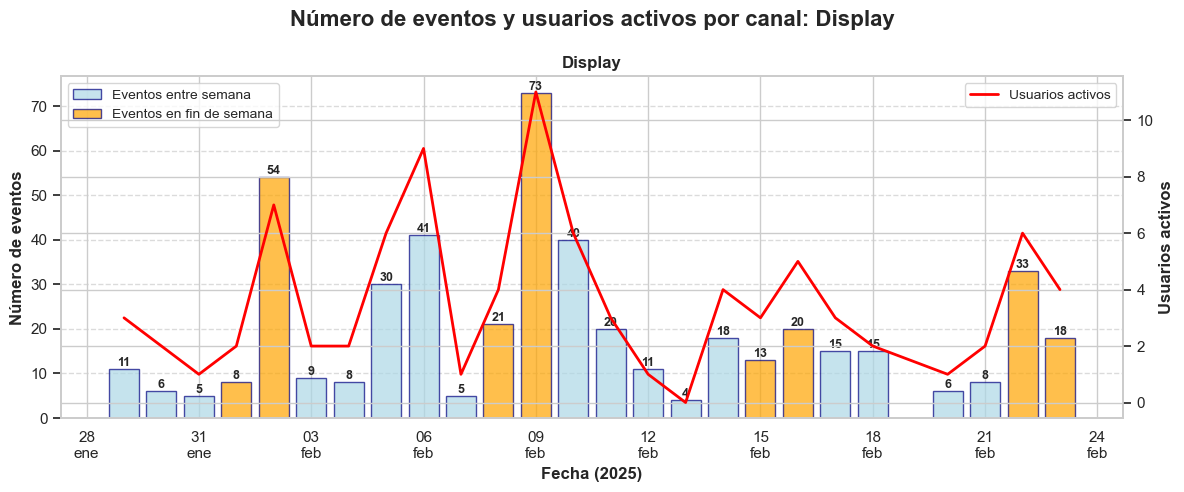

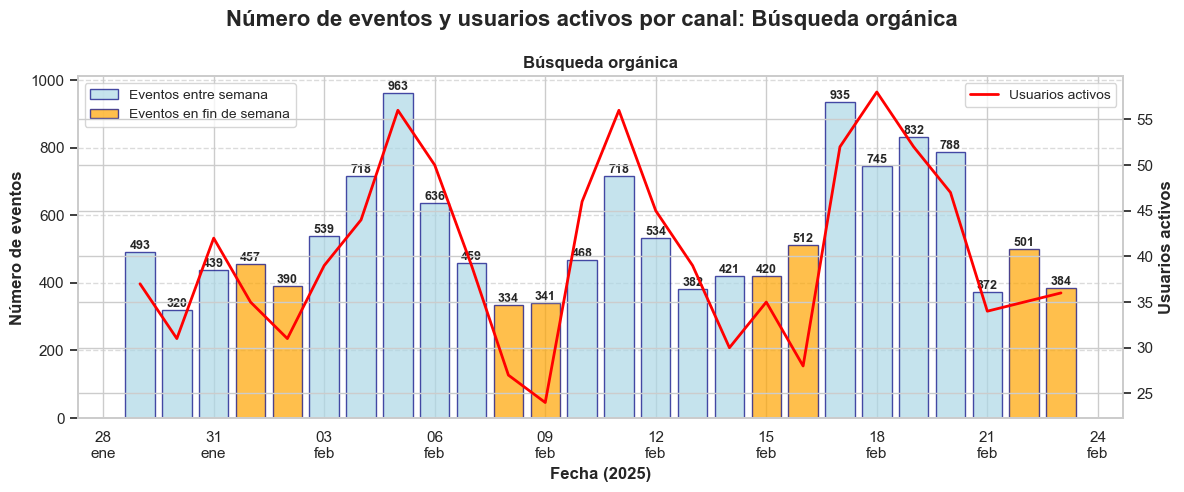

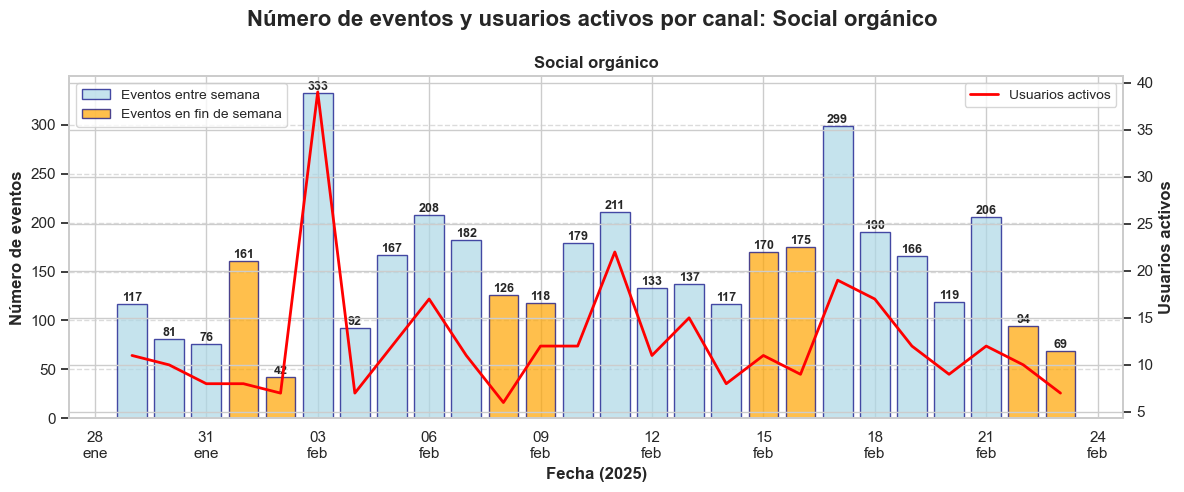

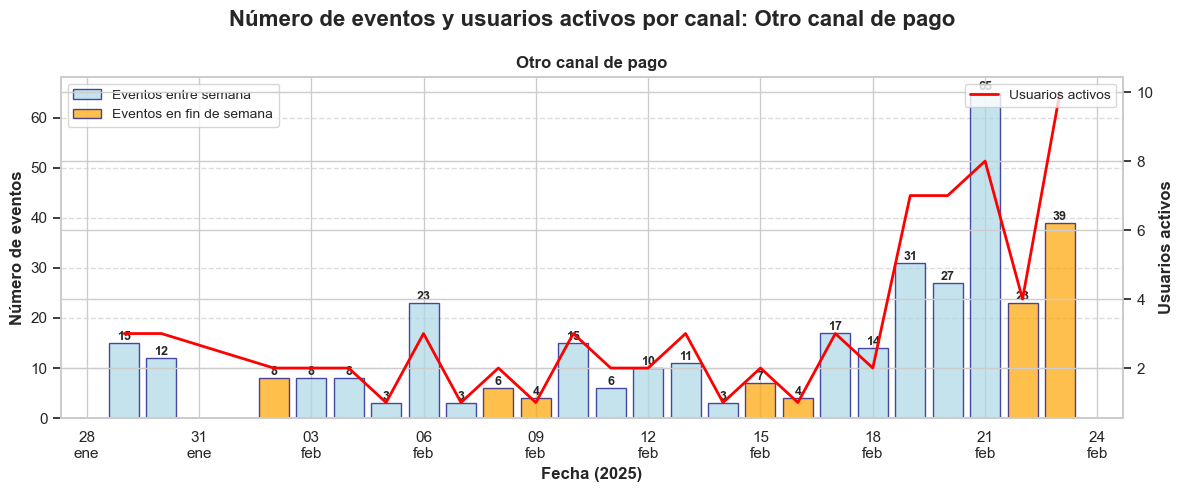

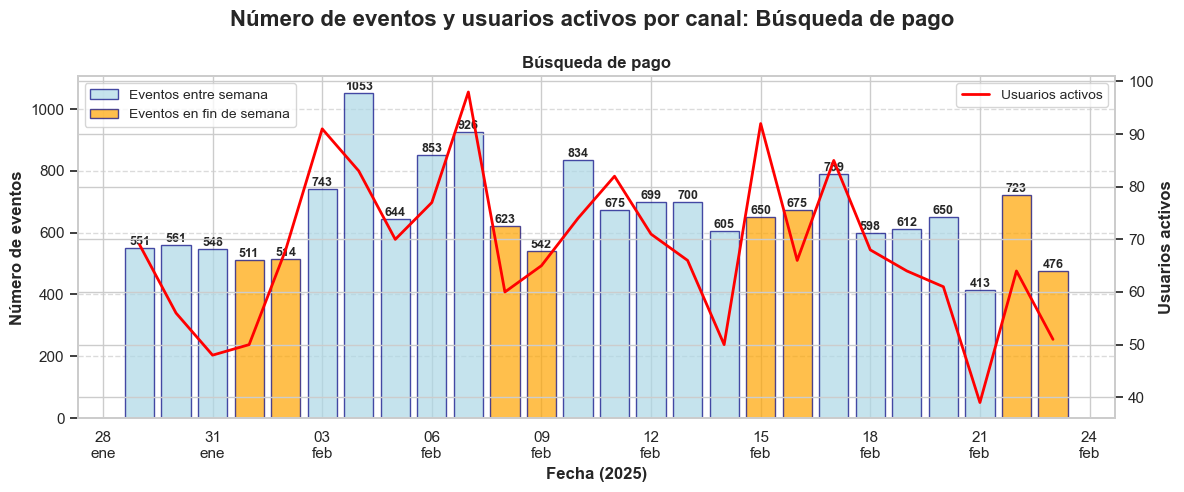

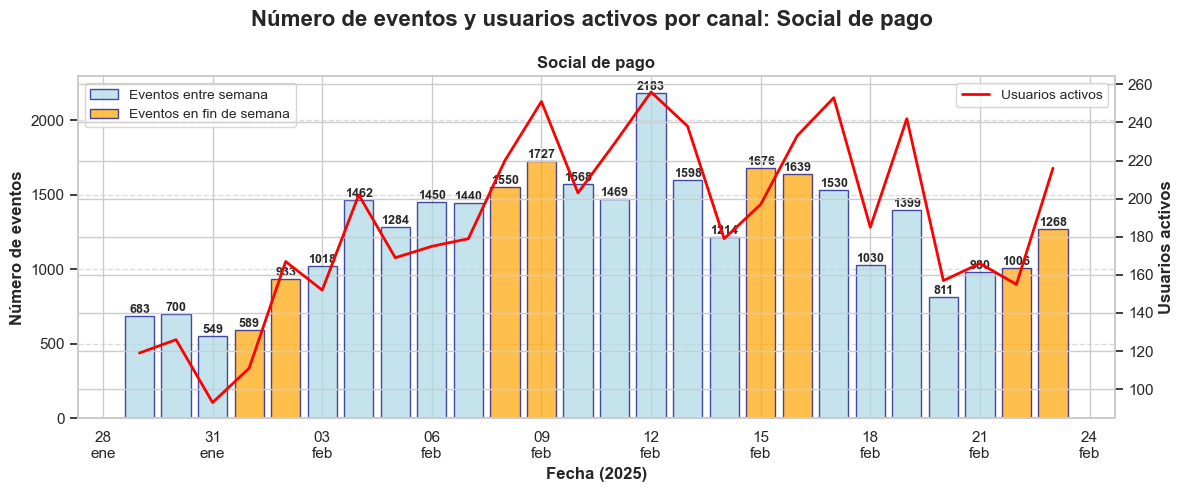

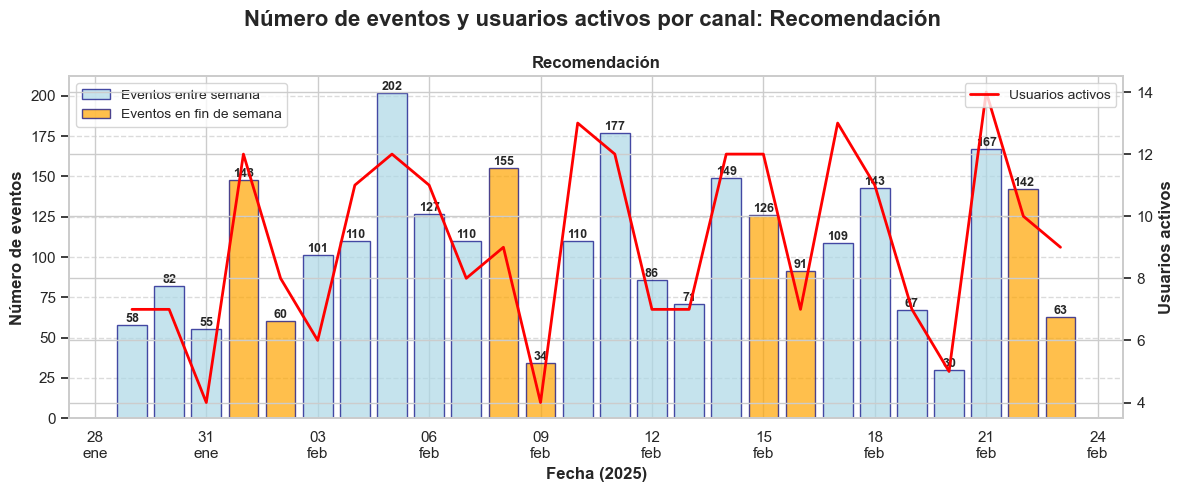

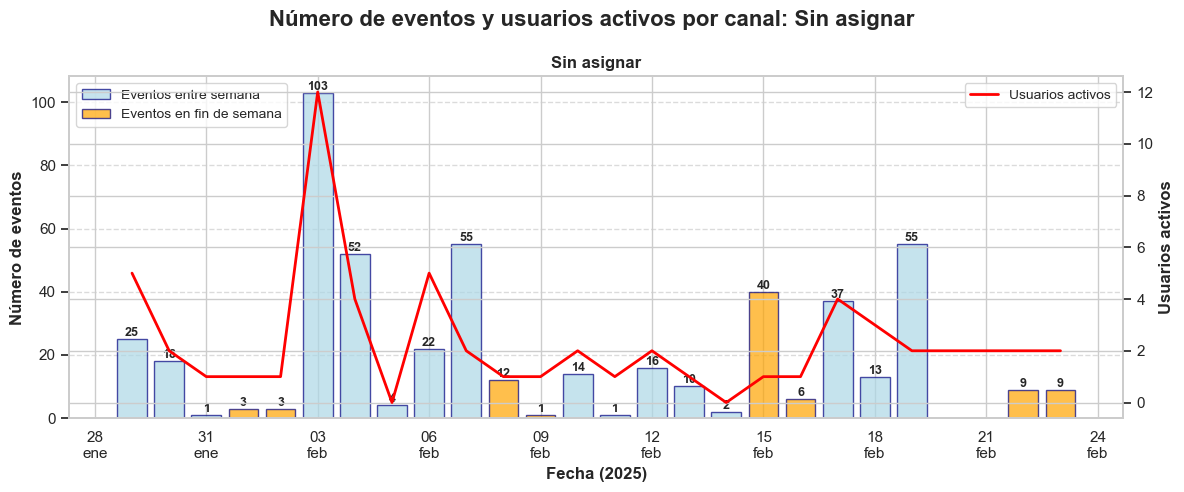

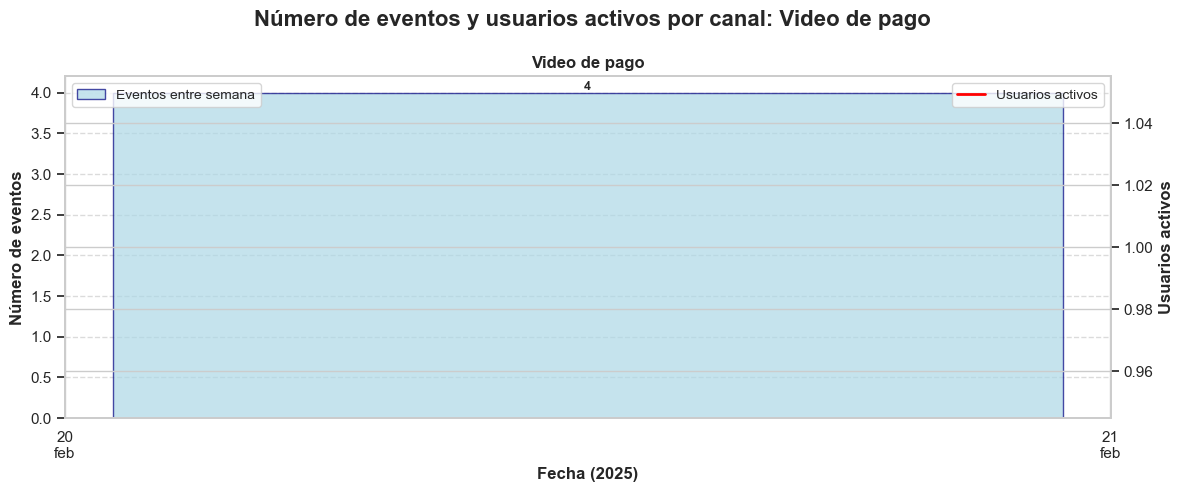

In [196]:
# Create a plot for each unique channel
unique_channels = channels['Canal'].unique()

# Iterate through each channel
for channel in unique_channels:
    # Create a new figure for each channel
    fig, ax1 = plt.subplots(figsize=(12, 5))
    fig.suptitle(f'Número de eventos y usuarios activos por canal: {channel}', fontsize=16, fontweight='bold')

    # Filter data for the specific channel
    channel_data = channels[channels['Canal'] == channel]
    
    # Create twin axis
    ax2 = ax1.twinx()
    
    # Bar plot of number of events
    for fecha, eventos in zip(channel_data['Fecha'], channel_data['Número de eventos']):
        color = 'orange' if fecha.weekday() >= 5 else 'lightblue'
        ax1.bar(fecha, eventos, color=color, edgecolor='navy', linewidth=1, alpha=0.7,
                label='Eventos en fin de semana' if fecha.weekday() >= 5 else 'Eventos entre semana')
    
    # Line plot of active users
    ax2.plot(channel_data['Fecha'], 
             channel_data['Usuarios activos'], 
             color='red', 
             linewidth=2,
             label='Usuarios activos')
    
    # Format x-axis
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))
    ax1.xaxis.set_major_locator(mdates.DayLocator(interval=3))
    
    # Labels and titles
    ax1.set_xlabel('Fecha (2025)', fontweight='bold')
    ax1.set_ylabel('Número de eventos', fontweight='bold')
    ax2.set_ylabel('Usuarios activos', fontweight='bold')
    ax1.set_title(f'{channel}', fontsize=12, fontweight='bold')
    
    # Annotate bars with event numbers
    for bar in ax1.patches:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                 f'{height:.0f}',
                 ha='center', va='bottom', 
                 fontsize=9, 
                 fontweight='bold')
    
    # Improve grid
    ax1.grid(axis='y', linestyle='--', alpha=0.7)
    ax1.set_axisbelow(True)
    
    # Add legends
    handles, labels = ax1.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax1.legend(by_label.values(), by_label.keys(), loc='upper left', fontsize='small')
    ax2.legend(['Usuarios activos'], loc='upper right', fontsize='small')

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

Análisis de Eventos y Usuarios Activos por Canal:

Social de Pago:
- Mayor volumen: 1,500-2,100 eventos diarios
- 180-260 usuarios activos
- Picos en días laborables (12 feb: 2,183 eventos)
- Correlación directa con inversión Meta
- Refleja éxito de campañas Instagram/Facebook
- Ratio eventos/usuario ~8-10

Búsqueda de Pago:
- 600-1,000 eventos diarios
- 60-90 usuarios activos
- Mejor ratio eventos/usuario (~12)
- Valida calidad de tráfico Google Ads
- Picos coinciden con mayores inversiones
- Mejor calidad de interacción

Búsqueda Orgánica:
- Base estable: 400-900 eventos
- 35-55 usuarios activos
- Picos notables (18 feb: 935 eventos)
- Complementa efectivamente tráfico paid
- Ratio eventos/usuario ~15 (mejor rendimiento)

Patrones temporales:
1. Entre Semana:
- Mayor actividad en social paid y search
- Mejor calidad de interacción
- Correlación con horarios laborales

2. Fin de semana:
- Menor volumen pero usuarios más activos
- Social paid mantiene rendimiento
- Búsqueda orgánica más estable

Canales secundarios:
- Display: Muy volátil, pocos eventos
- Directo: Picos ocasionales (556 eventos máximo)
- Video pago: Rendimiento marginal

Recomendaciones:
1. Optimizar presupuesto paid en días/horarios de mayor actividad
2. Fortalecer contenido SEO por alta calidad de interacción
3. Reevaluar estrategia de canales secundarios
4. Potenciar social paid en horarios de mayor engagement
5. Mejorar tracking de eventos para reducir "Sin asignar"

In [197]:
channels.to_csv('/Users/cesarchaparro/Desktop/GitHub/Chapoteos/analytics_data/analytics/primer_proyecto/channels.csv', index=False)

In [198]:
# Group by 'Fecha' and 'Categoría de página' and aggregate 'Clics'
aggregated_landing_page_data = landing_page_metrics.groupby(['Fecha', 'Categoría de página'])['Clics'].sum().reset_index()

# Display the aggregated DataFrame
aggregated_landing_page_data.head()

Fecha     Categoría de página  Clics
0 2025-01-29     Artículos generales      2
1 2025-01-29                Campañas     10
2 2025-01-29  Categorías de producto      0
3 2025-01-29         Clases y cursos     71
4 2025-01-29        Contacto / F.A.Q      2

##### 2.5 GRÁFICA DE CLICS DIARIOS POR CATEGORÍA DE PÁGINA

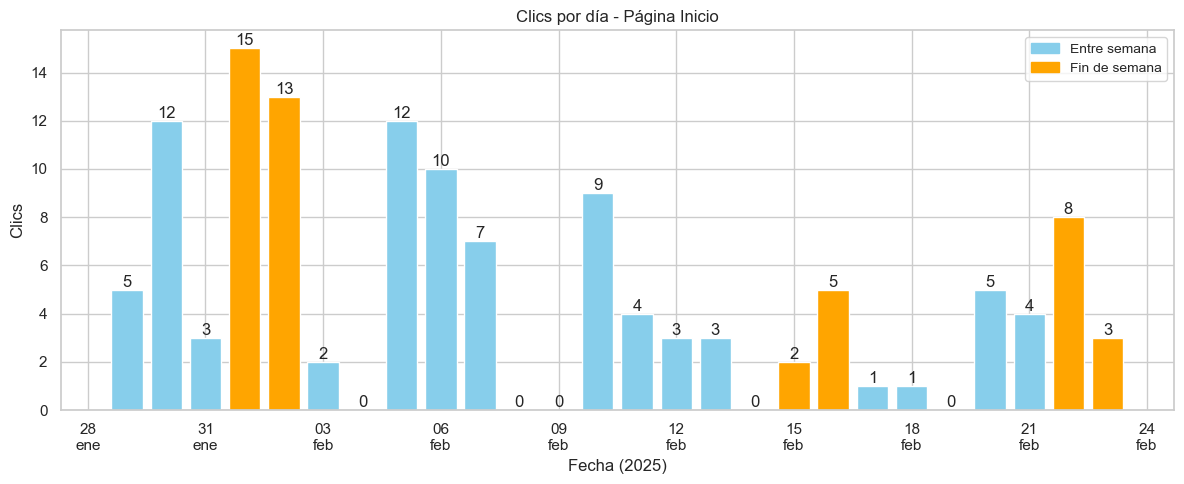

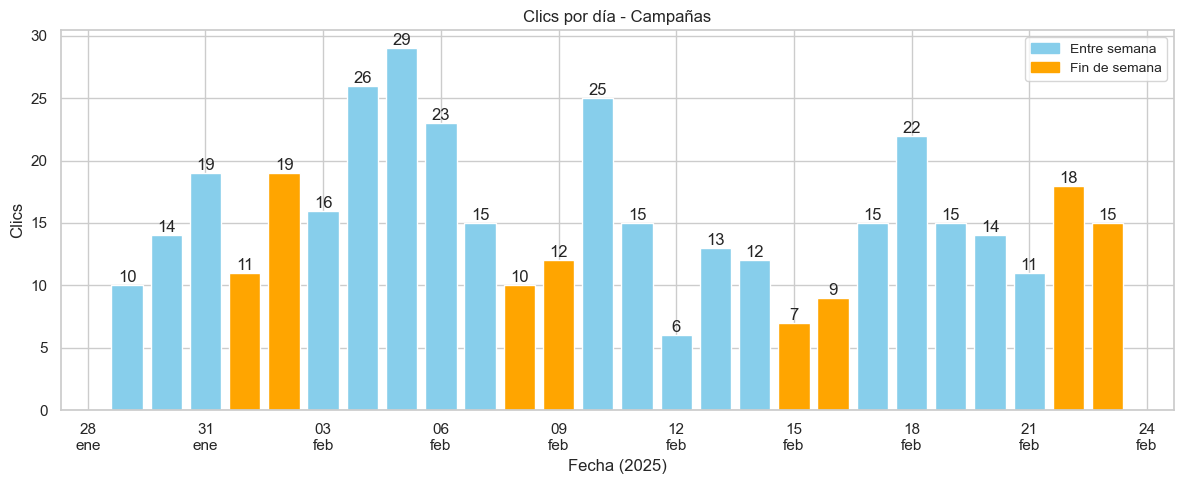

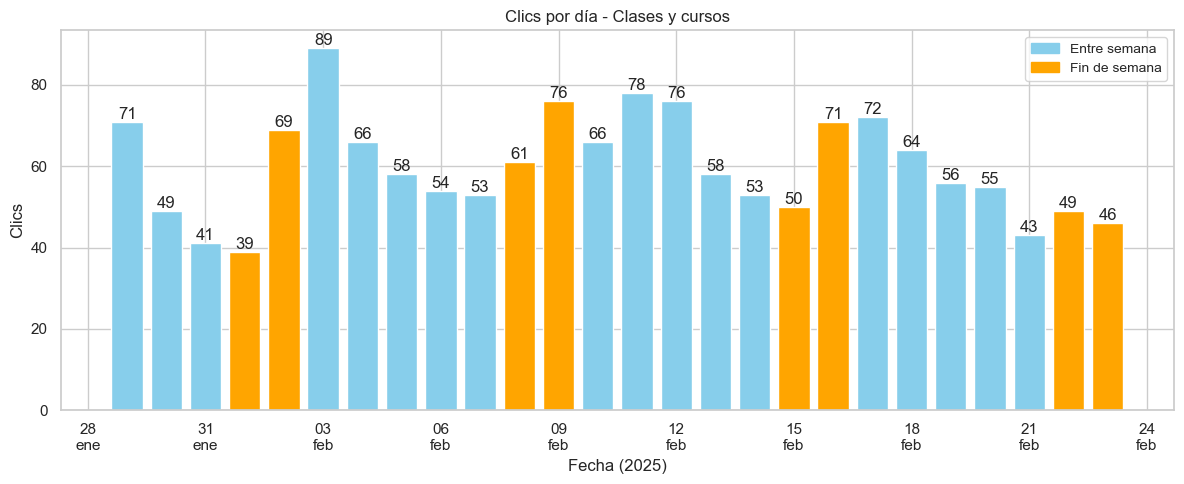

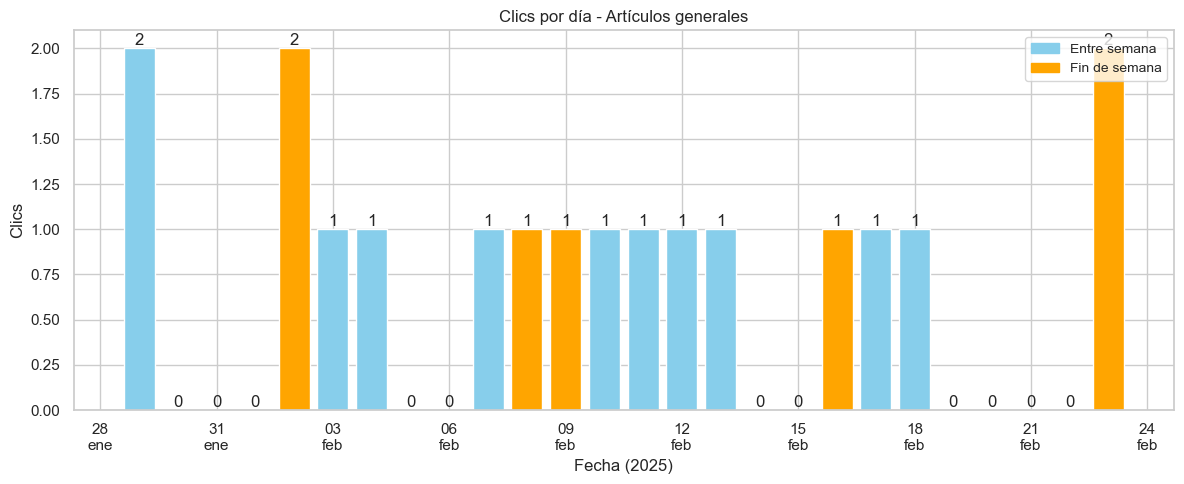

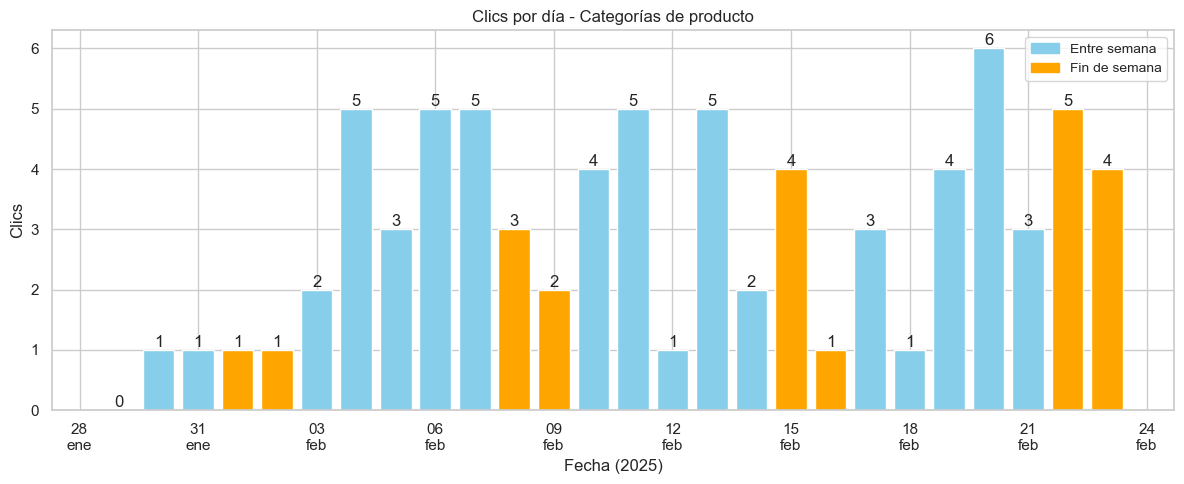

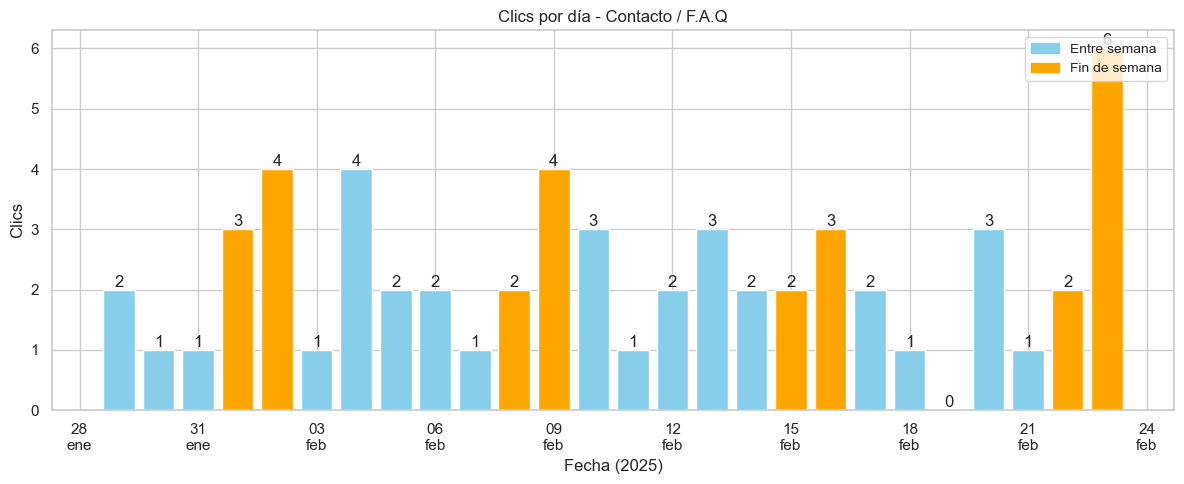

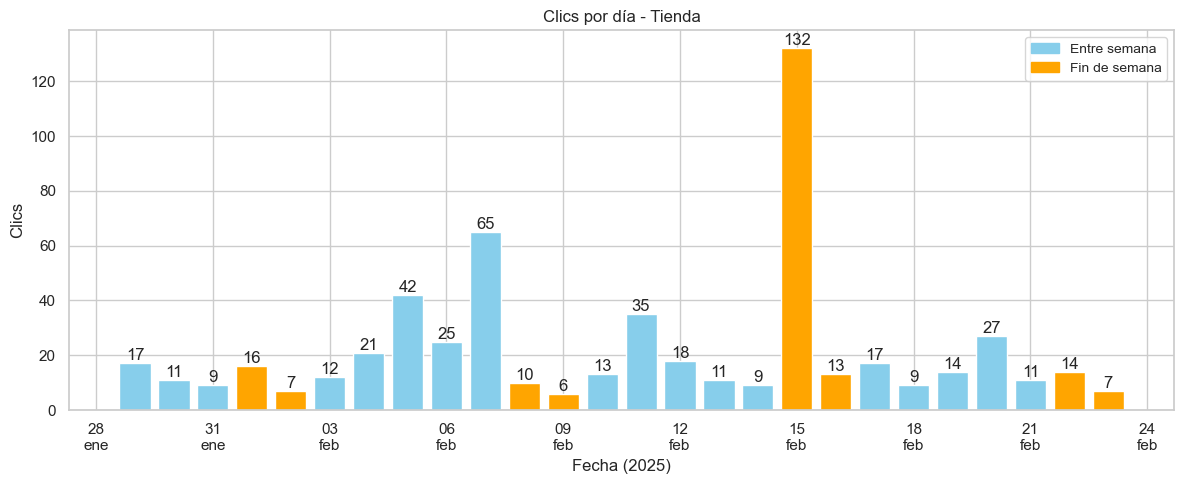

In [199]:
# Get unique categories
categories = landing_page_metrics['Categoría de página'].unique()

# Create a plot for each category
for category in categories:
    # Filter data for the current category
    category_data = landing_page_metrics[landing_page_metrics['Categoría de página'] == category]
    
    # Group by 'Fecha' and sum 'Clics'
    aggregated_category_data = category_data.groupby('Fecha')['Clics'].sum()
    
    # Plot
    plt.figure(figsize=(12, 5))
    
    # Create bar plot with different colors for weekends
    bars = []
    for date, value in aggregated_category_data.items():
        color = 'orange' if date.weekday() >= 5 else 'skyblue'
        bars.append(plt.bar(date, value, color=color))
    
    # Format x-axis
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=3))
    
    # Customize the plot
    plt.title(f'Clics por día - {category}')
    plt.xlabel('Fecha (2025)')
    plt.ylabel('Clics')
    
    # Annotate bars with values
    for bar in bars:
        height = bar[0].get_height()
        plt.text(bar[0].get_x() + bar[0].get_width()/2., height,
                 f'{height:.0f}',
                 ha='center', va='bottom')
    
    # Create legend
    weekday_patch = mpatches.Patch(color='skyblue', label='Entre semana')
    weekend_patch = mpatches.Patch(color='orange', label='Fin de semana')
    plt.legend(handles=[weekday_patch, weekend_patch], loc='upper right', fontsize='small')
    
    plt.tight_layout()
    
    # Show the plot
    plt.show()

Análisis de Clics por Categoría de Página:

Clases y Cursos:
- Mayor volumen: 40-89 clics diarios
- Pico notable 3 feb (89 clics)
- Estabilidad entre semana (55-75 clics)
- Correlación con éxito campañas Matronatación
- Refleja efectividad de Google Ads en búsquedas específicas

Tienda:
- Pico extraordinario 15 feb (132 clics)
- Coincide con promociones Meta
- Base estable 10-25 clics diarios
- Mayor actividad en fines de semana
- Refleja éxito de campañas de conversión

Campañas:
- 15-29 clics diarios entre semana
- Mejor performance inicio febrero
- Correlación con inversión publicitaria
- Alineado con picos de engagement en Meta

Patrones por tipo de contenido:

1. Contenido iformativo:
- Página Inicio: Picos en fines de semana (13-15 clics)
- Artículos generales: Bajo pero constante (1-2 clics)
- Refleja comportamiento de búsqueda orgánica

2. Contenido comercial:
- Contacto/FAQ: Mayor actividad fin de semana
- Categorías producto: Estable 3-6 clics diarios
- Correlación con leads generados en Meta/Google

Información temporal:
- Entre semana: Domina contenido educativo
- Fin de semana: Mayor actividad comercial
- Picos alineados con inversión publicitaria

Recomendaciones:
1. Optimizar landing pages de cursos
2. Potenciar contenido comercial en fines de semana
3. Alinear promociones con picos de tráfico
4. Mejorar CTAs en páginas informativas
5. Reforzar contenido de categorías de producto

***

##### 3. CONVERSIÓN

##### * Acciones de conversión (2 categorías de acciones)

##### Definición de conversión: una acción específica y valiosa realizada por un usuario que cumple con un objetivo predefinido importante para el negocio.



In [200]:
# Read the CSV file into a DataFrame
google_conversions = pd.read_csv('/Users/cesarchaparro/Desktop/GitHub/Chapoteos/analytics_data/analytics/primer_proyecto/conversions_google_ads.csv', sep=',')

# Drop the unwanted column
google_conversions = google_conversions.drop(['Acciones categoria de conversion_x', 'Acciones categoria de conversion_y'], axis=1, errors='ignore')

# Rename columns
google_conversions = google_conversions.rename(columns={
    'Conversion action': 'Acción de conversión', 
    'Conversion category': 'Categoría de conversión', 
    'Conversion source': 'Fuente de conversión', 
    'Day': 'Fecha', 
    'Conversions': 'Conversiones', 
    'Results': 'Resultados'
})

# Reorder the columns to move 'Fecha' to the first position
columns = ['Fecha'] + [col for col in google_conversions.columns if col != 'Fecha']
google_conversions = google_conversions[columns]

# Mapping of conversion actions in English to Spanish
conversion_mapping = {
    'Acciones locales: clic en Cómo llegar': 'Clic cómo llegar',
    'Acciones locales: otras expansiones': 'Otras expansiones',
    'Clics de llamada': 'Clics de llamada',
    'Formulario Pag Gracias- Nat Adultos': 'Formulario natación adultos',
    'Formulario- Pa Gracias Matronatación': 'Formulario matronatación',
    'Formulario- Pag Gracias Bebes Natación': 'Formulario bebés natación',
    'Formulario- Pag Gracias Chapoteos': 'Formulario chapoteos',
    'Formulario- Pag Gracias Nat Embarazo': 'Formulario natación embarazo',
    'Formulario- Pag Gracias Nat Infantil': 'Formulario natación infantil',
    'Llamadas desde anuncios': 'Llamadas desde anuncios',
}

# Rename the values in the 'Accion de conversión' column
google_conversions['Acción de conversión'] = google_conversions['Acción de conversión'].replace(conversion_mapping)

# Mapping of conversion category in English to Spanish
category_mapping = {
    'Get directions': 'Obtener dirección',
    'Engagement': 'Engagement',
    'Contact': 'Contacto',
    'Submit lead form': 'Envío de formulario',
    'Phone call lead': 'Llamada de teléfono'
}

# Rename the values in the 'Conversion category' column
google_conversions['Categoría de conversión'] = google_conversions['Categoría de conversión'].replace(category_mapping)

# Mapping of Fuente de conversión in English to Spanish
fuente_mapping = {
    'Google hosted': 'Alojado por Google',
    'Website': 'Sitio web',
    'Calls from ads': 'Llamadas desde anuncios',
}

# Rename the values in the 'Fuente de conversión' column
google_conversions['Fuente de conversión'] = google_conversions['Fuente de conversión'].replace(fuente_mapping)

# Convert 'Fecha' to datetime
google_conversions['Fecha'] = pd.to_datetime(google_conversions['Fecha'])

# Display the first few rows of the DataFrame
google_conversions.head()

Fecha Acción de conversión Categoría de conversión  \
0 2025-01-29     Clic cómo llegar       Obtener dirección   
1 2025-01-30     Clic cómo llegar       Obtener dirección   
2 2025-01-31     Clic cómo llegar       Obtener dirección   
3 2025-02-01     Clic cómo llegar       Obtener dirección   
4 2025-02-02     Clic cómo llegar       Obtener dirección   

   Acciones categoría de conversión Fuente de conversión  Conversiones  \
0                                 6   Alojado por Google           0.0   
1                                 7   Alojado por Google           0.0   
2                                 2   Alojado por Google           0.0   
3                                 6   Alojado por Google           0.0   
4                                 7   Alojado por Google           0.0   

             Resultados  Conversión por categoría  
0  Get directions: 6.00                       179  
1  Get directions: 7.00                       179  
2  Get directions: 2.00                       179  
3  Get directions: 6.00                       179  
4  Get directions: 7.00                       179

In [201]:
# Extract the numeric values from 'Resultados' using regex and convert to integer
#google_conversions['Acciones categoría de conversión'] = (
   # google_conversions['Resultados'].str.extract(r'(\d+\.?\d*)')[0].astype(float).astype(int)
#)

# Reorder the columns to place the new column after 'Categoría de conversión'
#cols = google_conversions.columns.tolist()
#idx = cols.index('Categoría de conversión') + 1
#cols.insert(idx, cols.pop(cols.index('Acciones categoría de conversión')))
#google_conversions = google_conversions[cols]

# Display the modified dataframe
#google_conversions.head()

In [202]:
# Aggregate the sum of 'Acciones categoría de conversión' by 'Fecha' and 'Categoría de conversión'
conversions_subset = google_conversions.groupby(['Fecha', 'Categoría de conversión'], as_index=False)['Acciones categoría de conversión'].sum()

# Display the subset
conversions_subset.head()

Fecha Categoría de conversión  Acciones categoría de conversión
0 2025-01-29                Contacto                                 7
1 2025-01-29              Engagement                                35
2 2025-01-29     Envío de formulario                                 5
3 2025-01-29       Obtener dirección                                 6
4 2025-01-30              Engagement                                 9

In [203]:
# Aggregate the total sum of 'Acciones categoría de conversión' by 'Categoría de conversión'
total_by_category = conversions_subset.groupby('Categoría de conversión', as_index=False)['Acciones categoría de conversión'].sum()

# Display the result
total_by_category

Categoría de conversión  Acciones categoría de conversión
0                Contacto                                38
1              Engagement                               354
2     Envío de formulario                                88
3     Llamada de teléfono                                 1
4       Obtener dirección                               179

##### 3.1 GRÁFICA DE ACCIONES DIARIAS POR CATEGORÍA DE CONVERSIÓN

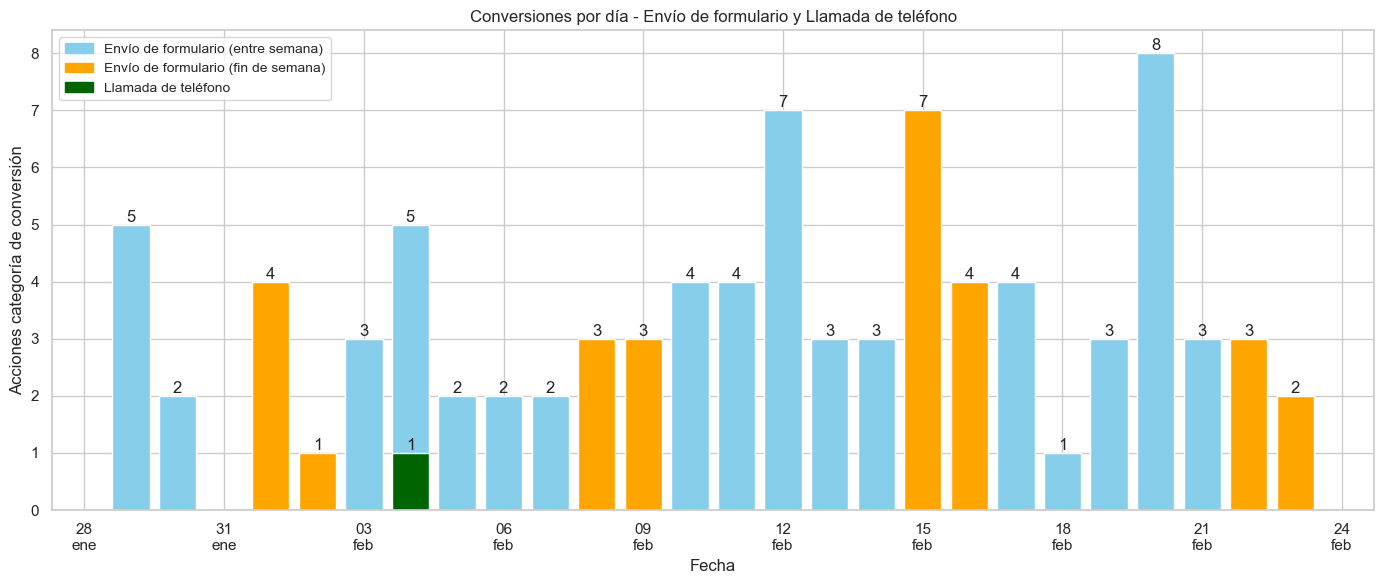

In [204]:
# Filter for specific categories
categories = ['Envío de formulario', 'Llamada de teléfono']

# Filter data for the specified categories
filtered_data = conversions_subset[conversions_subset['Categoría de conversión'].isin(categories)]

# Group by 'Fecha' and 'Categoría de conversión' and sum 'Acciones categoría de conversión'
aggregated_data = filtered_data.groupby(['Fecha', 'Categoría de conversión'])['Acciones categoría de conversión'].sum().unstack()

# Plot
plt.figure(figsize=(14, 6))

# Create bar plot with different colors for weekends
bars = []
for date in aggregated_data.index:
    for category in categories:
        value = aggregated_data.at[date, category]
        if category == 'Envío de formulario':
            color = 'orange' if date.weekday() >= 5 else 'skyblue'
        else:
            color = 'darkgreen'
        bars.append(plt.bar(date, value, color=color, label=f"{category} ({'fin de semana' if date.weekday() >= 5 else 'entre semana'})" if date == aggregated_data.index[0] else ""))

# Format x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=3))

# Customize the plot
plt.title('Conversiones por día - Envío de formulario y Llamada de teléfono')
plt.xlabel('Fecha')
plt.ylabel('Acciones categoría de conversión')

# Annotate bars with values
for bar in bars:
    height = bar[0].get_height()
    if pd.notna(height) and height != float('inf'):
        plt.text(bar[0].get_x() + bar[0].get_width()/2., height,
                 f'{height:.0f}',
                 ha='center', va='bottom')

# Create legend
weekday_patch = mpatches.Patch(color='skyblue', label='Envío de formulario (entre semana)')
weekend_patch = mpatches.Patch(color='orange', label='Envío de formulario (fin de semana)')
call_patch = mpatches.Patch(color='darkgreen', label='Llamada de teléfono')
plt.legend(handles=[weekday_patch, weekend_patch, call_patch], loc='upper left', fontsize='small')

plt.tight_layout()

# Show the plot
plt.show()

##### 3.2 TOTAL DE ACCIONES POR CATEGORÍA DE CONVERSIÓN
- Envío de formulario y Llamada de teléfono con las conversiones finales. El resto de acciones son categorías que llevan a estas conversiones finales.

In [205]:
# Calculate totals by category
total_by_category = google_conversions.groupby('Categoría de conversión', as_index=False)['Acciones categoría de conversión'].sum()

# Rename the sum column to avoid confusion
total_by_category = total_by_category.rename(columns={'Acciones categoría de conversión': 'Acciones categoria de conversion'})

# Merge the totals back to the original dataframe
google_conversions = google_conversions.merge(total_by_category, 
                                            on='Categoría de conversión', 
                                            how='left')

Análisis final del funnel de Conversión:

Rendimiento general:
- Total conversiones: 660 acciones
- Distribución principal:
  * Engagement: 354 (53.6%)
  * Obtener dirección: 179 (27.1%)
  * Formularios: 88 (13.3%)
  * Contacto: 38 (5.7%)
  * Llamadas: 1 (0.15%)

Análisis del funnel:

1. Etapa Awareness (Meta + Google):
- Impresiones totales: 1.36M Instagram, 983K Facebook
- CTR medio: 2.07% Instagram, 0.70% Facebook
- Google Ads: 19K impresiones, CTR 1.2%
- Efectividad campañas reconocimiento marca

2. Consideración:
- Eventos web: 1,500-2,100 diarios
- Mejor rendimiento:
  * Social paid: 180-260 usuarios activos
  * Search paid: 60-90 usuarios activos
- Tasa rebote mejorada en search (15-25%)

3. Conversión final:
- Picos de formularios:
  * Entre semana: 8 conversiones máximo
  * Fin de semana: 7 conversiones máximo
- Correlación directa con:
  * Campañas Matronatación (122 leads)
  * Campañas Ventas (158 ventas Meta)

Información clave:
1. Eficiencia de canales:
- Meta: Mejor para awareness y engagement inicial
- Google: Superior en calidad de tráfico y conversiones
- Orgánico: Mejor ratio de interacción

2. Patrones temporales:
- Entre semana: Mejor para conversiones directas
- Fin de semana: Mayor engagement pero menor conversión
- Picos de formularios alineados con inversión publicitaria

Recomendaciones finales:
1. Optimizar distribución presupuestaria:
   - 60% Meta (awareness)
   - 30% Google (conversión)
   - 10% contenido orgánico

2. Mejoras de conversión:
   - Optimizar formularios para móvil
   - Reforzar CTAs en horas pico
   - Implementar seguimiento de llamadas

3. Estrategia de contenido:
   - Fortalecer contenido educativo entre semana
   - Contenido promocional en fines de semana
   - Mejorar landing pages de productos específicos

In [206]:
google_conversions.to_csv('/Users/cesarchaparro/Desktop/GitHub/Chapoteos/analytics_data/analytics/primer_proyecto/conversions_google_ads.csv', index=False)

In [207]:
# Concatenate the dataframes vertically (stacking them)
concatenated_df = pd.concat([google_conversions, landing_page_metrics], 
                          axis=0,  # 0 for vertical concatenation
                          ignore_index=True)  # Reset the index

# Drop the unwanted column if needed
concatenated_df = concatenated_df.drop(['Acciones categoria de conversion_x'], axis=1, errors='ignore')

# Rename the column if needed
concatenated_df = concatenated_df.rename(columns={'Acciones categoria de conversion_y': 'Acciones por categoría de conversión'})

# View the first few rows
concatenated_df.head()

Fecha Acción de conversión Categoría de conversión  \
0 2025-01-29     Clic cómo llegar       Obtener dirección   
1 2025-01-30     Clic cómo llegar       Obtener dirección   
2 2025-01-31     Clic cómo llegar       Obtener dirección   
3 2025-02-01     Clic cómo llegar       Obtener dirección   
4 2025-02-02     Clic cómo llegar       Obtener dirección   

   Acciones categoría de conversión Fuente de conversión  Conversiones  \
0                               6.0   Alojado por Google           0.0   
1                               7.0   Alojado por Google           0.0   
2                               2.0   Alojado por Google           0.0   
3                               6.0   Alojado por Google           0.0   
4                               7.0   Alojado por Google           0.0   

             Resultados  Conversión por categoría  \
0  Get directions: 6.00                     179.0   
1  Get directions: 7.00                     179.0   
2  Get directions: 2.00                     179.0   
3  Get directions: 6.00                     179.0   
4  Get directions: 7.00                     179.0   

   Acciones categoria de conversion  Coste  Clics  Impresiones  \
0                             179.0    NaN    NaN          NaN   
1                             179.0    NaN    NaN          NaN   
2                             179.0    NaN    NaN          NaN   
3                             179.0    NaN    NaN          NaN   
4                             179.0    NaN    NaN          NaN   

  Categoría de página  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN

In [208]:
# Aggregate the total sum of 'Acciones categoría de conversión' by 'Categoría de conversión'
total_by_category = concatenated_df.groupby('Categoría de conversión', as_index=False)['Acciones categoría de conversión'].sum()

# Display the result
total_by_category

Categoría de conversión  Acciones categoría de conversión
0                Contacto                              38.0
1              Engagement                             354.0
2     Envío de formulario                              88.0
3     Llamada de teléfono                               1.0
4       Obtener dirección                             179.0

In [209]:
concatenated_df.to_csv('/Users/cesarchaparro/Desktop/GitHub/Chapoteos/analytics_data/analytics/primer_proyecto/concatenated_landing_page_df.csv', index=False)

***